In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pizza_sales=pd.read_excel("H:\IIT-M GUVI\Projects capstone\Project5\Pizza_Sale.xlsx")
pizza_sales.head()

pizza_id  order_id  pizza_name_id  quantity           order_date  \
0         1         1     hawaiian_m         1  2015-01-01 00:00:00   
1         2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2         3         2  five_cheese_l         1  2015-01-01 00:00:00   
3         4         2    ital_supr_l         1  2015-01-01 00:00:00   
4         5         2     mexicana_m         1  2015-01-01 00:00:00   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

In [3]:
# names of columns
pizza_sales.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [4]:
# pizza sales details
pizza_sales.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity           order_date  \
0             1         1     hawaiian_m         1  2015-01-01 00:00:00   
1             2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2             3         2  five_cheese_l         1  2015-01-01 00:00:00   
3             4         2    ital_supr_l         1  2015-01-01 00:00:00   
4             5         2     mexicana_m         1  2015-01-01 00:00:00   
...         ...       ...            ...       ...                  ...   
48615     48616     21348  ckn_alfredo_m         1           31-12-2015   
48616     48617     21348  four_cheese_l         1           31-12-2015   
48617     48618     21348   napolitana_s         1           31-12-2015   
48618     48619     21349     mexicana_l         1           31-12-2015   
48619     48620     21350      bbq_ckn_s         1           31-12-2015   

      order_time  unit_price  total_price pizza_size pizza_category

In [5]:
# pizza_sales numeric data details
pizza_sales.describe()

pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48613.000000
mean   24310.500000  10701.479761      1.019622     16.494132     16.821494
std    14035.529381   6180.119770      0.143077      3.621789      4.437520
min        1.000000      1.000000      1.000000      9.750000      9.750000
25%    12155.750000   5337.000000      1.000000     12.750000     12.750000
50%    24310.500000  10682.500000      1.000000     16.500000     16.500000
75%    36465.250000  16100.000000      1.000000     20.250000     20.500000
max    48620.000000  21350.000000      4.000000     35.950000     83.000000

In [6]:
# to get datatypes of each columns
pizza_sales.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [7]:
pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'])

In [8]:
# to get datatypes of each columns
pizza_sales.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

## Handling Missing values

In [9]:
# Fill missing pizza_name_id
for index, row in pizza_sales[pizza_sales['pizza_name_id'].isnull()].iterrows():
    mask = (pizza_sales['pizza_size'] == row['pizza_size']) & \
           (pizza_sales['pizza_category'] == row['pizza_category']) & \
           (pizza_sales['pizza_ingredients'] == row['pizza_ingredients'])
    
    # Find matching pizza_name_id
    matched_id = pizza_sales.loc[mask, 'pizza_name_id'].first_valid_index()
    if matched_id is not None:
        pizza_sales.at[index, 'pizza_name_id'] = pizza_sales.at[matched_id, 'pizza_name_id']

# Display the updated DataFrame
print(pizza_sales)

       pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.25        13

In [10]:
# Fill missing total_price with the product of unit_price and quantity
pizza_sales['total_price'] = pizza_sales['total_price'].fillna(pizza_sales['unit_price'] * pizza_sales['quantity'])


In [11]:
# Fill missing pizza_category based on pizza_name_id and pizza_ingredients
for index, row in pizza_sales[pizza_sales['pizza_category'].isnull()].iterrows():
    mask = (pizza_sales['pizza_name_id'] == row['pizza_name_id']) & \
           (pizza_sales['pizza_ingredients'] == row['pizza_ingredients'])
    
    # Find matching pizza_category
    matched_category = pizza_sales.loc[mask, 'pizza_category'].first_valid_index()
    if matched_category is not None:
        pizza_sales.at[index, 'pizza_category'] = pizza_sales.at[matched_category, 'pizza_category']

In [12]:
# Fill missing pizza_ingredients based on pizza_name_id, pizza_size, and pizza_category
for index, row in pizza_sales[pizza_sales['pizza_ingredients'].isnull()].iterrows():
    mask = (pizza_sales['pizza_name_id'] == row['pizza_name_id']) & \
           (pizza_sales['pizza_size'] == row['pizza_size']) & \
           (pizza_sales['pizza_category'] == row['pizza_category'])
    
    # Find matching pizza_ingredients
    matched_ingredients = pizza_sales.loc[mask, 'pizza_ingredients'].first_valid_index()
    if matched_ingredients is not None:
        pizza_sales.at[index, 'pizza_ingredients'] = pizza_sales.at[matched_ingredients, 'pizza_ingredients']

In [13]:
# Fill missing pizza_name based on pizza_name_id, pizza_size, and pizza_category
for index, row in pizza_sales[pizza_sales['pizza_name'].isnull()].iterrows():
    mask = (pizza_sales['pizza_name_id'] == row['pizza_name_id']) & \
           (pizza_sales['pizza_size'] == row['pizza_size']) & \
           (pizza_sales['pizza_category'] == row['pizza_category'])
    
    # Find matching pizza_name
    matched_name = pizza_sales.loc[mask, 'pizza_name'].first_valid_index()
    if matched_name is not None:
        pizza_sales.at[index, 'pizza_name'] = pizza_sales.at[matched_name, 'pizza_name']

In [14]:
# Convert 'order_date' to datetime
pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'])

# Extract features from 'order_date'
pizza_sales['year'] = pizza_sales['order_date'].dt.year
pizza_sales['month'] = pizza_sales['order_date'].dt.month  # Use if not already a separate column
pizza_sales['day'] = pizza_sales['order_date'].dt.day
pizza_sales['day_of_week'] = pizza_sales['order_date'].dt.dayofweek

In [15]:
# Convert 'order_date' to datetime if not already
pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'])

# Step to keep only the date part (removing the time)
pizza_sales['order_date'] = pizza_sales['order_date'].dt.date

## Exploratory Data Analysis

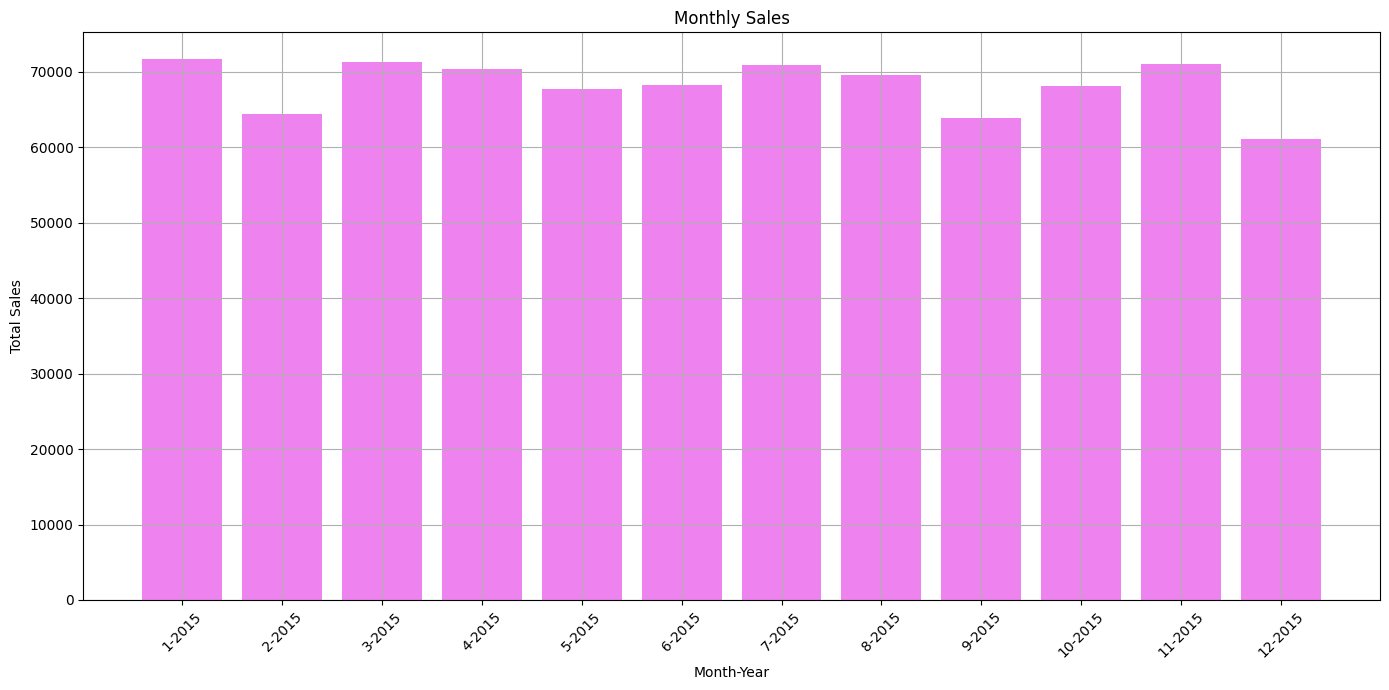

In [15]:
# Seasonality analysis
monthly_sales = pizza_sales.groupby(['year', 'month'])['total_price'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.bar(monthly_sales['month'].astype(str) + '-' + monthly_sales['year'].astype(str), monthly_sales['total_price'], color='violet')
plt.title('Monthly Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

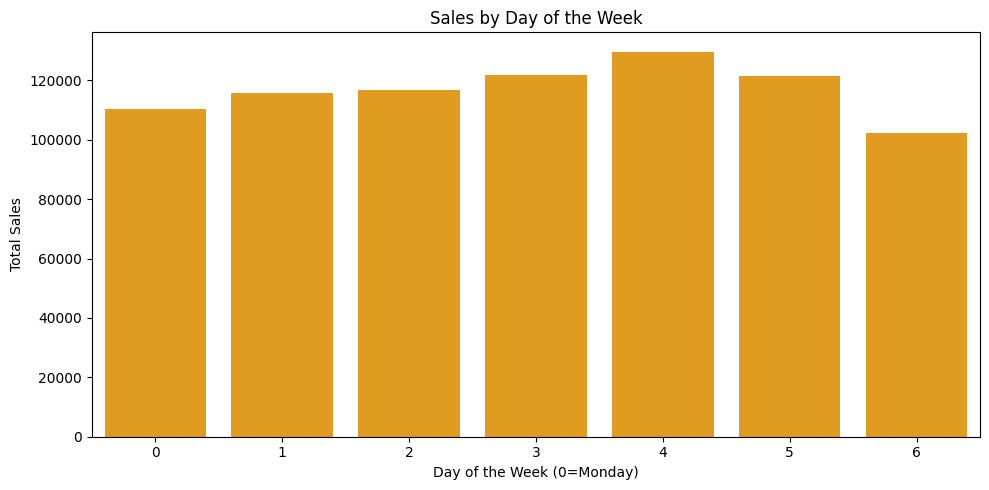

In [16]:
# Analyze sales by day of the week
import seaborn as sns
weekly_sales = pizza_sales.groupby('day_of_week')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='total_price', data=weekly_sales, color='orange')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


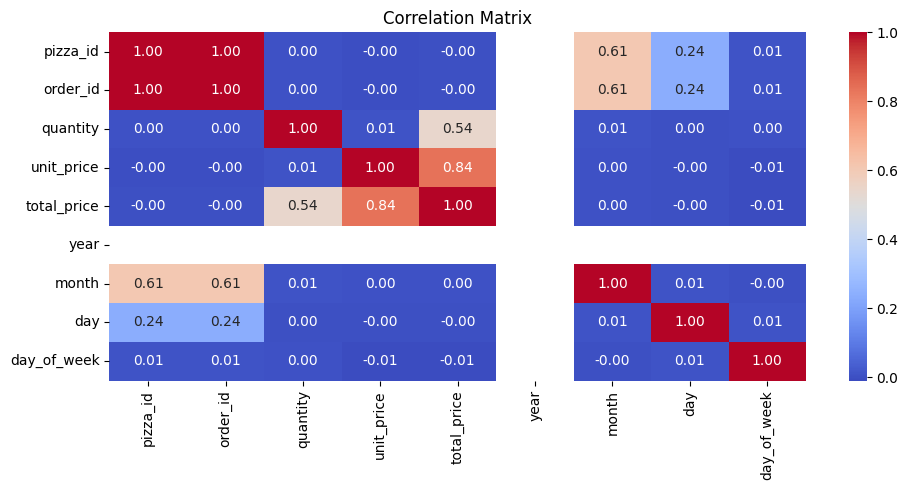

In [17]:
import seaborn as sns
# Select only numeric columns for correlation analysis
numeric_df = pizza_sales.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [16]:
pizza_sales.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'year', 'month',
       'day', 'day_of_week'],
      dtype='object')

In [17]:
pizza_sales.drop(columns=['order_time'],inplace=True)

In [20]:
pizza_sales.to_excel("H:\IIT-M GUVI\Projects capstone\Project5\Pizza_Sale_new.xlsx")

## Feature Engineering

In [18]:
# To find out how many unique pizza_name_id is there

# Find unique pizza_name_id
unique_pizza_ids = pizza_sales['pizza_name_id'].unique()

# Count of unique pizza_name_id
unique_count = len(unique_pizza_ids)

# Output the results
print(f"Unique count of pizza_name_id: {unique_count}")
print("List of unique pizza_name_id:", unique_pizza_ids)


Unique count of pizza_name_id: 91
List of unique pizza_name_id: ['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' 'soppressata_l'
 'four_cheese_l' 'napolitana_s' 'calabrese_m' 'four_cheese_m'
 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s' 'spinach_fet_l'
 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m' 'southw_ckn_s' 'bbq_ckn_m'
 'pepperoni_m' 'prsc_argla_s' 'sicilian_m' 'veggie_veg_l' 'ckn_alfredo_s'
 'pepperoni_s' 'green_garden_l' 'green_garden_m' 'pep_msh_pep_l'
 'hawaiian_s' 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l'
 'spin_pesto_s' 'thai_ckn_m' 'classic_dlx_l' 'ckn_pesto_m' 'the_greek_xl'
 'hawaiian_l' 'pep_msh_pep_s' 'spinach

In [19]:
# Create a dictionary to hold DataFrames for each pizza_name_id
pizza_dfs = {pizza_id: pizza_sales[pizza_sales['pizza_name_id'] == pizza_id] for pizza_id in pizza_sales['pizza_name_id'].unique()}

In [20]:
# To check the number of DataFrames created
print(f"Number of DataFrames created: {len(pizza_dfs)}")

Number of DataFrames created: 91


In [21]:
# Get the names (keys) of each DataFrame
pizza_names = list(pizza_dfs.keys())

# Print the names of the DataFrames
for name in pizza_names:
    print(name)

# If you want to see the count of unique names
print(f"Total unique pizza_name_id DataFrames: {len(pizza_names)}")


hawaiian_m
classic_dlx_m
five_cheese_l
ital_supr_l
mexicana_m
thai_ckn_l
ital_supr_m
prsc_argla_l
bbq_ckn_s
the_greek_s
spinach_supr_s
classic_dlx_s
green_garden_s
ital_cpcllo_l
ital_supr_s
mexicana_s
spicy_ital_l
spin_pesto_l
veggie_veg_s
mexicana_l
southw_ckn_l
bbq_ckn_l
cali_ckn_l
cali_ckn_m
pepperoni_l
cali_ckn_s
ckn_pesto_l
big_meat_s
soppressata_l
four_cheese_l
napolitana_s
calabrese_m
four_cheese_m
ital_veggie_s
mediterraneo_m
peppr_salami_s
spinach_fet_l
napolitana_l
sicilian_l
ital_cpcllo_m
southw_ckn_s
bbq_ckn_m
pepperoni_m
prsc_argla_s
sicilian_m
veggie_veg_l
ckn_alfredo_s
pepperoni_s
green_garden_l
green_garden_m
pep_msh_pep_l
hawaiian_s
peppr_salami_m
ckn_alfredo_m
peppr_salami_l
spin_pesto_s
thai_ckn_m
classic_dlx_l
ckn_pesto_m
the_greek_xl
hawaiian_l
pep_msh_pep_s
spinach_supr_m
prsc_argla_m
mediterraneo_l
southw_ckn_m
pep_msh_pep_m
sicilian_s
spicy_ital_s
thai_ckn_s
spinach_supr_l
ital_veggie_l
veggie_veg_m
the_greek_m
ckn_pesto_s
spinach_fet_s
spicy_ital_m
ital_veggie_

In [22]:
# Convert the DataFrames from the dictionary to a list
pizza_dfs_list = list(pizza_dfs.values())

# Now you have a list of DataFrames
print(f"Number of DataFrames in the list: {len(pizza_dfs_list)}")


Number of DataFrames in the list: 91


In [23]:
# Convert 'order_date' to datetime if not already
pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'])

In [24]:
pizza_sales['order_date'].dtype

dtype('<M8[ns]')

In [25]:
# Create a dictionary to hold DataFrames for each pizza_name_id, ensuring to copy the DataFrames
pizza_dfs = {pizza_id: pizza_sales[pizza_sales['pizza_name_id'] == pizza_id].copy() for pizza_id in pizza_sales['pizza_name_id'].unique()}

# Function to add a 'weeks' column using .loc
def add_weeks_column(df):
    df.loc[:, 'weeks'] = df['order_date'].dt.to_period('W').dt.start_time
    return df

# Update each DataFrame in the dictionary to include the 'weeks' column
pizza_dfs = {pizza_id: add_weeks_column(df) for pizza_id, df in pizza_dfs.items()}


In [26]:
# Print the columns for each DataFrame in pizza_dfs
for pizza_id, df in pizza_dfs.items():
    print(f"Columns for '{pizza_id}': {df.columns.tolist()}")


Columns for 'hawaiian_m': ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name', 'year', 'month', 'day', 'day_of_week', 'weeks']
Columns for 'classic_dlx_m': ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name', 'year', 'month', 'day', 'day_of_week', 'weeks']
Columns for 'five_cheese_l': ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name', 'year', 'month', 'day', 'day_of_week', 'weeks']
Columns for 'ital_supr_l': ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name', 'year', 'month', 'day', 'day_of_week', 'weeks']
Columns for 'mexicana_m': ['pizza_id', 'o

In [27]:
# For example, to access the DataFrame for 'hawaiian_m':
hawaiian_df = pizza_dfs['hawaiian_m']
hawaiian_df

pizza_id  order_id pizza_name_id  quantity order_date  unit_price  \
0             1         1    hawaiian_m         1 2015-01-01       13.25   
178         179        77    hawaiian_m         1 2015-02-01       13.25   
356         357       146    hawaiian_m         1 2015-03-01       13.25   
388         389       163    hawaiian_m         1 2015-03-01       13.25   
567         568       247    hawaiian_m         1 2015-04-01       13.25   
...         ...       ...           ...       ...        ...         ...   
48056     48057     21123    hawaiian_m         1 2015-12-26       13.25   
48112     48113     21146    hawaiian_m         1 2015-12-27       13.25   
48211     48212     21189    hawaiian_m         1 2015-12-28       13.25   
48238     48239     21194    hawaiian_m         1 2015-12-28       13.25   
48285     48286     21213    hawaiian_m         1 2015-12-28       13.25   

       total_price pizza_size pizza_category  \
0            13.25          M        Classic   
178          13.25          M        Classic   
356          13.25          M        Classic   
388          13.25          M        Classic   
567          13.25          M        Classic   
...            ...        ...            ...   
48056        13.25          M        Classic   
48112        13.25          M        Classic   
48211        13.25          M        Classic   
48238        13.25          M        Classic   
48285        13.25          M        Classic   

                              pizza_ingredients          pizza_name  year  \
0      Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
178    Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
356    Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
388    Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
567    Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
...                                         ...                 ...   ...   
48056  Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
48112  Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
48211  Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
48238  Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   
48285  Sliced Ham, Pineapple, Mozzarella Cheese  The Hawaiian Pizza  2015   

       month  day  day_of_week      weeks  
0          1    1            3 2014-12-29  
178        2    1            6 2015-01-26  
356        3    1            6 2015-02-23  
388        3    1            6 2015-02-23  
567        4    1            2 2015-03-30  
...      ...  ...          ...        ...  
48056     12   26            5 2015-12-21  
48112     12   27            6 2015-12-21  
48211     12   28            0 2015-12-28  
48238     12   28            0 2015-12-28  
48285     12   28            0 2015-12-28  

[473 rows x 16 columns]

In [28]:
# Function to group by 'weeks' and aggregate necessary columns
def group_by_weeks(df):
    return df.groupby('weeks').agg({
        'pizza_id': 'first',       # Keep the first pizza_id for each week
        'order_id': 'count',       # Count the number of orders
        'pizza_name_id': 'first',  # Keep the first pizza_name_id for each week
        'quantity': 'sum',         # Sum of quantities for the week
        'unit_price': 'mean',      # Average unit price for the week (you can change this)
        'total_price': 'sum',      # Sum of total prices for the week
        'pizza_size': 'first',     # Keep the first pizza_size for each week
        'pizza_category': 'first',  # Keep the first pizza_category for each week
        'pizza_ingredients': 'first', # Keep the first pizza_ingredients for each week
        'pizza_name': 'first',      # Keep the first pizza_name for each week
        'year': 'first',            # Keep the first year for the week
        'month': 'first',           # Keep the first month for the week
        'day': 'first',             # Keep the first day for the week
        'day_of_week': 'first'      # Keep the first day of the week
    }).reset_index()

# Create a new dictionary to hold the grouped DataFrames
grouped_pizza_dfs = {pizza_id: group_by_weeks(df) for pizza_id, df in pizza_dfs.items()}

# Print the number of rows in each grouped DataFrame
for pizza_id, grouped_df in grouped_pizza_dfs.items():
    print(f"Grouped DataFrame for '{pizza_id}' has {grouped_df.shape[0]} rows.")


Grouped DataFrame for 'hawaiian_m' has 53 rows.
Grouped DataFrame for 'classic_dlx_m' has 53 rows.
Grouped DataFrame for 'five_cheese_l' has 53 rows.
Grouped DataFrame for 'ital_supr_l' has 53 rows.
Grouped DataFrame for 'mexicana_m' has 53 rows.
Grouped DataFrame for 'thai_ckn_l' has 53 rows.
Grouped DataFrame for 'ital_supr_m' has 53 rows.
Grouped DataFrame for 'prsc_argla_l' has 52 rows.
Grouped DataFrame for 'bbq_ckn_s' has 53 rows.
Grouped DataFrame for 'the_greek_s' has 53 rows.
Grouped DataFrame for 'spinach_supr_s' has 52 rows.
Grouped DataFrame for 'classic_dlx_s' has 53 rows.
Grouped DataFrame for 'green_garden_s' has 53 rows.
Grouped DataFrame for 'ital_cpcllo_l' has 53 rows.
Grouped DataFrame for 'ital_supr_s' has 53 rows.
Grouped DataFrame for 'mexicana_s' has 49 rows.
Grouped DataFrame for 'spicy_ital_l' has 53 rows.
Grouped DataFrame for 'spin_pesto_l' has 53 rows.
Grouped DataFrame for 'veggie_veg_s' has 53 rows.
Grouped DataFrame for 'mexicana_l' has 53 rows.
Grouped D

In [29]:
# For example, to access the DataFrame for 'hawaiian_m':
mexicana_l_df = grouped_pizza_dfs['mexicana_l']
mexicana_l_df

weeks  pizza_id  order_id pizza_name_id  quantity  unit_price  \
0  2014-12-29        24        12    mexicana_l        12       20.25   
1  2015-01-05     16305        17    mexicana_l        19       20.25   
2  2015-01-12      1681        12    mexicana_l        13       20.25   
3  2015-01-19      2489        10    mexicana_l        10       20.25   
4  2015-01-26       168        18    mexicana_l        20       20.25   
5  2015-02-02      4377        15    mexicana_l        16       20.25   
6  2015-02-09      5854        18    mexicana_l        18       20.25   
7  2015-02-16      6304        14    mexicana_l        15       20.25   
8  2015-02-23       427        16    mexicana_l        16       20.25   
9  2015-03-02      4575        23    mexicana_l        24       20.25   
10 2015-03-09      9678        16    mexicana_l        17       20.25   
11 2015-03-16     10186        16    mexicana_l        17       20.25   
12 2015-03-23     10999        21    mexicana_l        22       20.25   
13 2015-03-30      4655        14    mexicana_l        14       20.25   
14 2015-04-06     21002        19    mexicana_l        21       20.25   
15 2015-04-13     13913        20    mexicana_l        20       20.25   
16 2015-04-20     14885        14    mexicana_l        14       20.25   
17 2015-04-27       598        16    mexicana_l        16       20.25   
18 2015-05-04     12886        11    mexicana_l        11       20.25   
19 2015-05-11     18144        16    mexicana_l        16       20.25   
20 2015-05-18     18719        17    mexicana_l        17       20.25   
21 2015-05-25     19655        13    mexicana_l        13       20.25   
22 2015-06-01       729        16    mexicana_l        18       20.25   
23 2015-06-08     22221        24    mexicana_l        24       20.25   
24 2015-06-15     22510        16    mexicana_l        16       20.25   
25 2015-06-22     23368        14    mexicana_l        15       20.25   
26 2015-06-29      8856        15    mexicana_l        15       20.25   
27 2015-07-06     21469        13    mexicana_l        13       20.25   
28 2015-07-13     26566        12    mexicana_l        12       20.25   
29 2015-07-20     27307        20    mexicana_l        20       20.25   
30 2015-07-27      1025        16    mexicana_l        17       20.25   
31 2015-08-03      9032        22    mexicana_l        22       20.25   
32 2015-08-10     30572        17    mexicana_l        17       20.25   
33 2015-08-17     31049        14    mexicana_l        14       20.25   
34 2015-08-24     32122        17    mexicana_l        18       20.25   
35 2015-08-31      1254        17    mexicana_l        18       20.25   
36 2015-09-07     25783        15    mexicana_l        16       20.25   
37 2015-09-14     34807        13    mexicana_l        13       20.25   
38 2015-09-21     35762        15    mexicana_l        15       20.25   
39 2015-09-28      1286        21    mexicana_l        21       20.25   
40 2015-10-05     17555        14    mexicana_l        14       20.25   
41 2015-10-12     38167        11    mexicana_l        12       20.25   
42 2015-10-19     39092        16    mexicana_l        16       20.25   
43 2015-10-26      1429        18    mexicana_l        18       20.25   
44 2015-11-02      5605        19    mexicana_l        19       20.25   
45 2015-11-09     34431        16    mexicana_l        16       20.25   
46 2015-11-16     42616        22    mexicana_l        22       20.25   
47 2015-11-23     43477        28    mexicana_l        29       20.25   
48 2015-11-30      1592        13    mexicana_l        13       20.25   
49 2015-12-07     26260        12    mexicana_l        12       20.25   
50 2015-12-14     46646        11    mexicana_l        11       20.25   
51 2015-12-21     47609        12    mexicana_l        13       20.25   
52 2015-12-28     48254         7    mexicana_l         7       20.25   

    total_price pizza_size pizza_category  \
0        243.00     

In [30]:
# For example, to access the DataFrame for 'hawaiian_m':
the_greek_xxl_df = grouped_pizza_dfs['the_greek_xxl']
the_greek_xxl_df

weeks  pizza_id  order_id  pizza_name_id  quantity  unit_price  \
0  2015-01-26      3448         2  the_greek_xxl         2       35.95   
1  2015-02-09      5902         1  the_greek_xxl         1       35.95   
2  2015-02-16      6366         1  the_greek_xxl         1       35.95   
3  2015-02-23      7491         1  the_greek_xxl         1       35.95   
4  2015-03-09      9845         1  the_greek_xxl         1       35.95   
5  2015-03-16     10283         2  the_greek_xxl         2       35.95   
6  2015-04-13     14030         1  the_greek_xxl         1       35.95   
7  2015-04-20     15331         1  the_greek_xxl         1       35.95   
8  2015-05-11     41183         1  the_greek_xxl         1       35.95   
9  2015-05-18     19442         1  the_greek_xxl         1       35.95   
10 2015-05-25     20498         1  the_greek_xxl         1       35.95   
11 2015-06-15     22904         2  the_greek_xxl         2       35.95   
12 2015-06-29     17115         1  the_greek_xxl         1       35.95   
13 2015-08-24     32200         1  the_greek_xxl         1       35.95   
14 2015-09-21     35954         2  the_greek_xxl         2       35.95   
15 2015-09-28     13512         2  the_greek_xxl         2       35.95   
16 2015-10-05     37944         1  the_greek_xxl         1       35.95   
17 2015-10-19     39733         1  the_greek_xxl         1       35.95   
18 2015-11-02     30208         1  the_greek_xxl         1       35.95   
19 2015-11-16     42718         2  the_greek_xxl         2       35.95   
20 2015-11-30     13780         1  the_greek_xxl         1       35.95   
21 2015-12-14     47490         1  the_greek_xxl         1       35.95   

    total_price pizza_size pizza_category  \
0         71.90        XXL        Classic   
1         35.95        XXL        Classic   
2         35.95        XXL        Classic   
3         35.95        XXL        Classic   
4         35.95        XXL        Classic   
5         71.90        XXL        Classic   
6         35.95        XXL        Classic   
7         35.95        XXL        Classic   
8         35.95        XXL        Classic   
9         35.95        XXL        Classic   
10        35.95        XXL        Classic   
11        71.90        XXL        Classic   
12        35.95        XXL        Classic   
13        35.95        XXL        Classic   
14        71.90        XXL        Classic   
15        71.90        XXL        Classic   
16        35.95        XXL        Classic   
17        35.95        XXL        Classic   
18        35.95        XXL        Classic   
19        71.90        XXL        Classic   
20        35.95        XXL        Classic   
21        35.95        XXL        Classic   

                                    pizza_ingredients       pizza_name  year  \
0   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
1   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
2   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
3   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
4   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
5   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
6   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
7   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
8   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
9   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
10  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
11  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
12  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
13  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
14  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizz

### Train Test dataset splitting

In [31]:
# Create dictionaries to hold the train and test sets, including features and target
train_data = {}
test_data = {}

# Function to split DataFrame into train and test sets with target variable
def split_train_test(df):
    # Define features (X) and target (y)
    X = df.drop(columns=['quantity'])  # Features: all columns except 'quantity'
    y = df['quantity']                  # Target: 'quantity'
    
    # Split into train and test
    train_X = X[X['month'] <= 9].copy()  # Training features
    train_y = y[X['month'] <= 9].copy()  # Training target
    test_X = X[X['month'] > 9].copy()    # Testing features
    test_y = y[X['month'] > 9].copy()    # Testing target
    
    return (train_X, train_y), (test_X, test_y)

# Iterate through each grouped DataFrame and split
for pizza_id, grouped_df in grouped_pizza_dfs.items():
    (train_X, train_y), (test_X, test_y) = split_train_test(grouped_df)
    train_data[pizza_id] = (train_X, train_y)
    test_data[pizza_id] = (test_X, test_y)

# Print the sizes of train and test sets for each pizza
for pizza_id in grouped_pizza_dfs.keys():
    print(f"Train set for '{pizza_id}' has {train_data[pizza_id][0].shape[0]} rows (features).")
    # print(f"Train target for '{pizza_id}' has {train_data[pizza_id][1].shape[0]} rows.")
    print(f"Test set for '{pizza_id}' has {test_data[pizza_id][0].shape[0]} rows (features).")
    # print(f"Test target for '{pizza_id}' has {test_data[pizza_id][1].shape[0]} rows.")


Train set for 'hawaiian_m' has 39 rows (features).
Test set for 'hawaiian_m' has 14 rows (features).
Train set for 'classic_dlx_m' has 39 rows (features).
Test set for 'classic_dlx_m' has 14 rows (features).
Train set for 'five_cheese_l' has 39 rows (features).
Test set for 'five_cheese_l' has 14 rows (features).
Train set for 'ital_supr_l' has 39 rows (features).
Test set for 'ital_supr_l' has 14 rows (features).
Train set for 'mexicana_m' has 39 rows (features).
Test set for 'mexicana_m' has 14 rows (features).
Train set for 'thai_ckn_l' has 39 rows (features).
Test set for 'thai_ckn_l' has 14 rows (features).
Train set for 'ital_supr_m' has 39 rows (features).
Test set for 'ital_supr_m' has 14 rows (features).
Train set for 'prsc_argla_l' has 39 rows (features).
Test set for 'prsc_argla_l' has 13 rows (features).
Train set for 'bbq_ckn_s' has 39 rows (features).
Test set for 'bbq_ckn_s' has 14 rows (features).
Train set for 'the_greek_s' has 39 rows (features).
Test set for 'the_gre

In [32]:
# Check if any data exists in train or test sets
if train_X.empty or test_X.empty:
    raise ValueError("Training or testing set is empty. Please check the month filtering criteria.")
else:
    print("no empty cells")

no empty cells


In [33]:
# Check the keys in train_data and test_data
print("Train Data Keys:", train_data.keys())
print("Test Data Keys:", test_data.keys())

# Print a sample of data for one pizza type
sample_pizza_id = list(train_data.keys())[0]  # Get the first pizza id
train_X, train_y = train_data[sample_pizza_id]
print(train_X.head())
print(train_y.head())


Train Data Keys: dict_keys(['hawaiian_m', 'classic_dlx_m', 'five_cheese_l', 'ital_supr_l', 'mexicana_m', 'thai_ckn_l', 'ital_supr_m', 'prsc_argla_l', 'bbq_ckn_s', 'the_greek_s', 'spinach_supr_s', 'classic_dlx_s', 'green_garden_s', 'ital_cpcllo_l', 'ital_supr_s', 'mexicana_s', 'spicy_ital_l', 'spin_pesto_l', 'veggie_veg_s', 'mexicana_l', 'southw_ckn_l', 'bbq_ckn_l', 'cali_ckn_l', 'cali_ckn_m', 'pepperoni_l', 'cali_ckn_s', 'ckn_pesto_l', 'big_meat_s', 'soppressata_l', 'four_cheese_l', 'napolitana_s', 'calabrese_m', 'four_cheese_m', 'ital_veggie_s', 'mediterraneo_m', 'peppr_salami_s', 'spinach_fet_l', 'napolitana_l', 'sicilian_l', 'ital_cpcllo_m', 'southw_ckn_s', 'bbq_ckn_m', 'pepperoni_m', 'prsc_argla_s', 'sicilian_m', 'veggie_veg_l', 'ckn_alfredo_s', 'pepperoni_s', 'green_garden_l', 'green_garden_m', 'pep_msh_pep_l', 'hawaiian_s', 'peppr_salami_m', 'ckn_alfredo_m', 'peppr_salami_l', 'spin_pesto_s', 'thai_ckn_m', 'classic_dlx_l', 'ckn_pesto_m', 'the_greek_xl', 'hawaiian_l', 'pep_msh_pep_

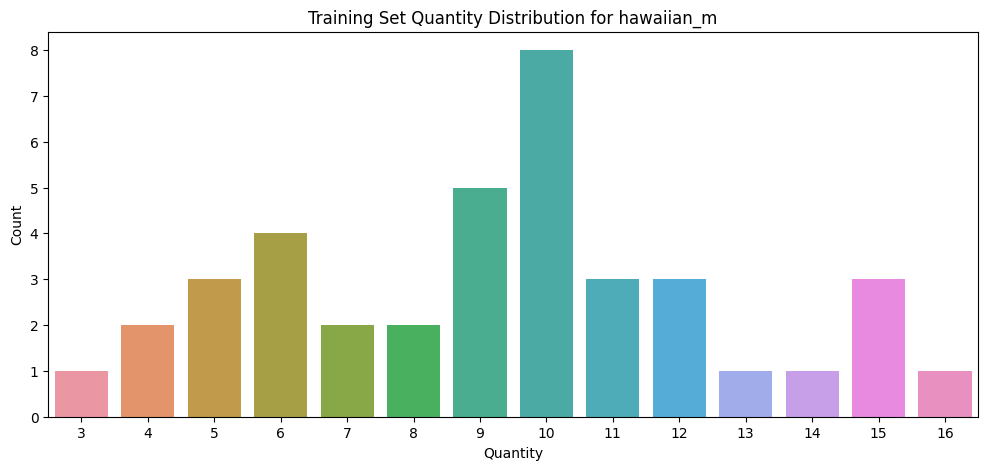

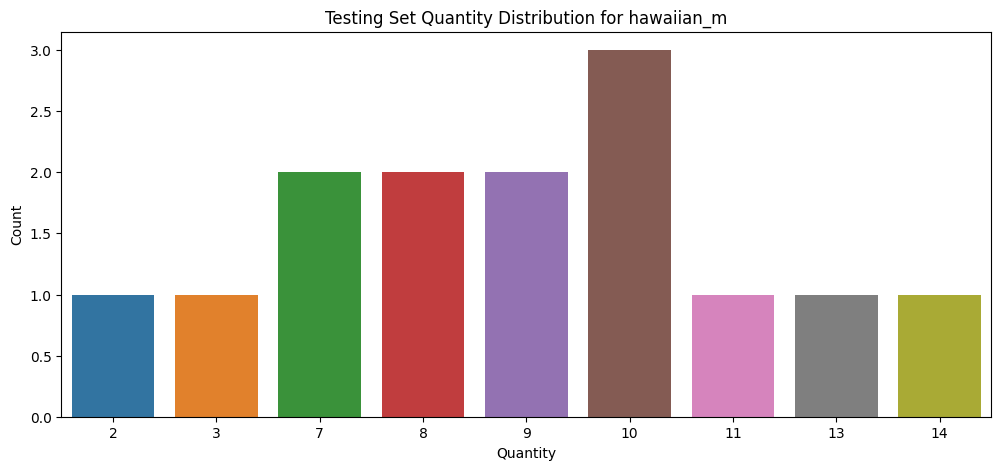

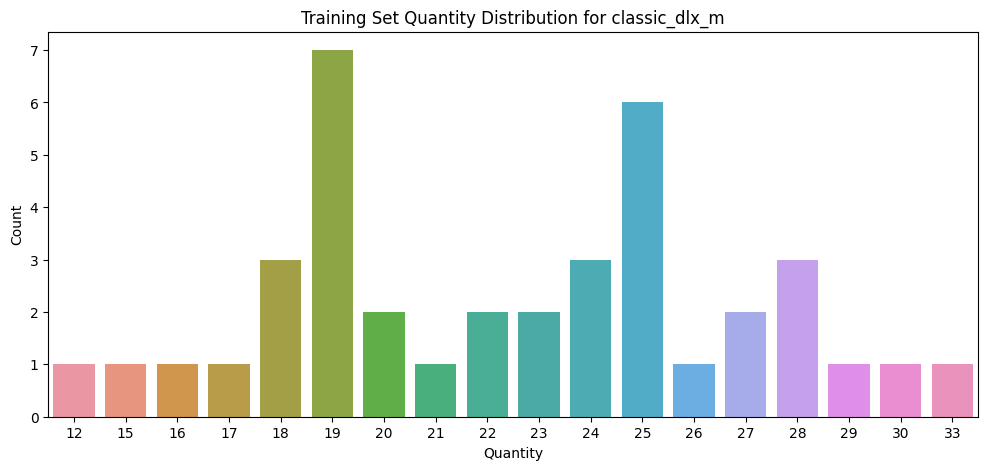

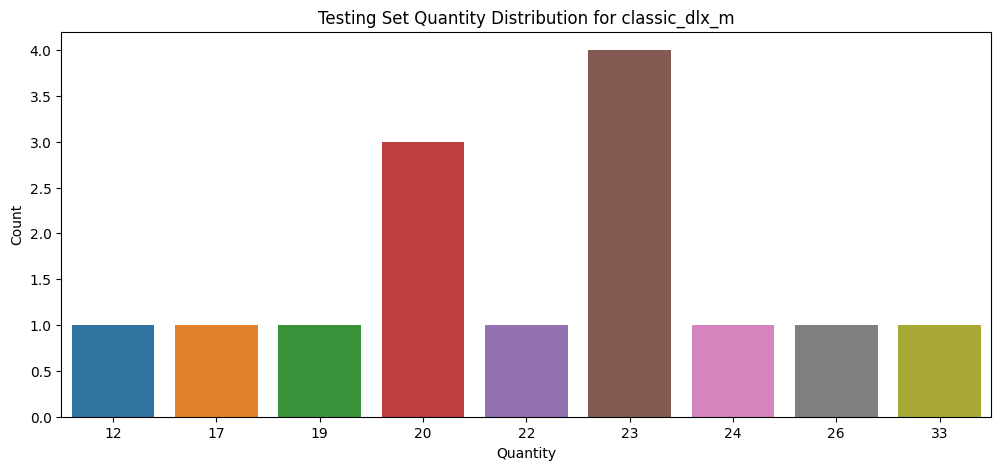

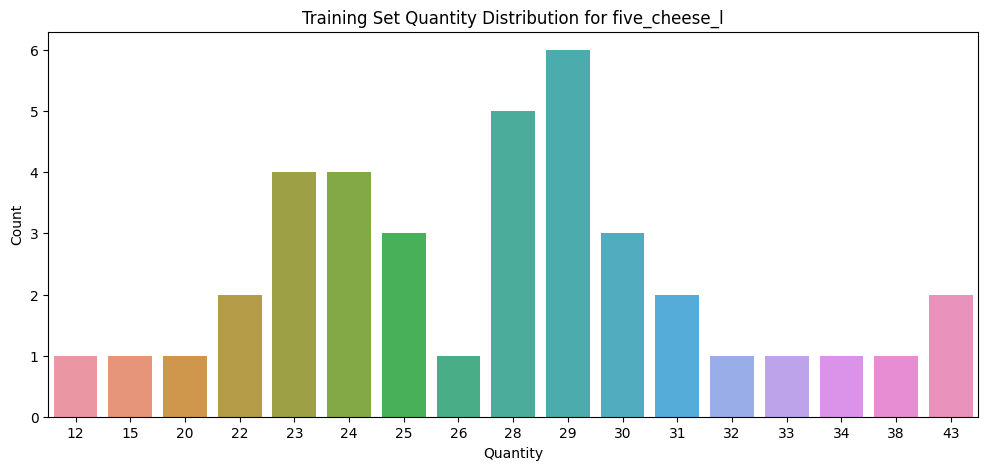

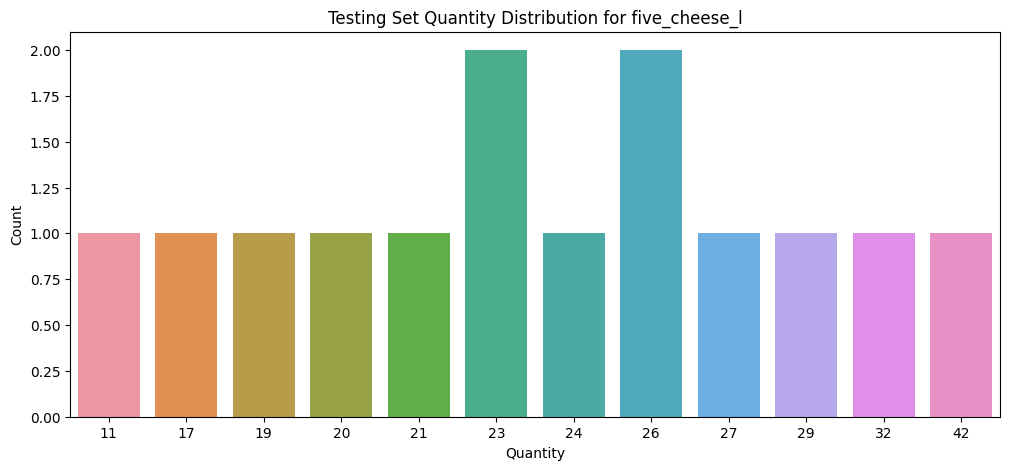

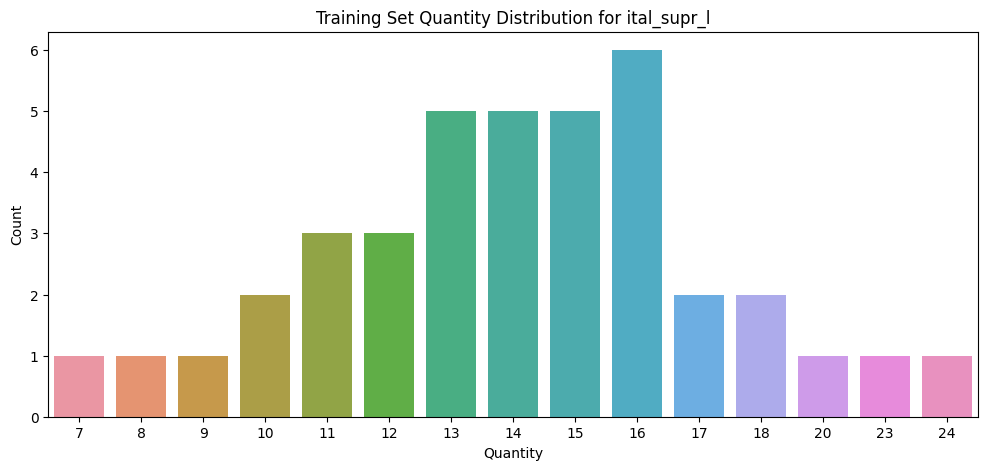

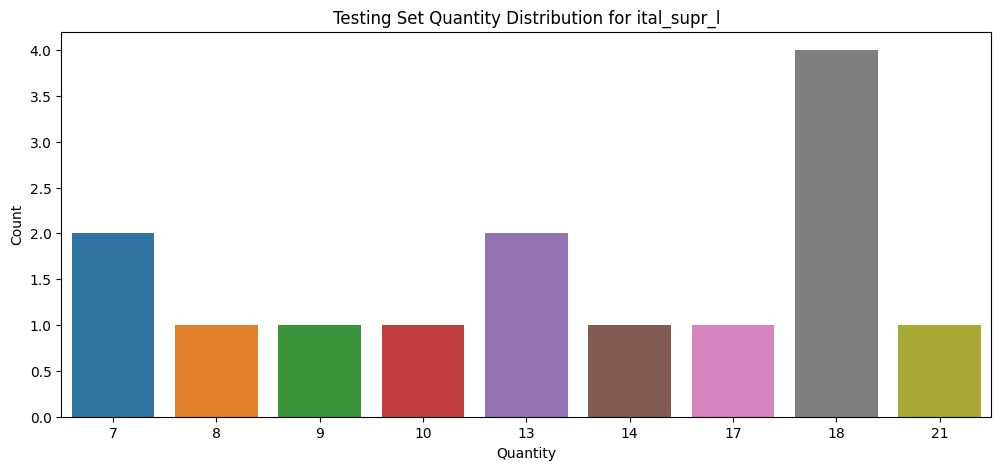

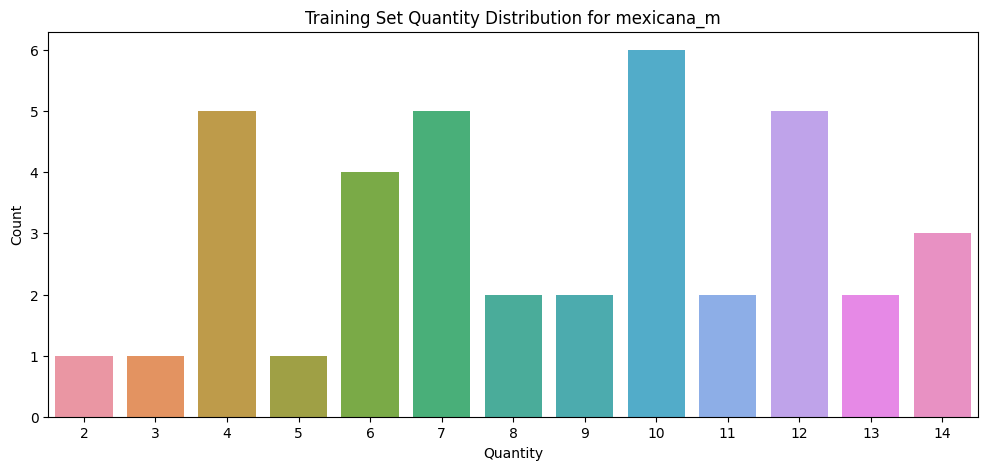

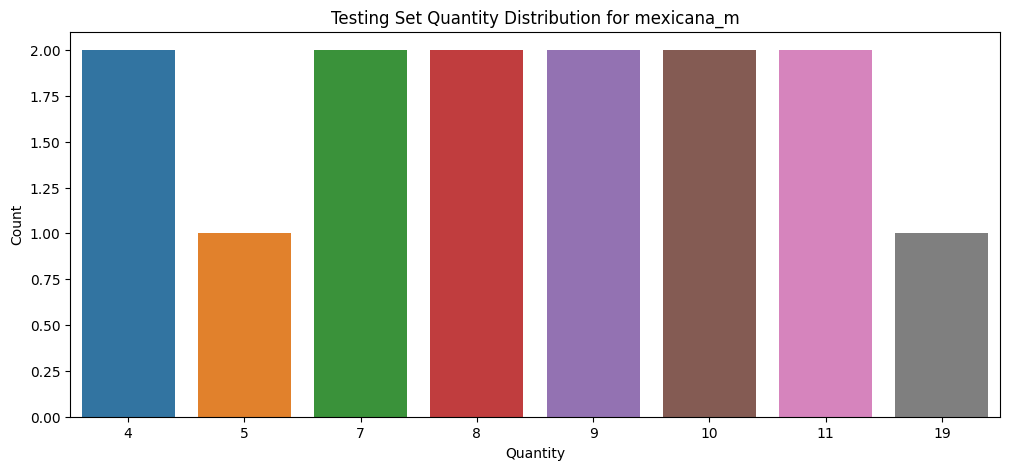

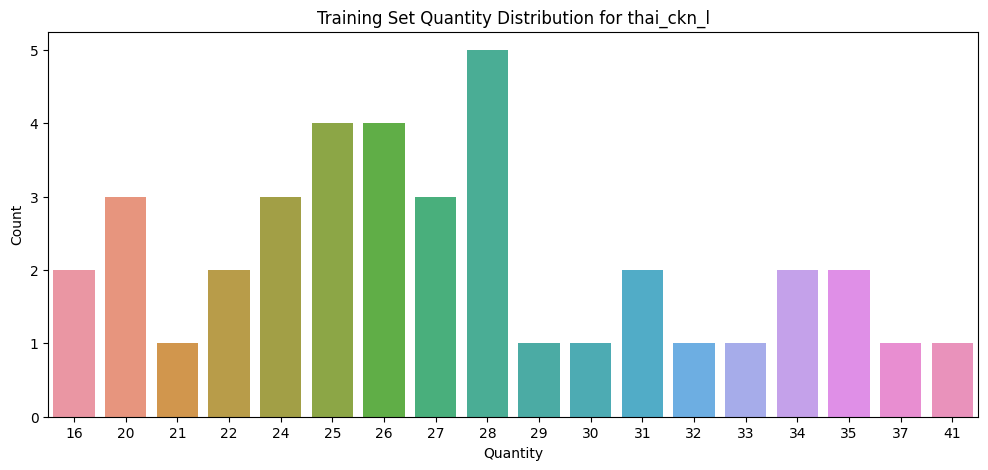

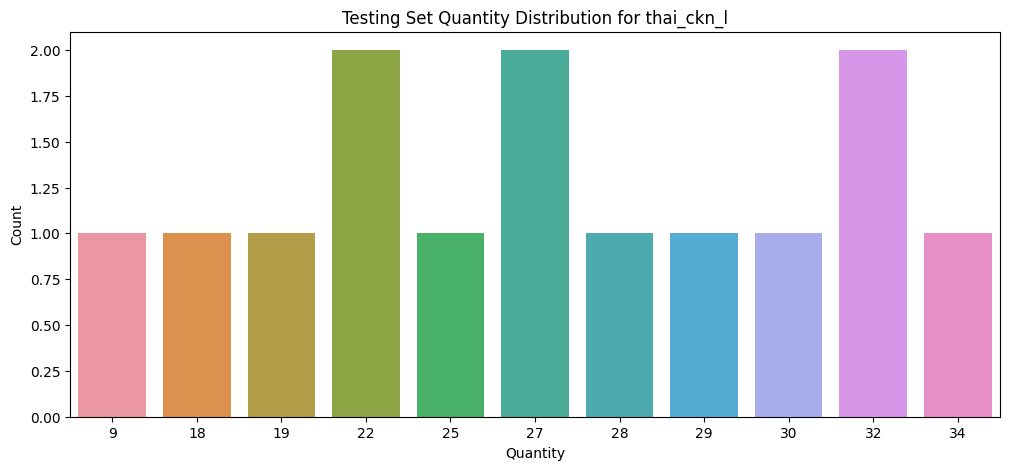

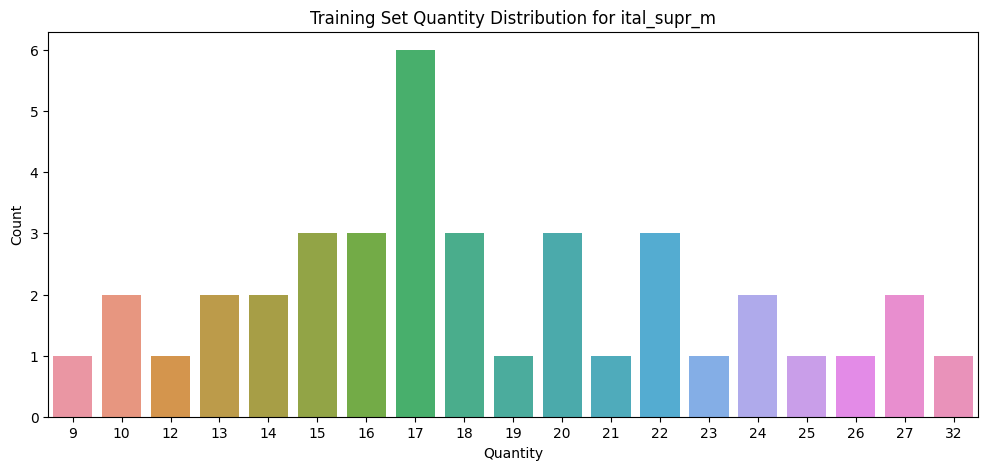

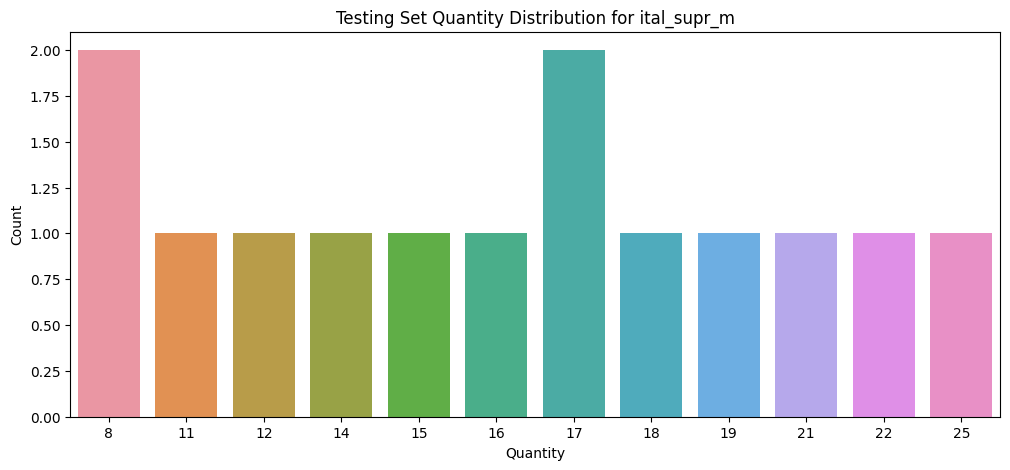

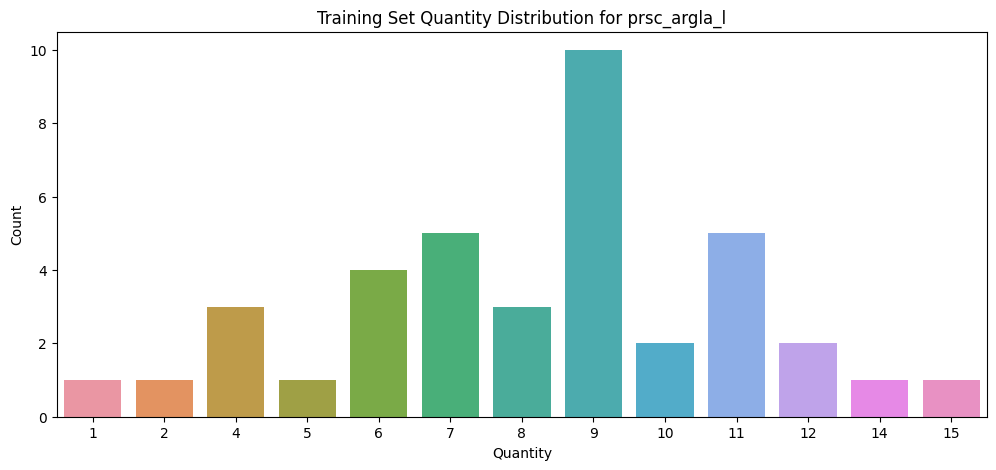

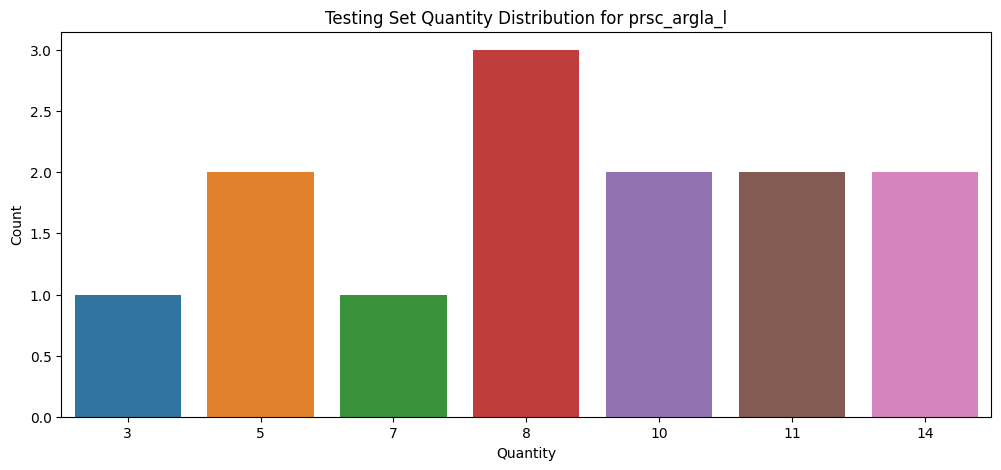

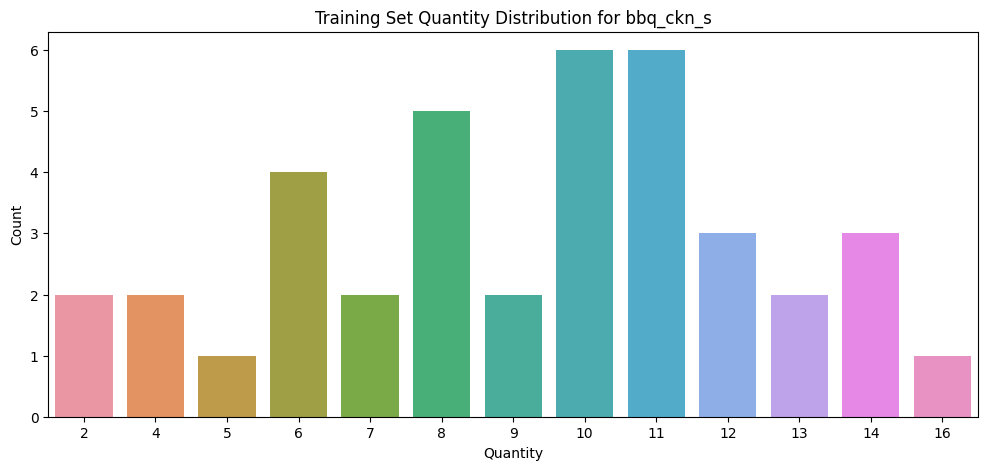

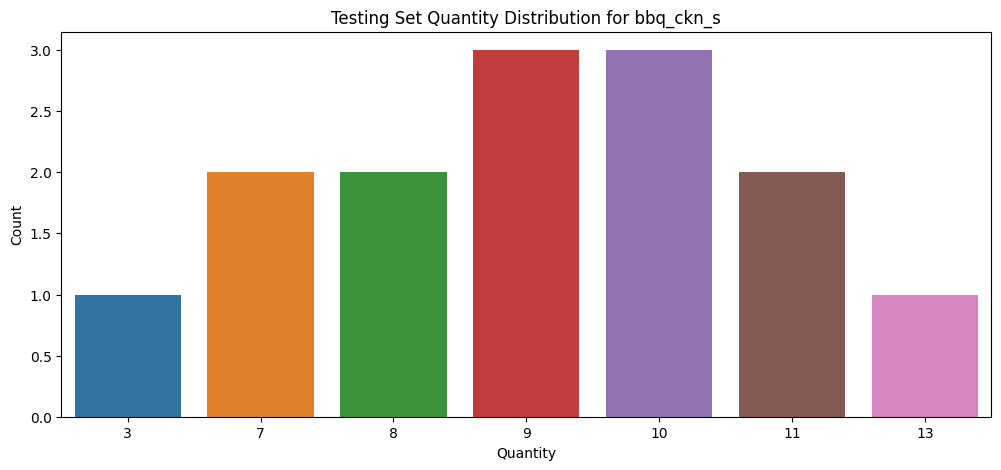

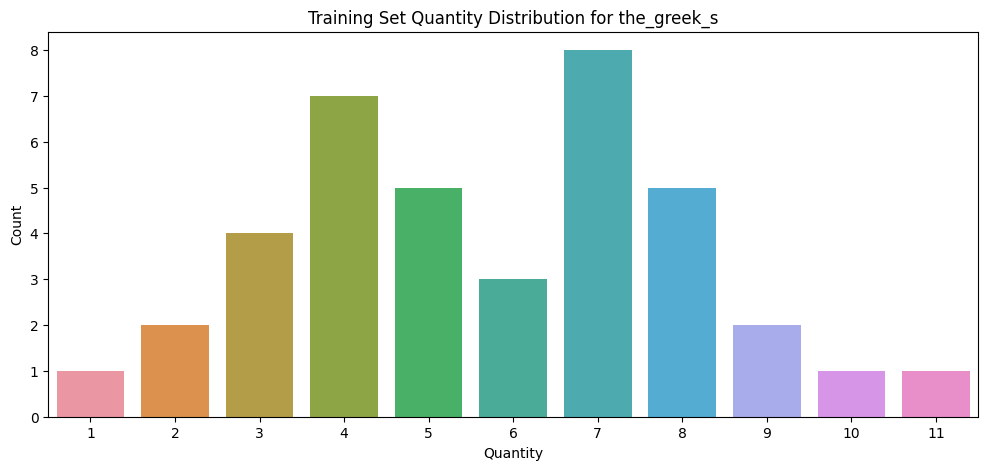

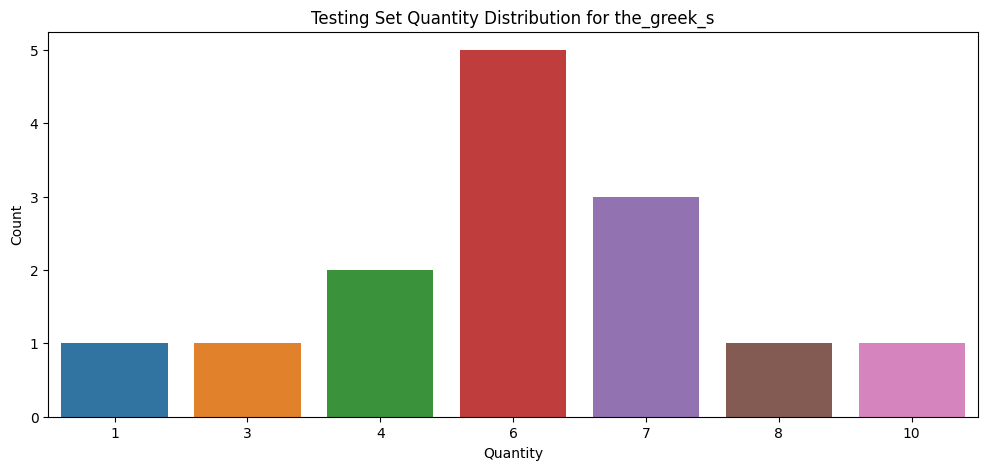

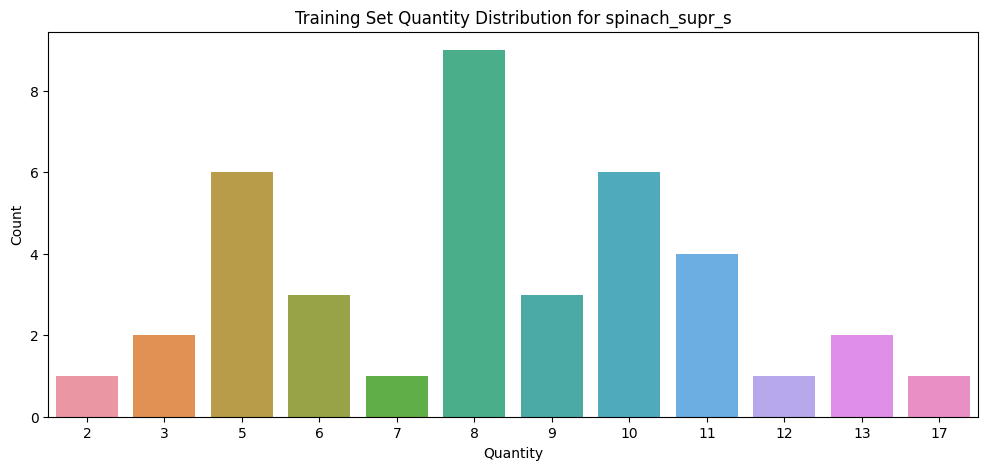

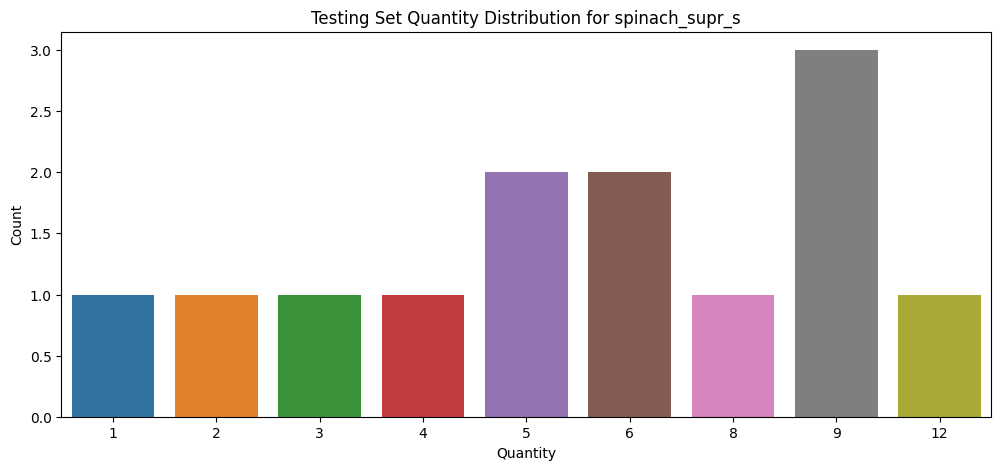

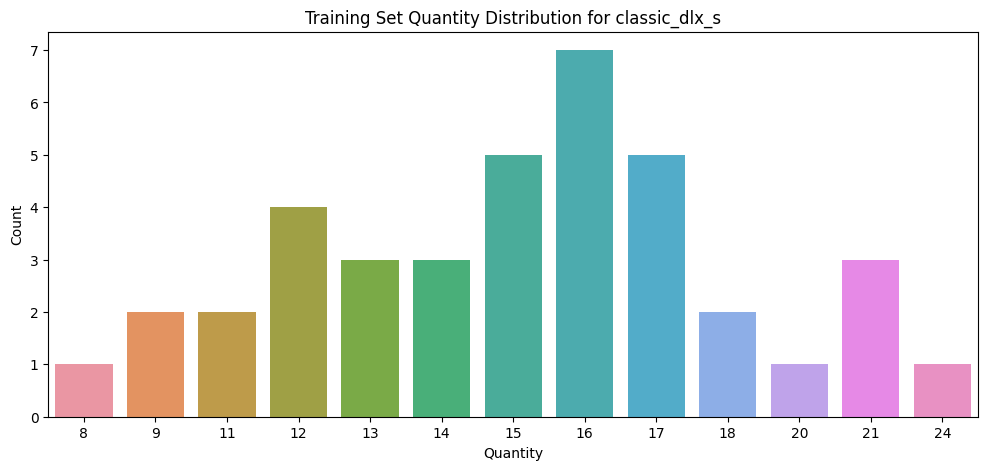

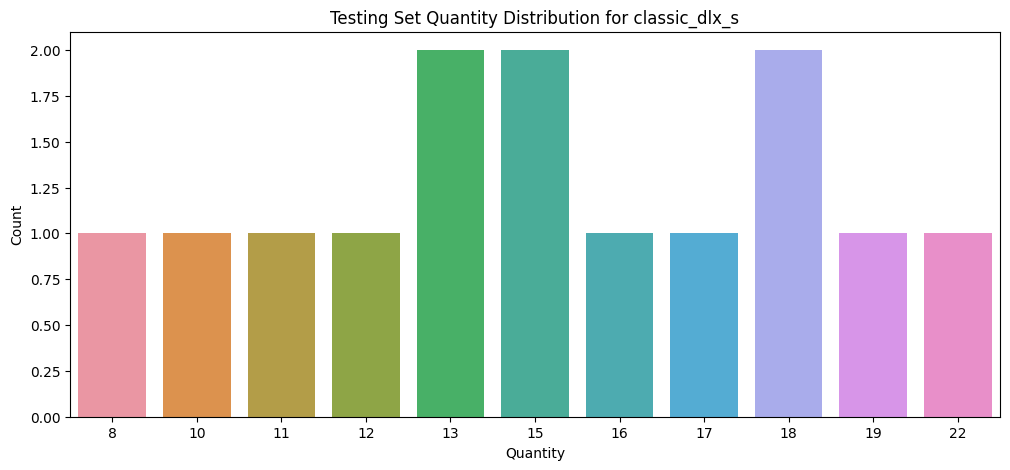

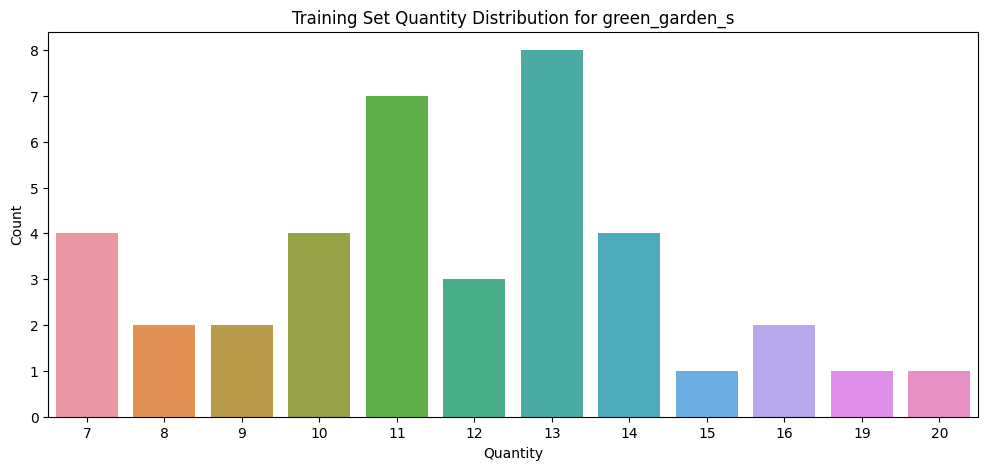

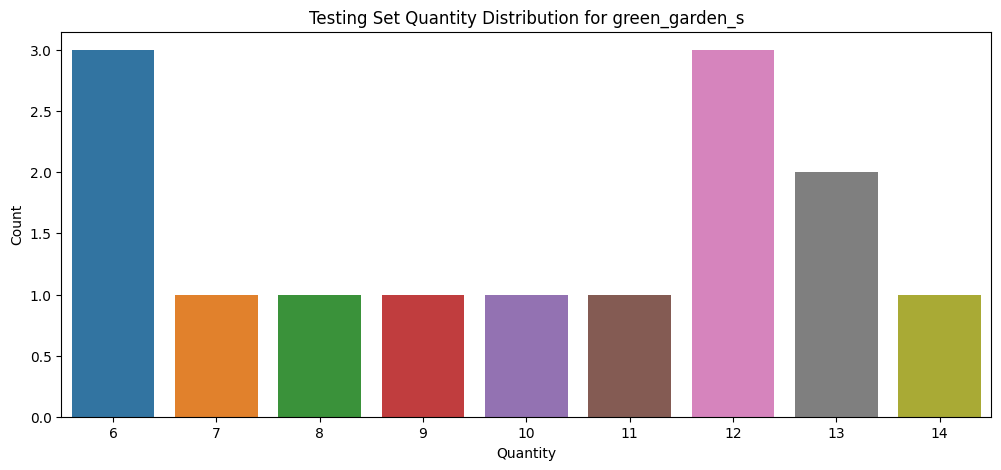

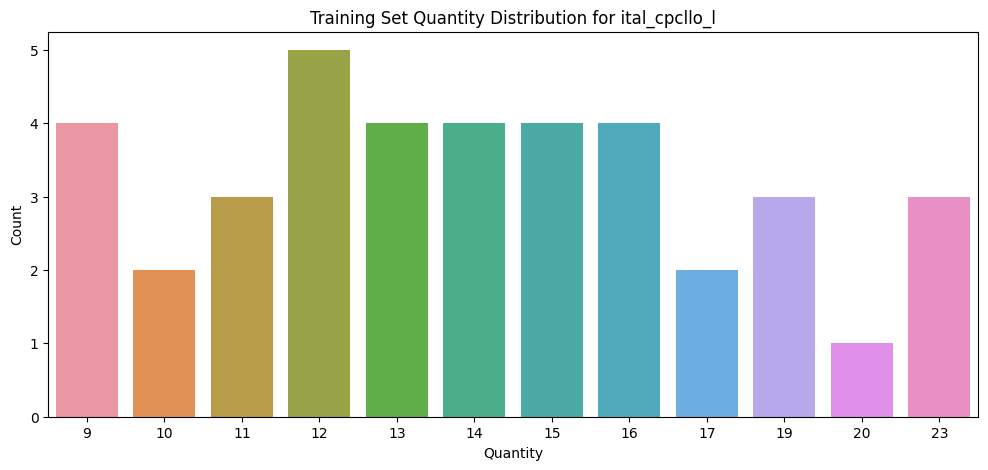

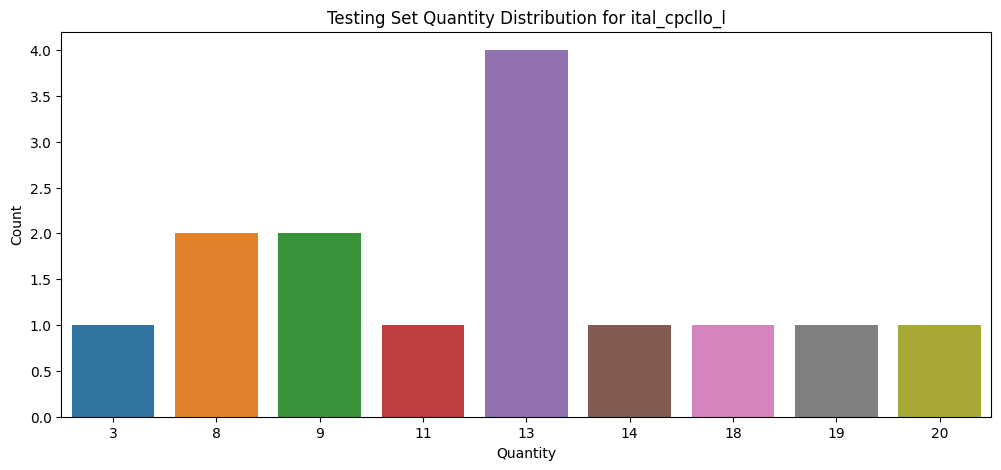

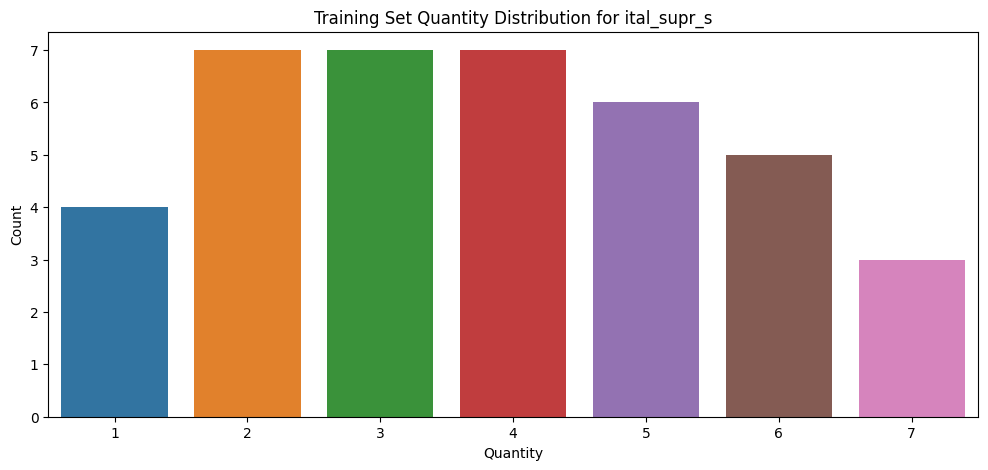

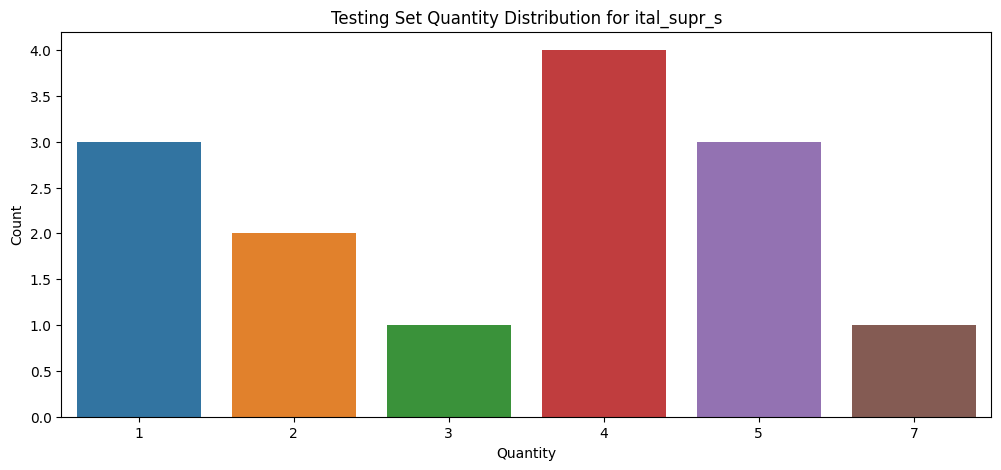

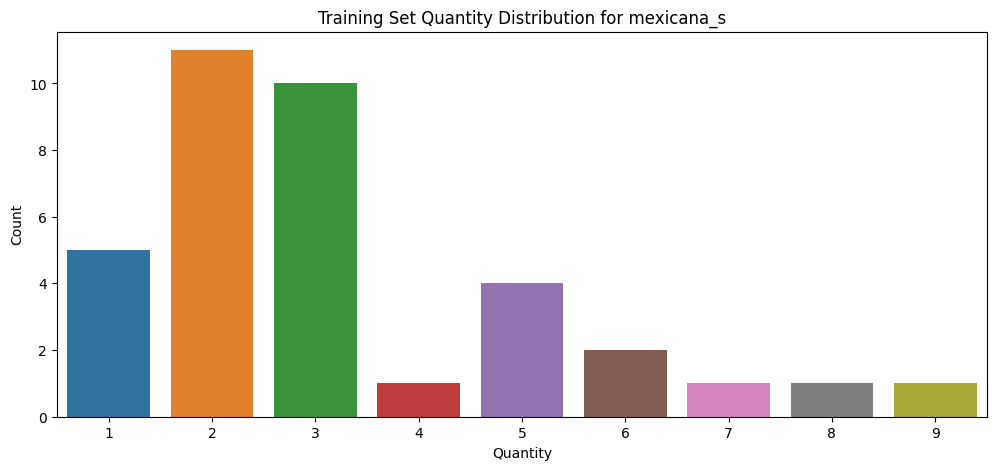

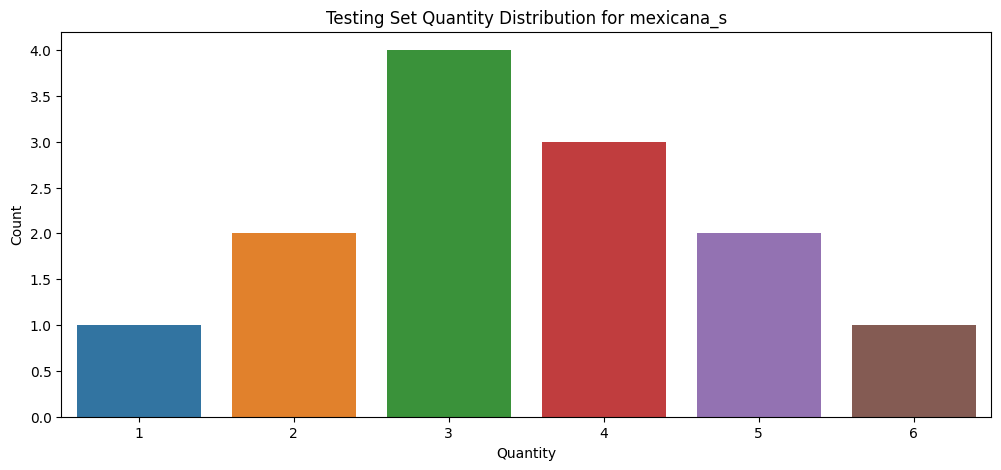

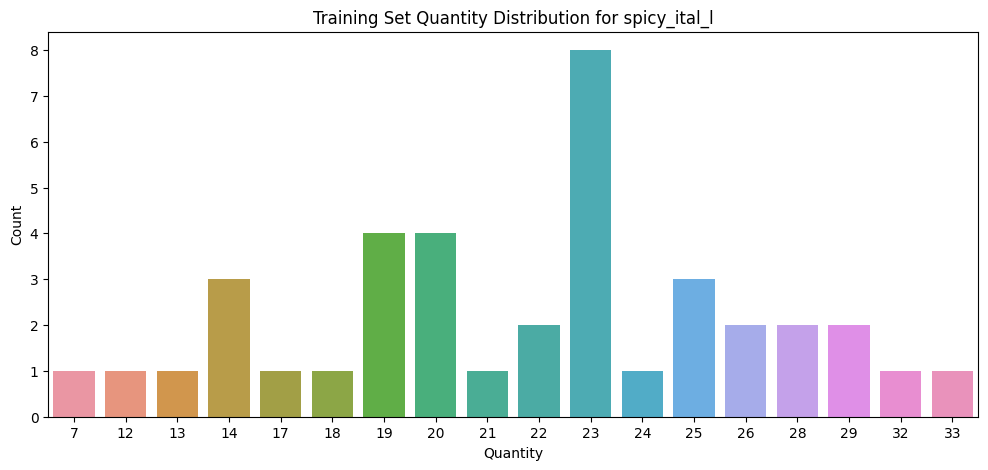

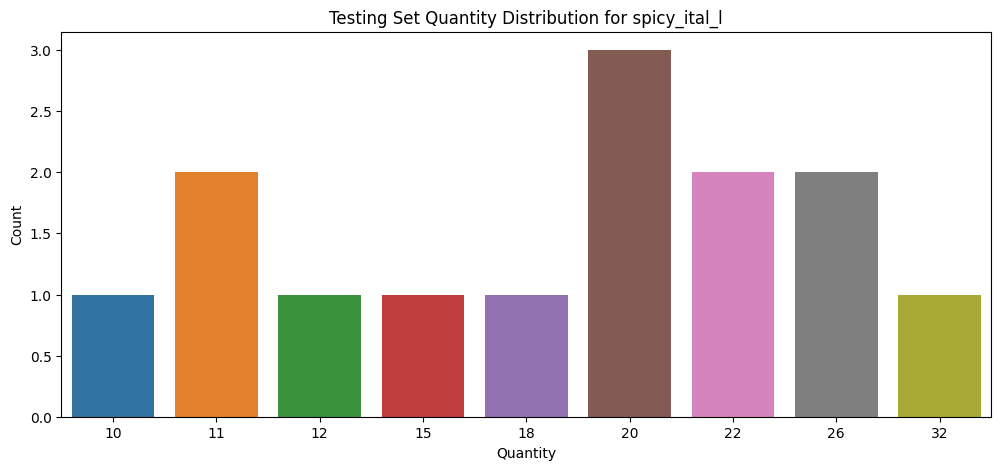

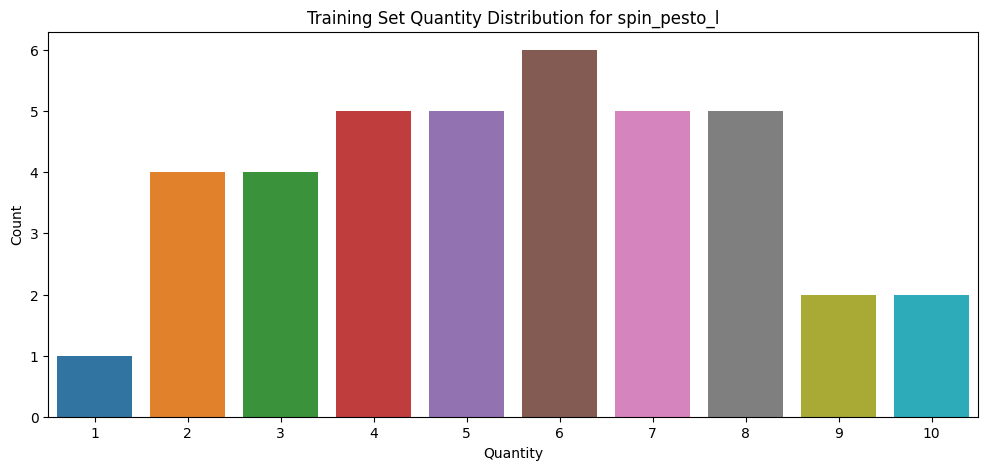

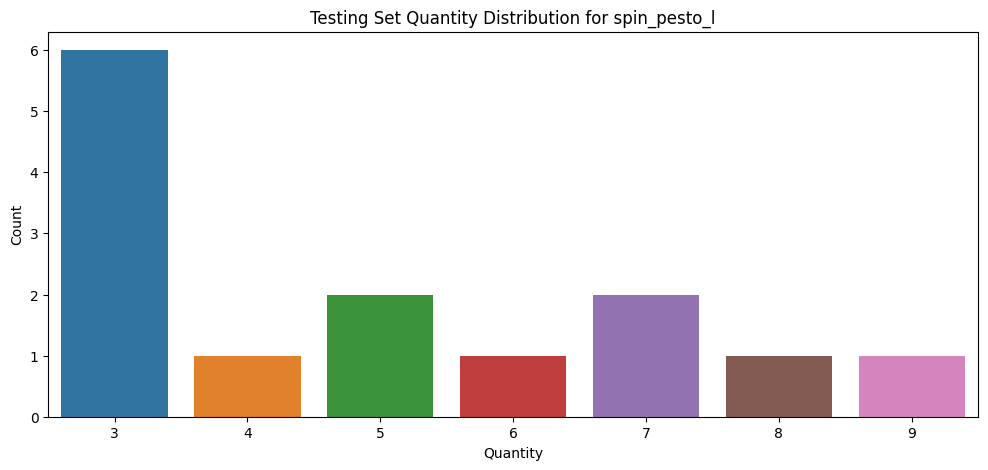

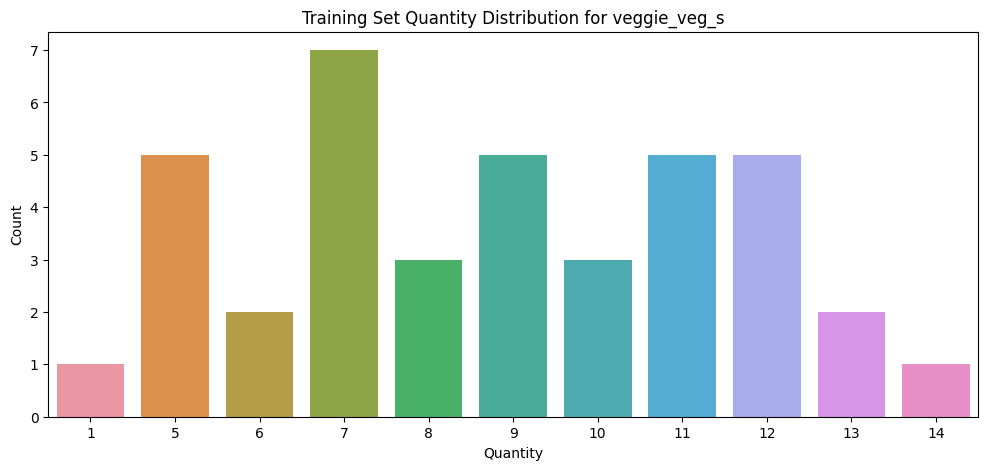

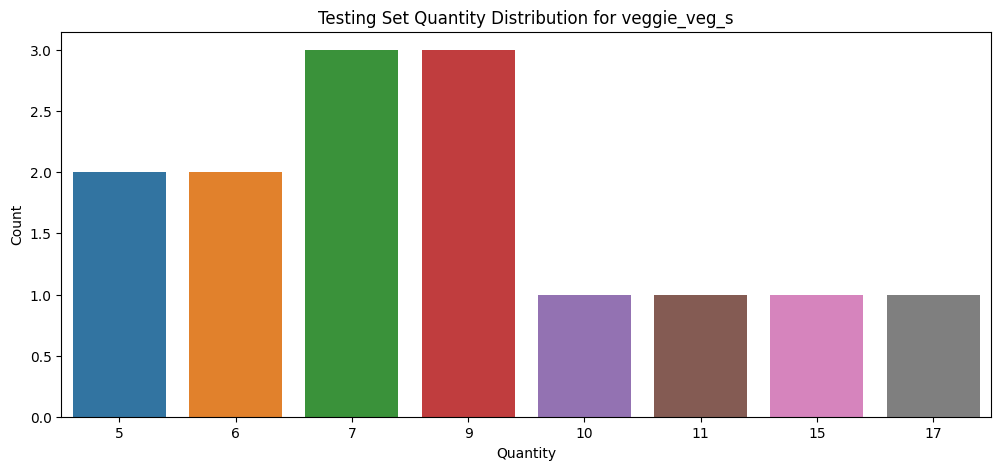

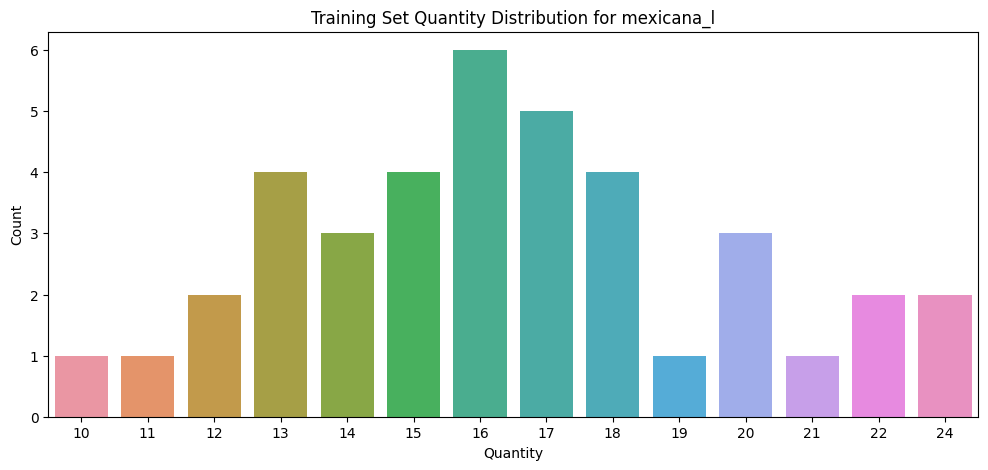

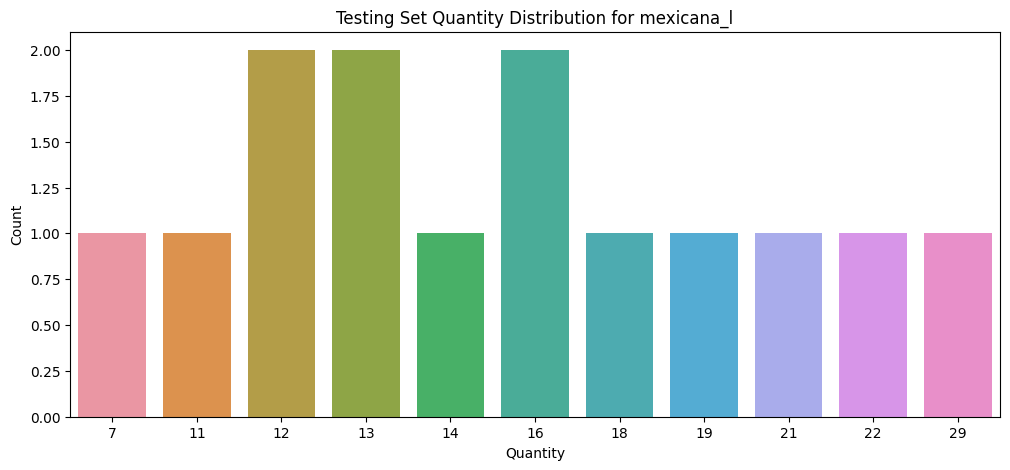

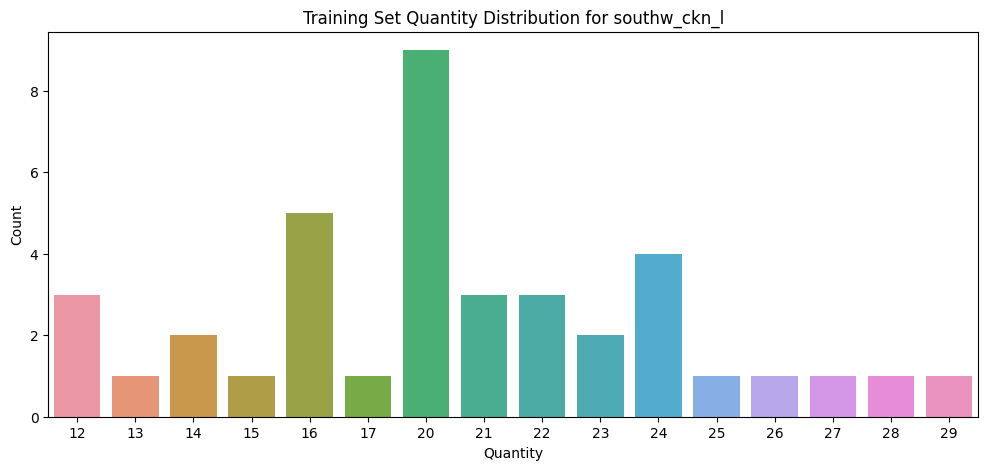

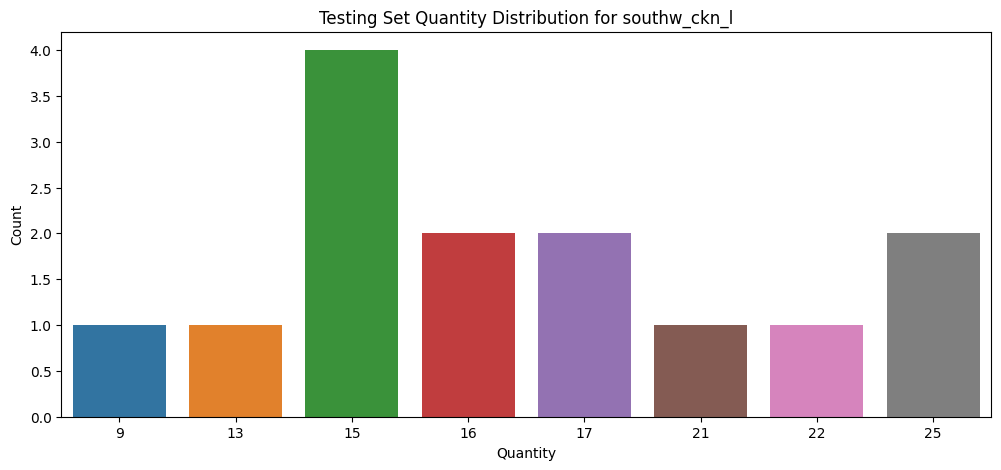

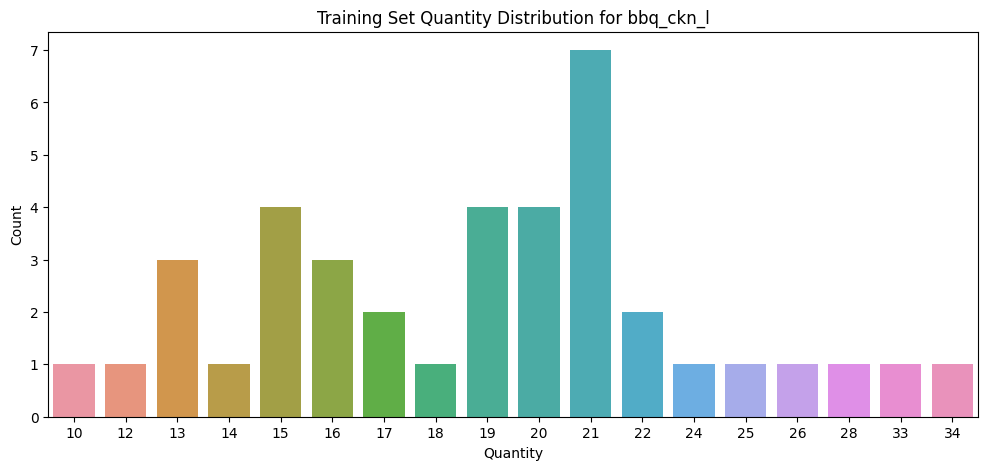

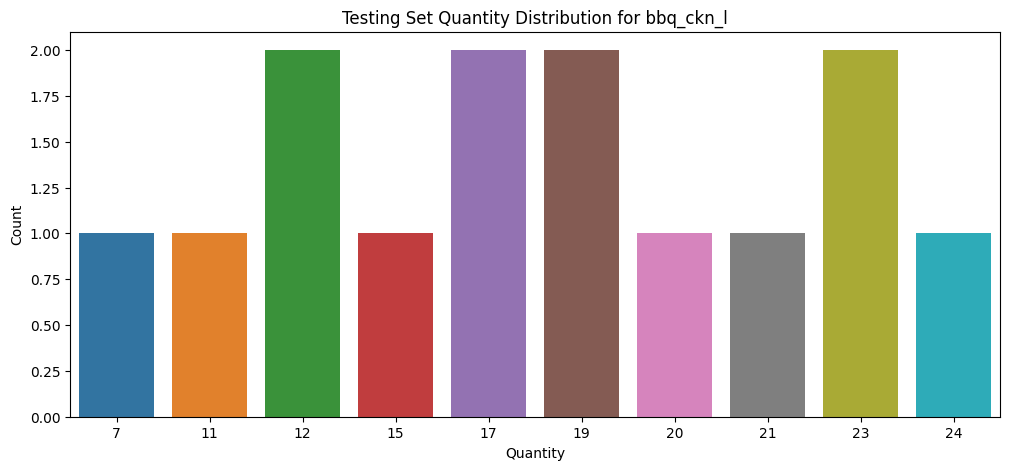

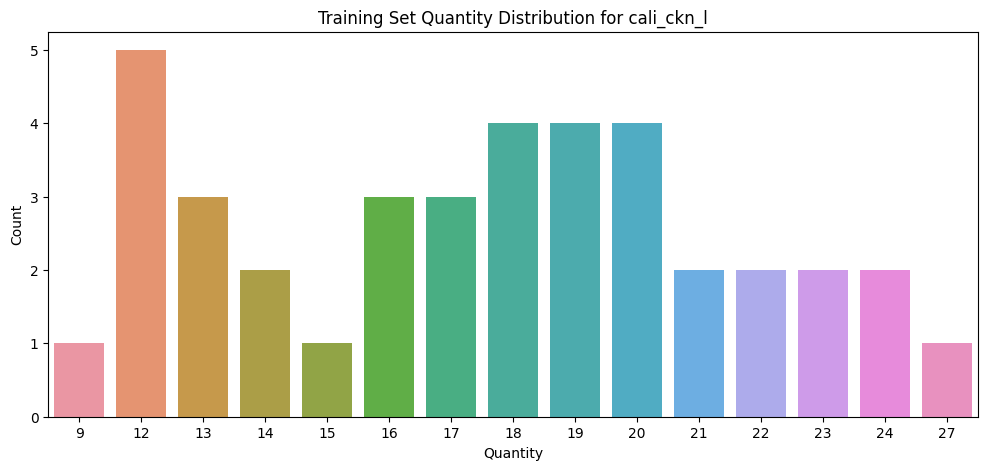

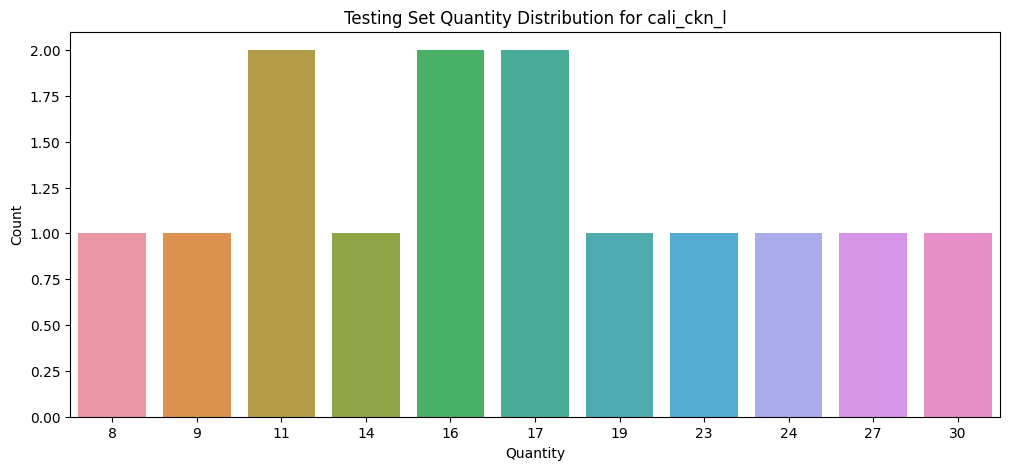

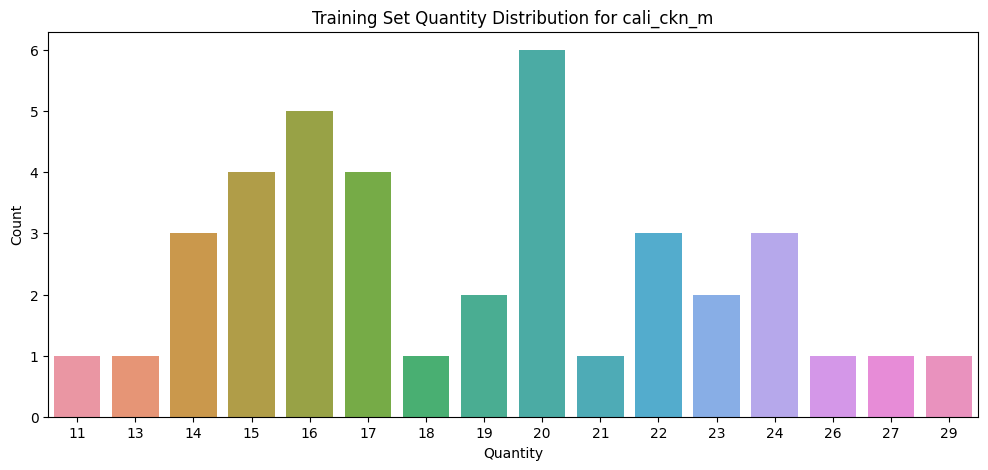

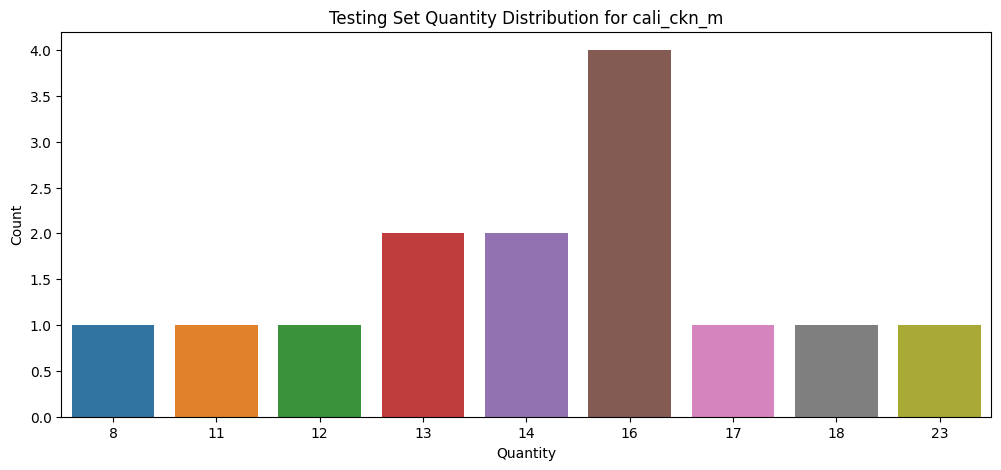

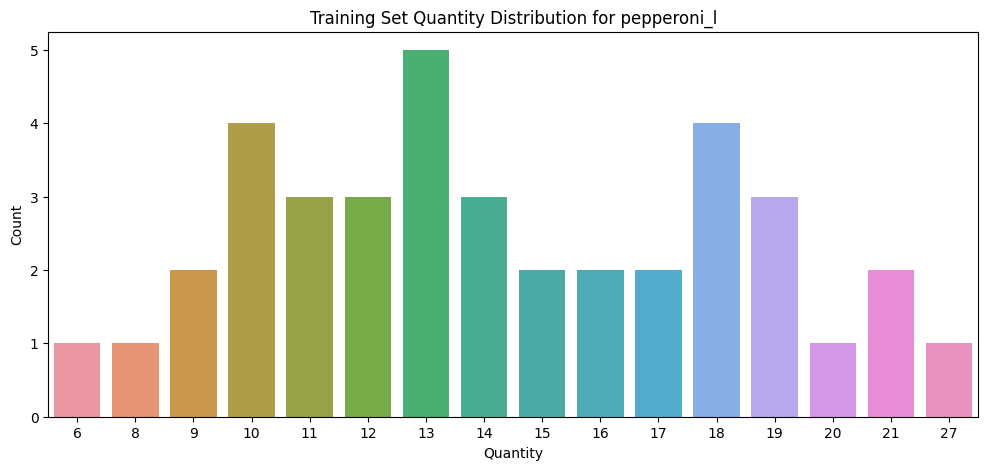

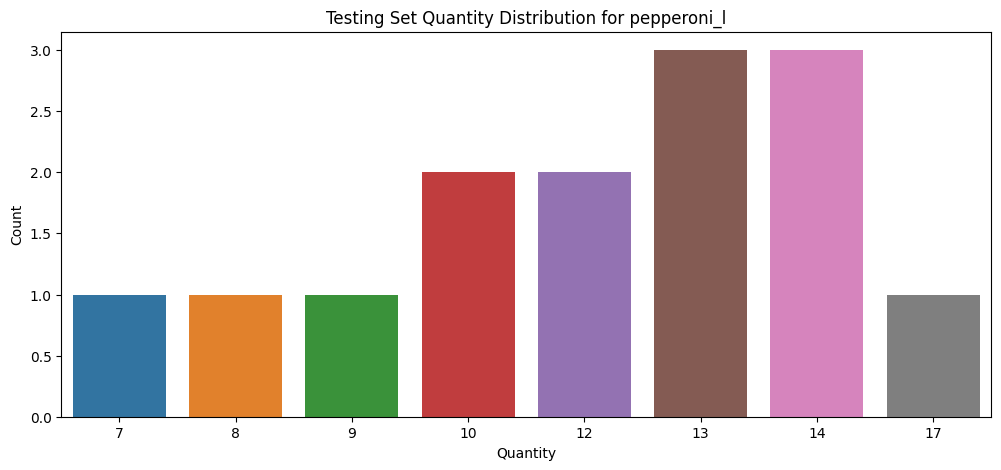

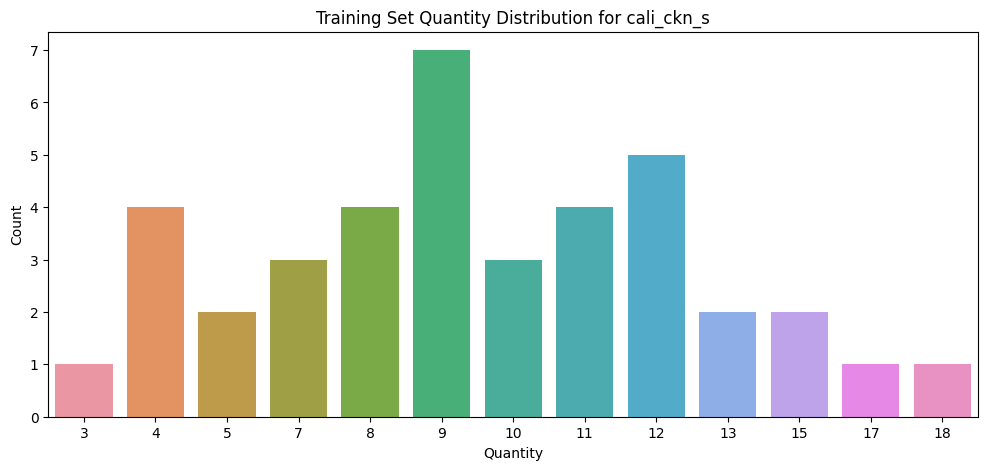

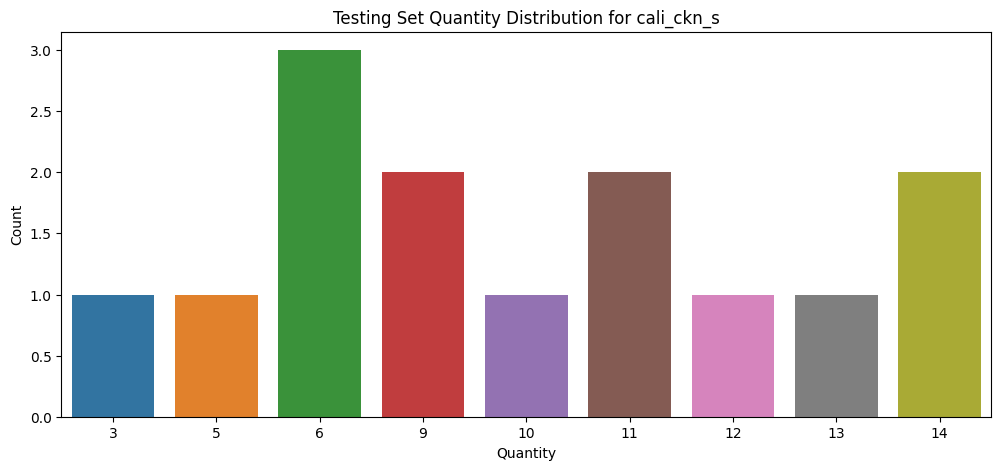

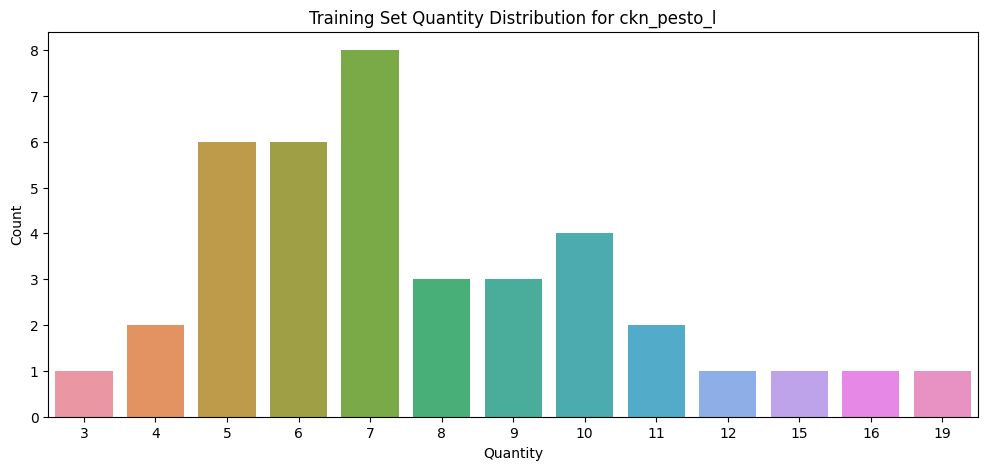

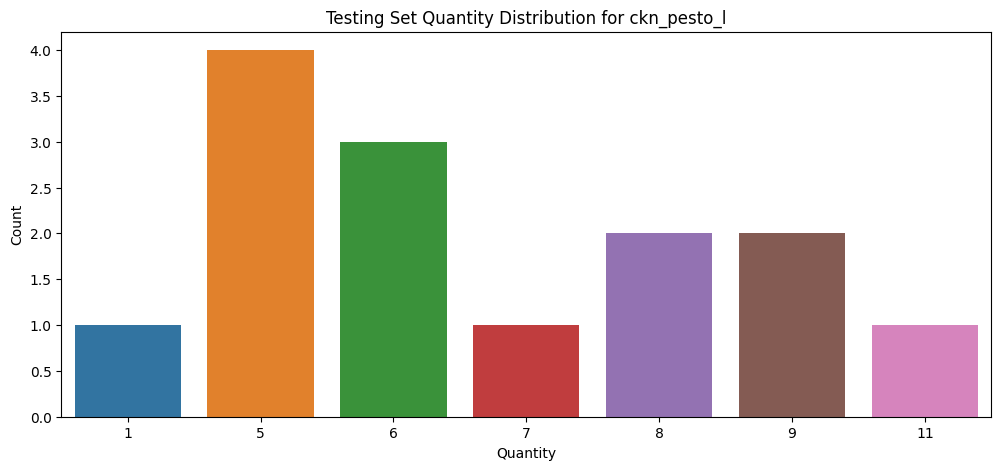

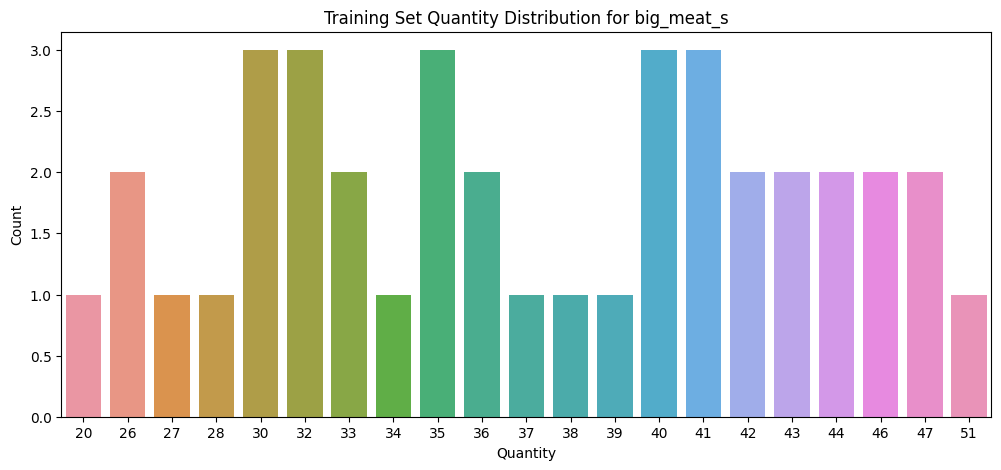

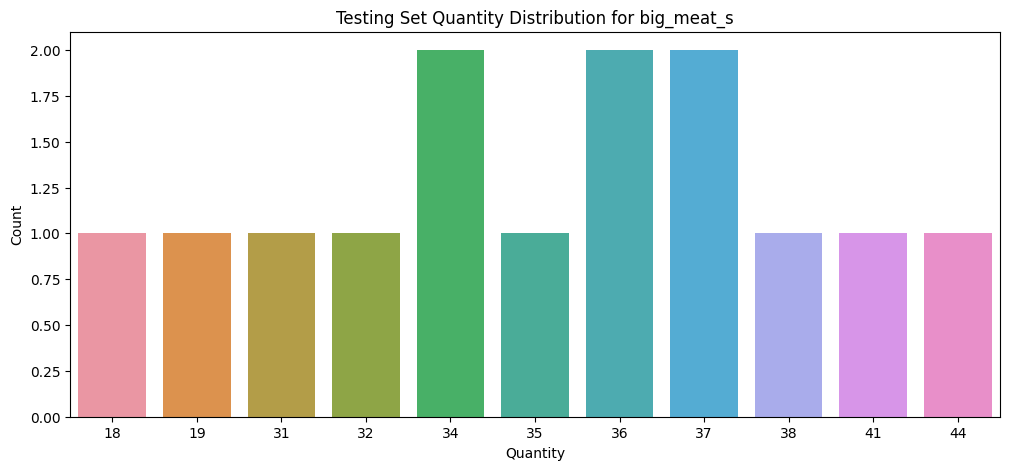

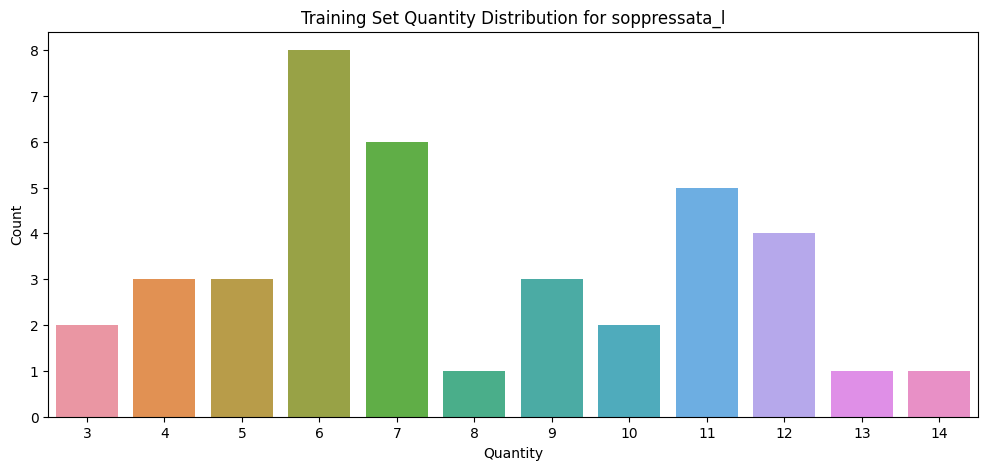

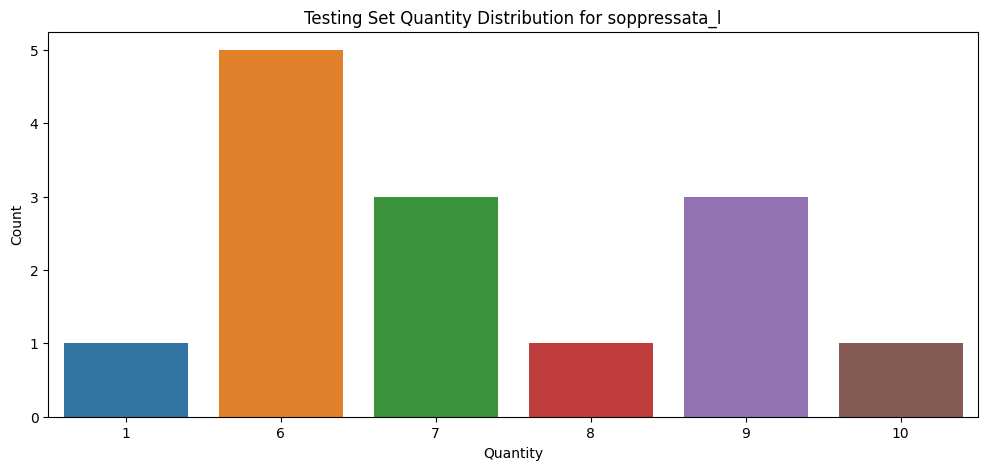

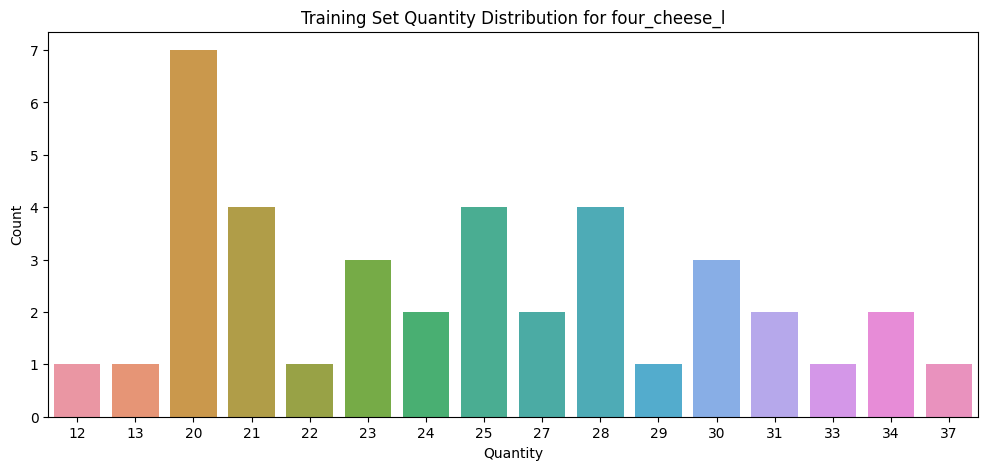

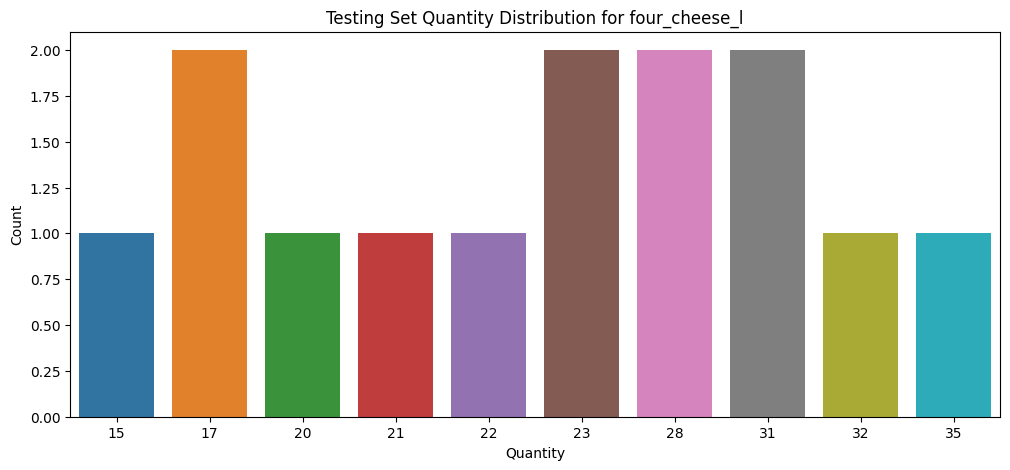

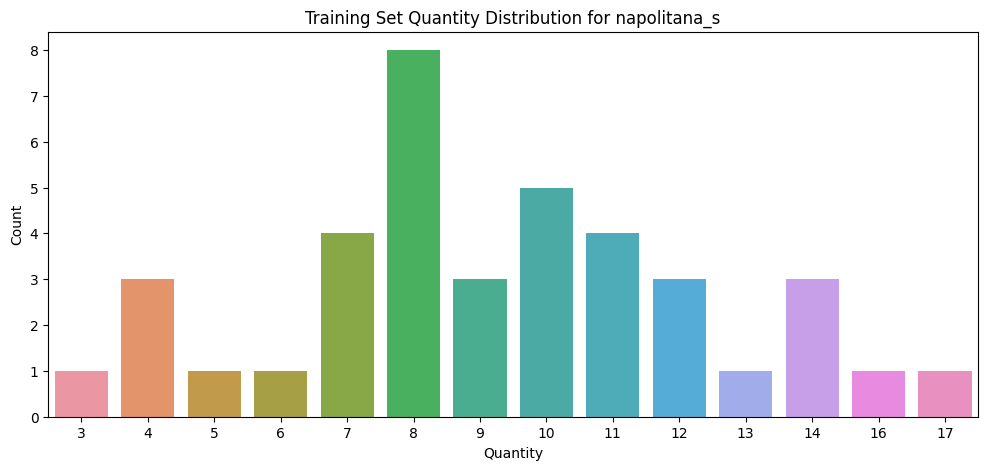

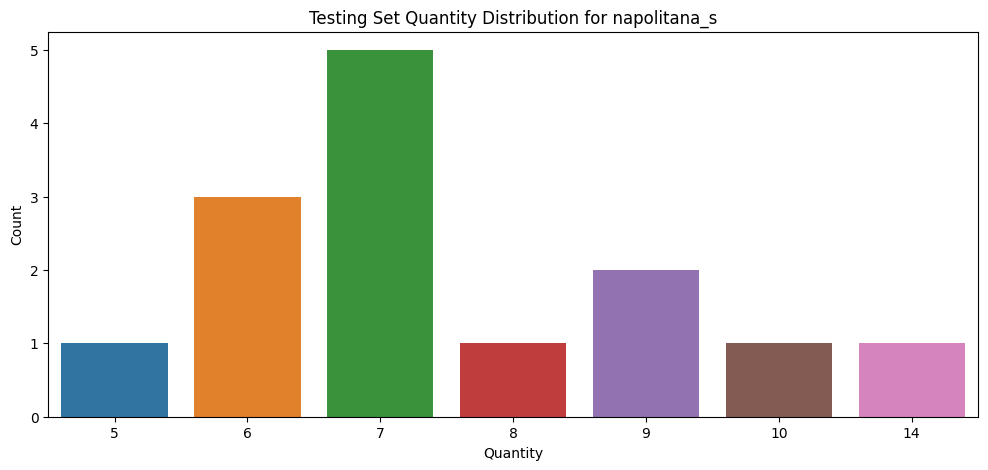

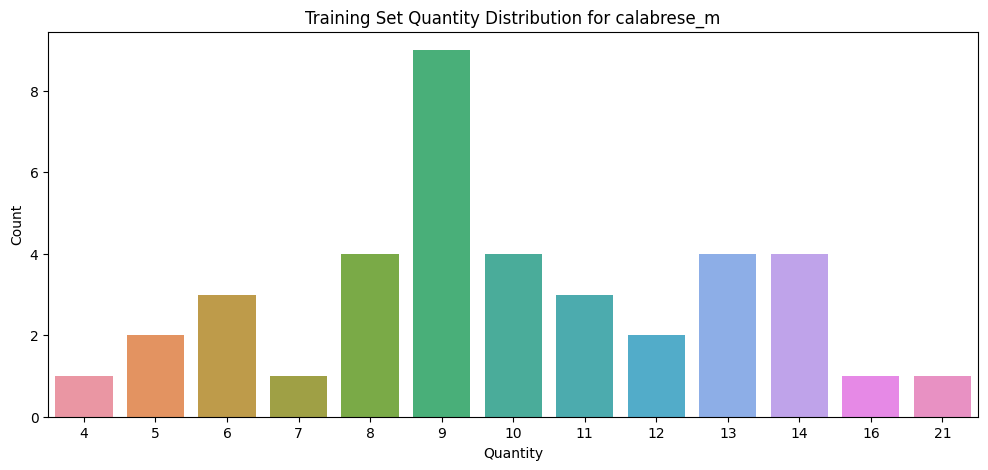

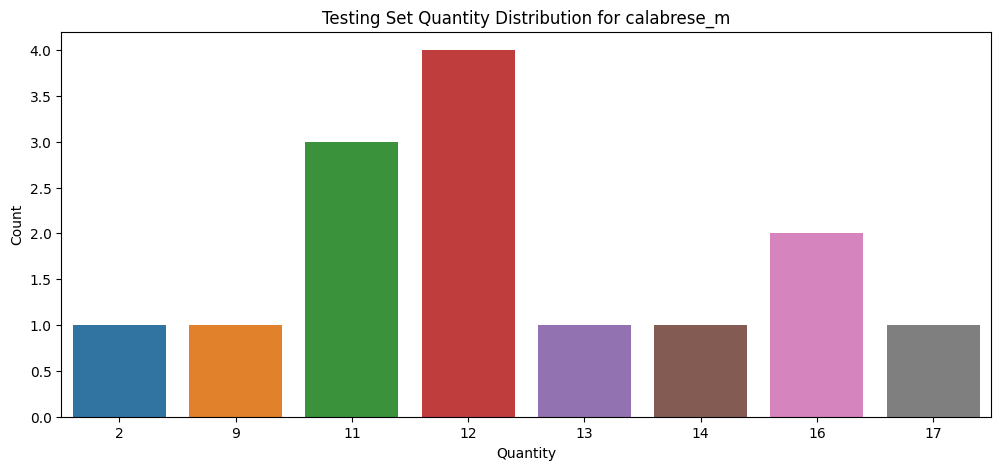

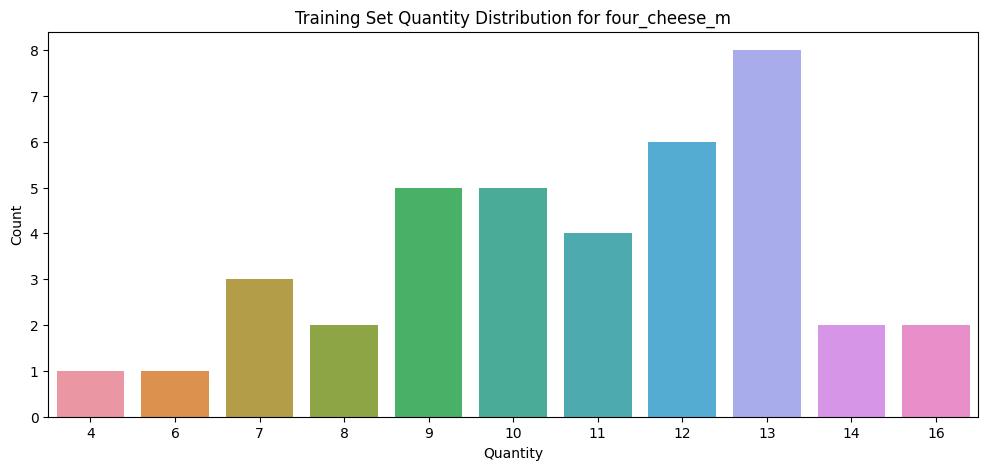

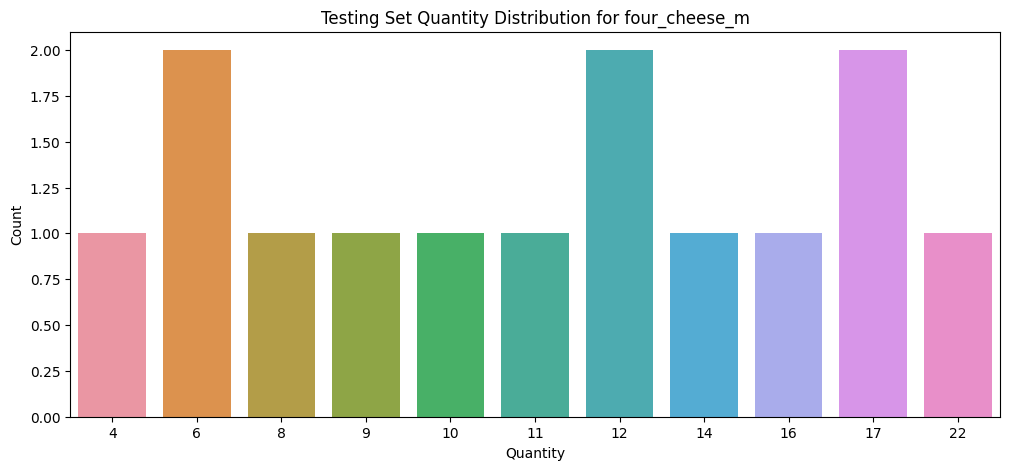

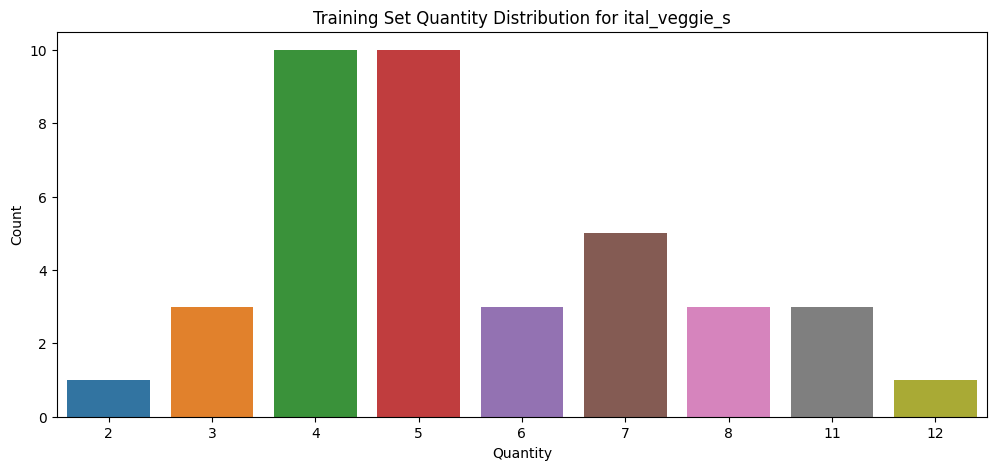

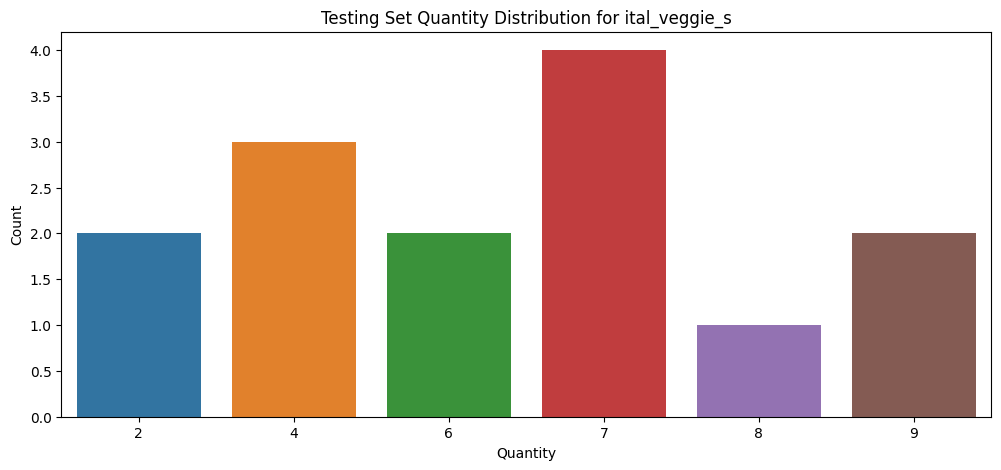

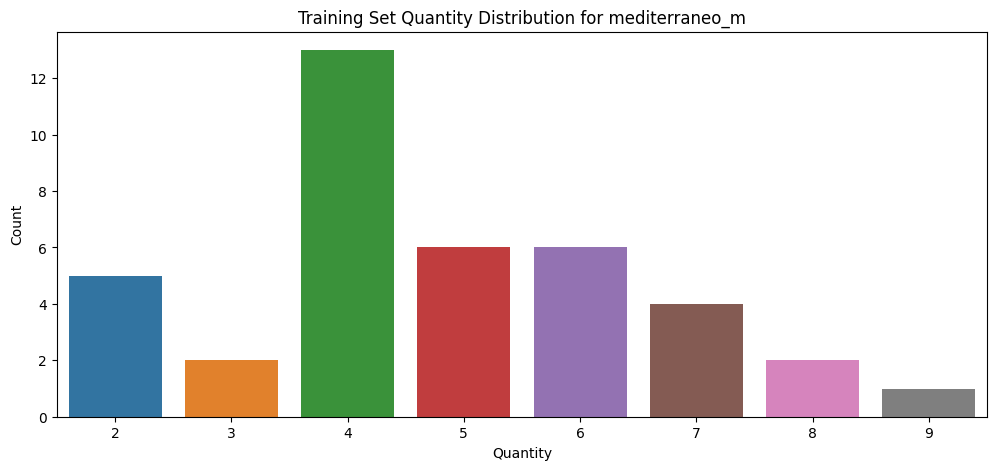

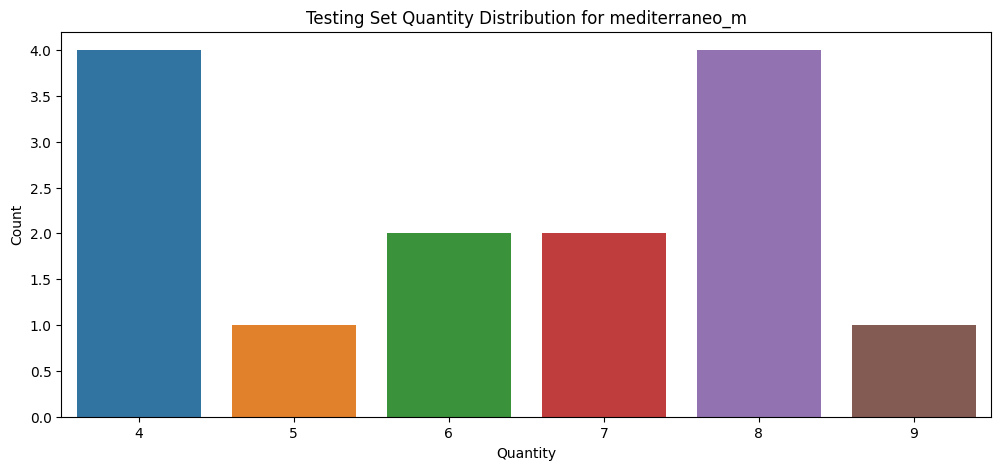

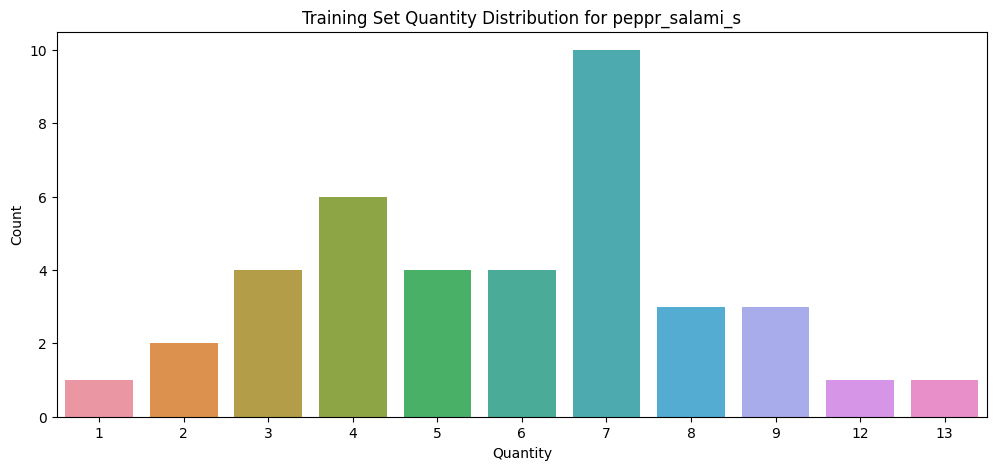

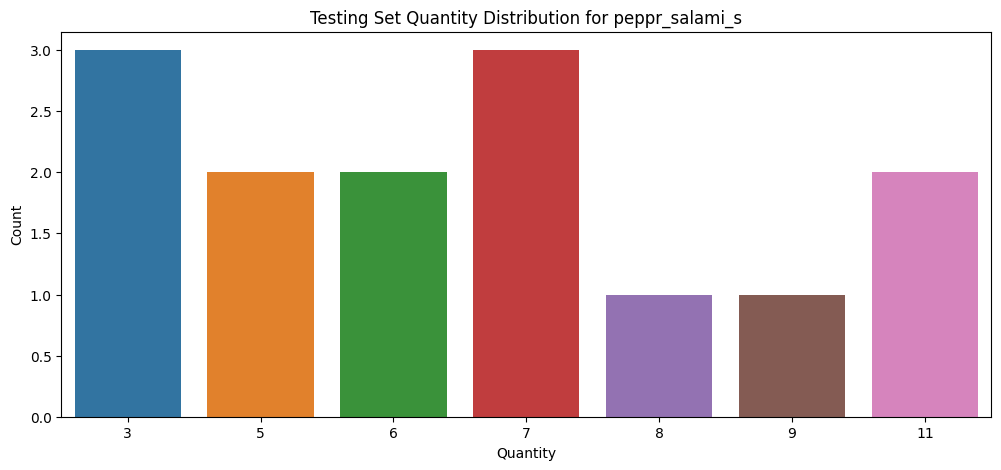

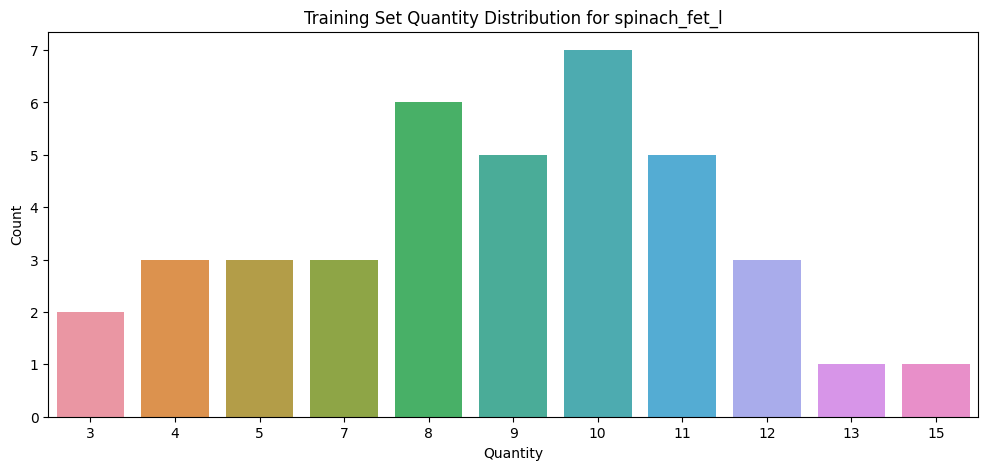

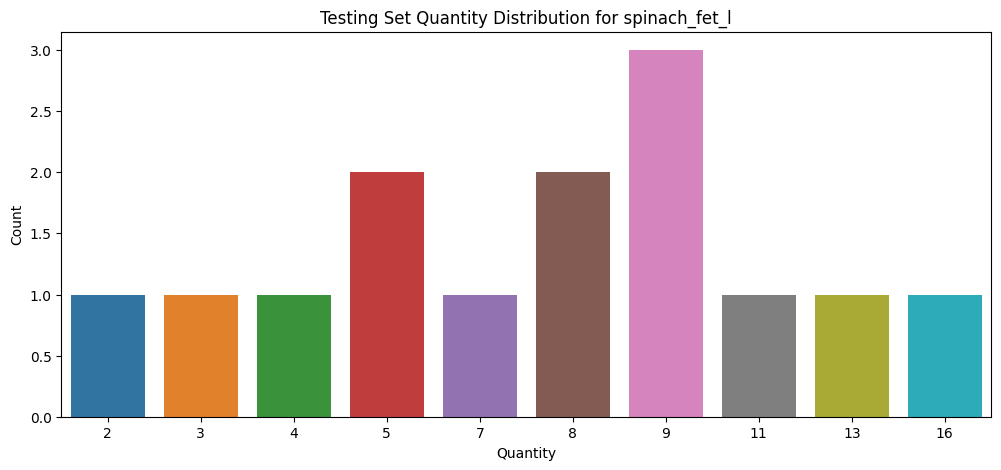

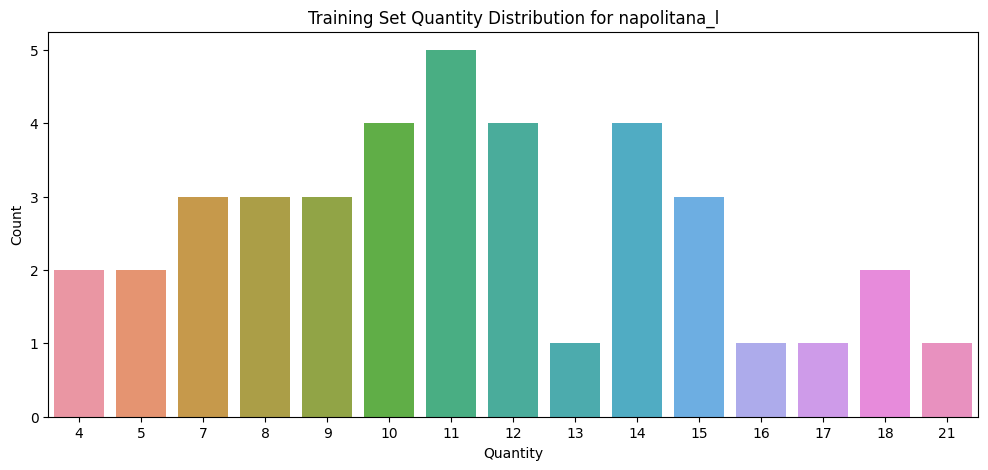

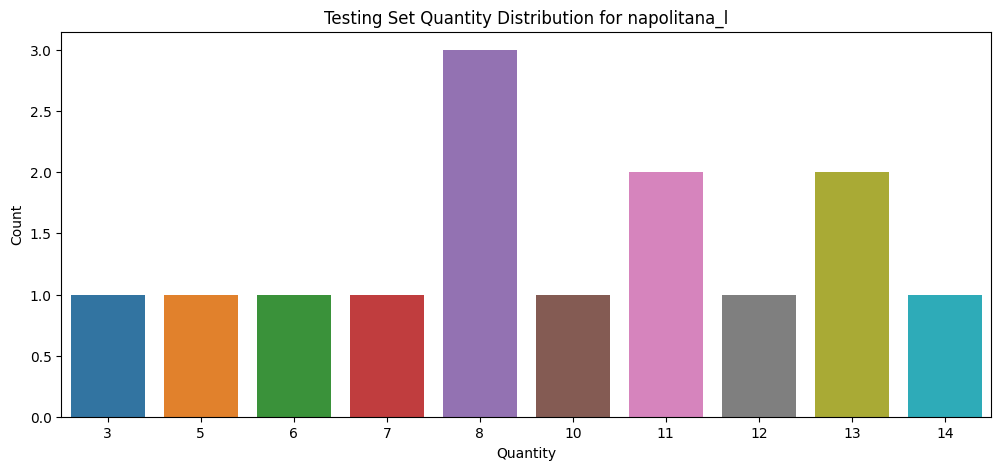

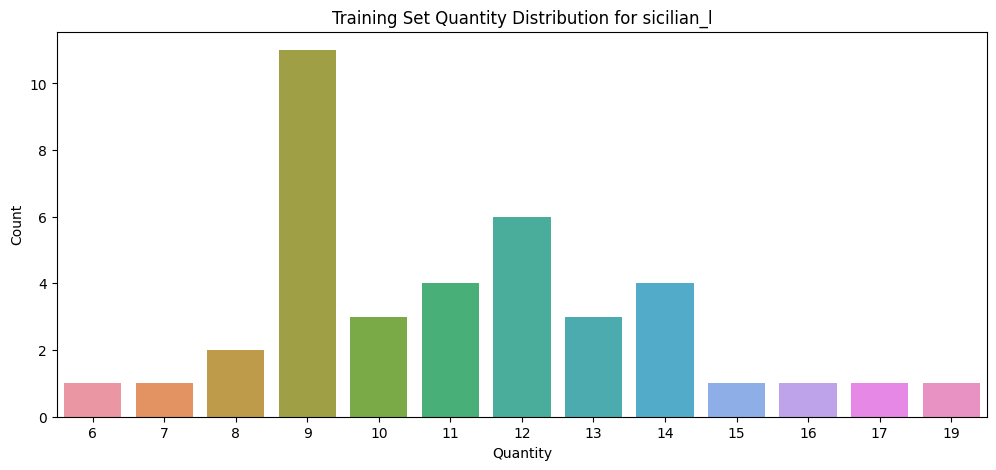

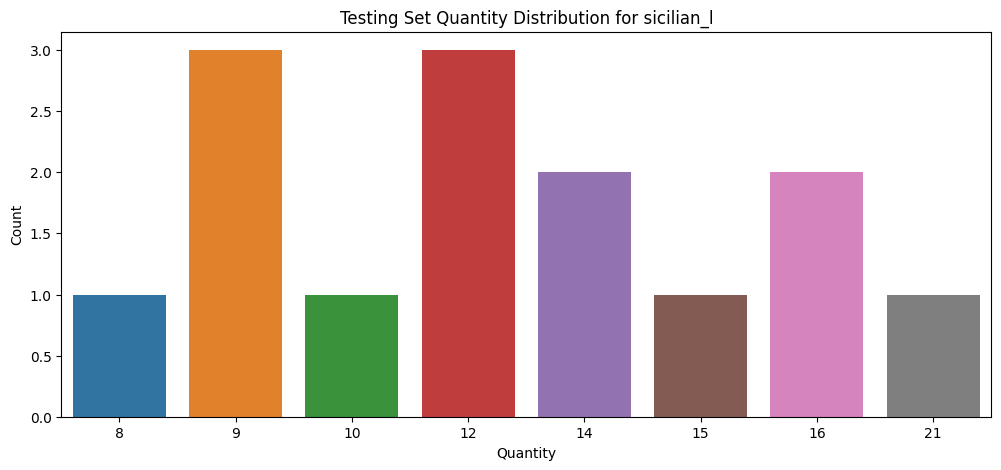

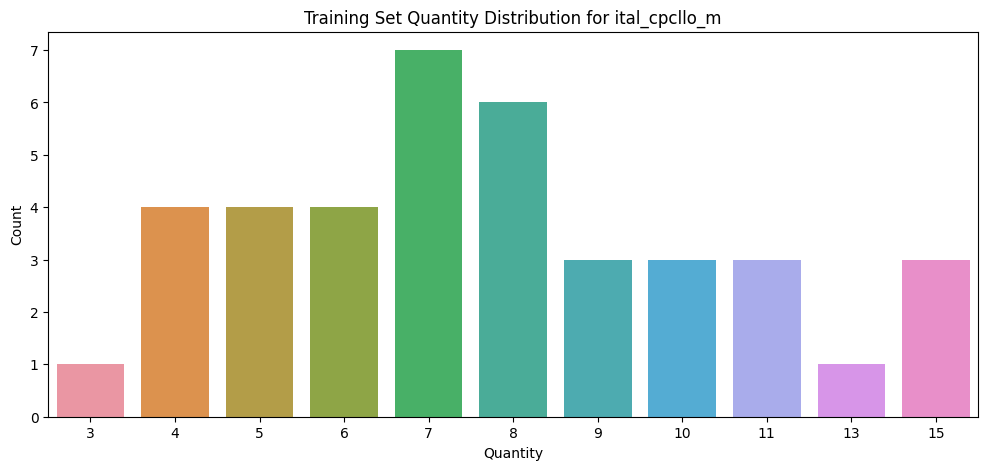

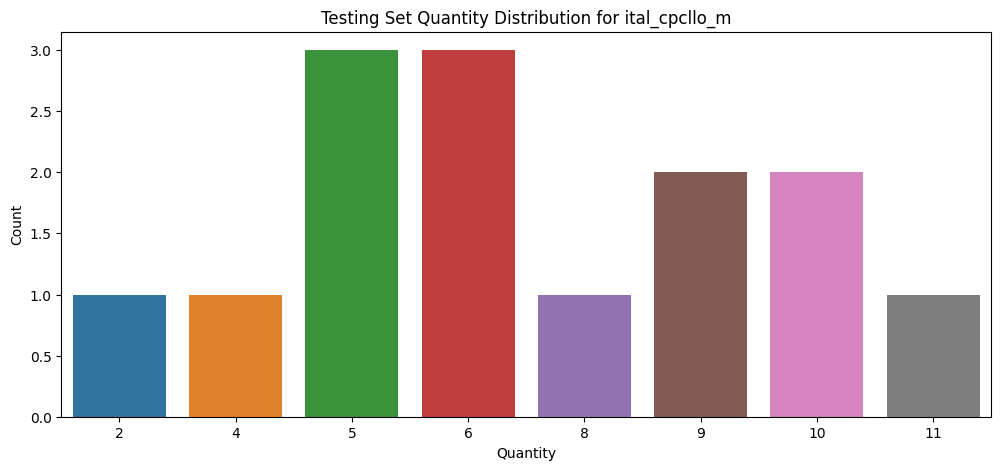

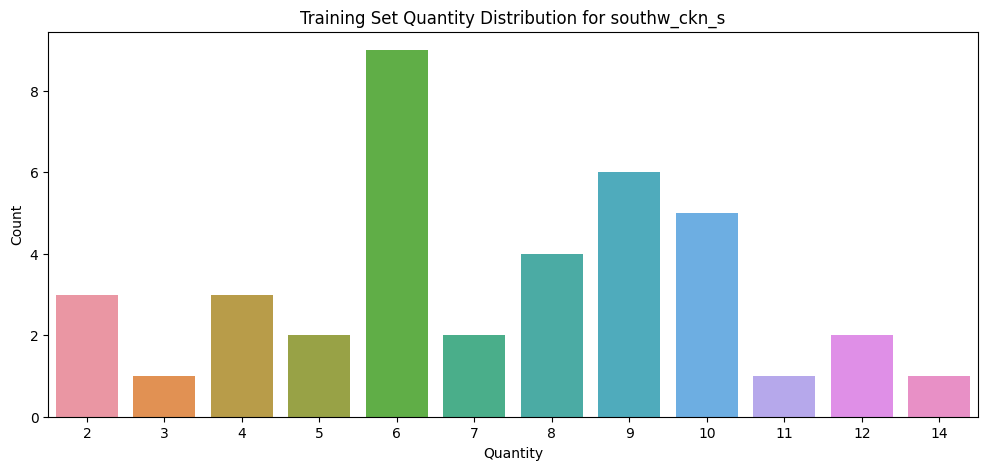

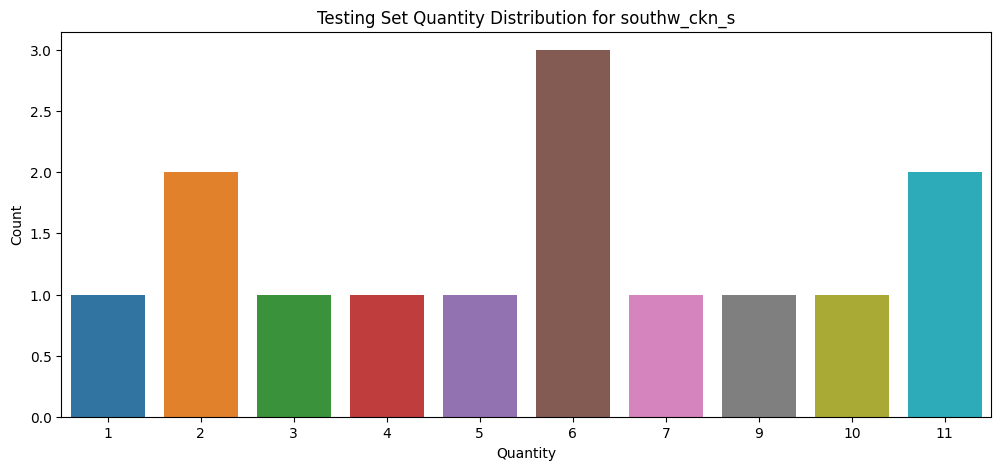

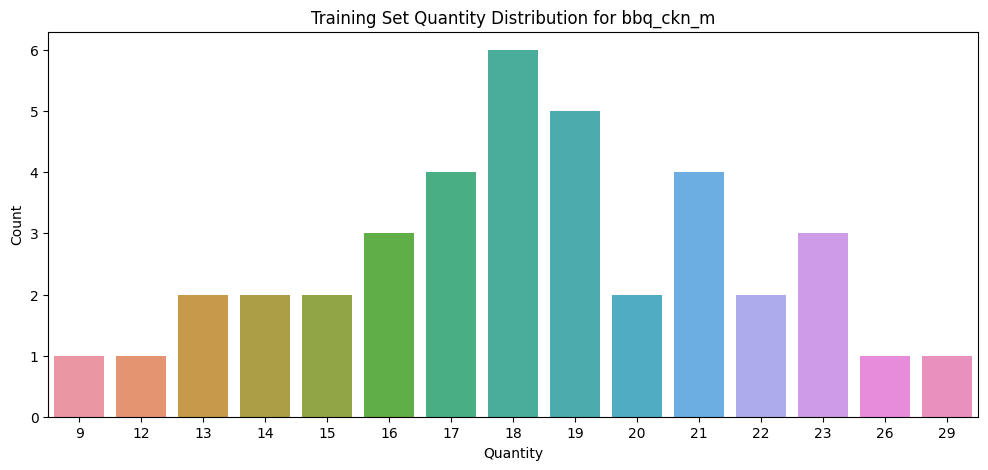

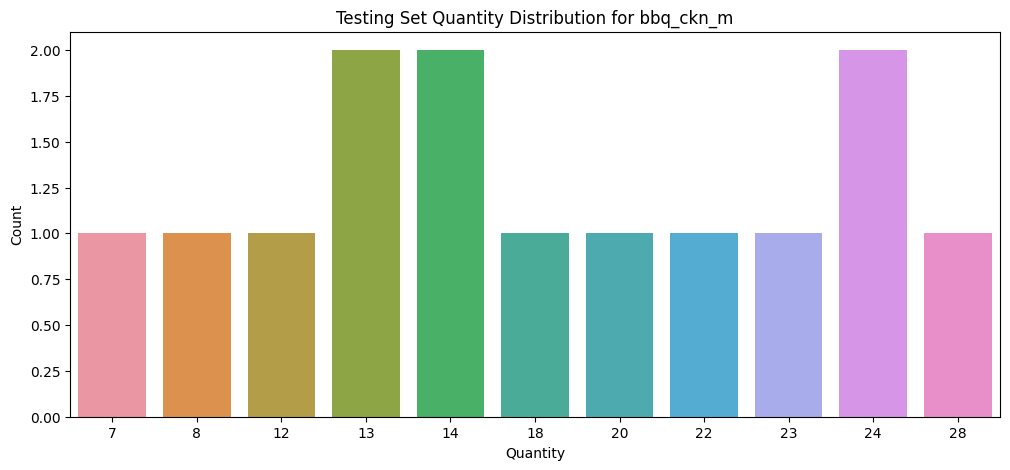

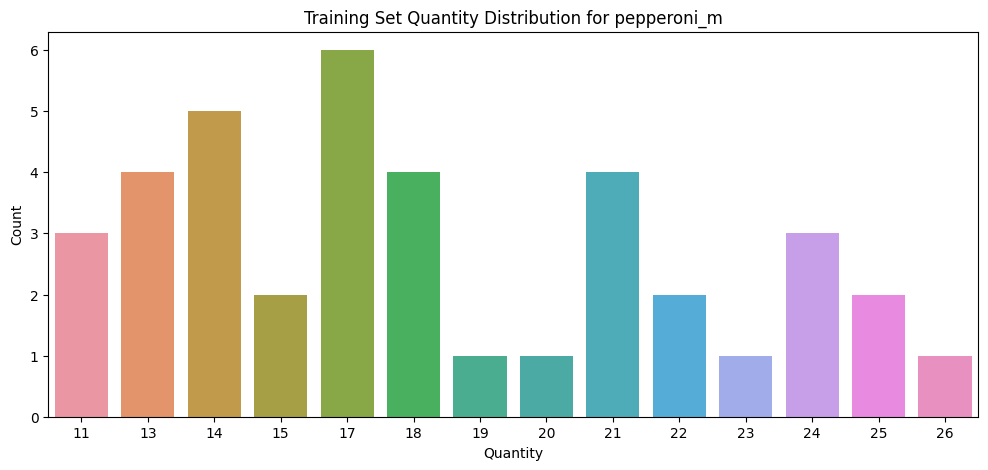

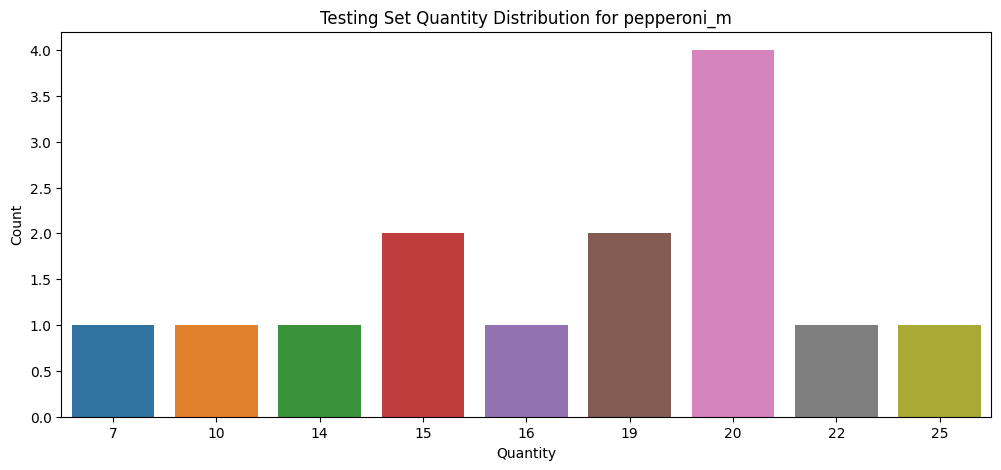

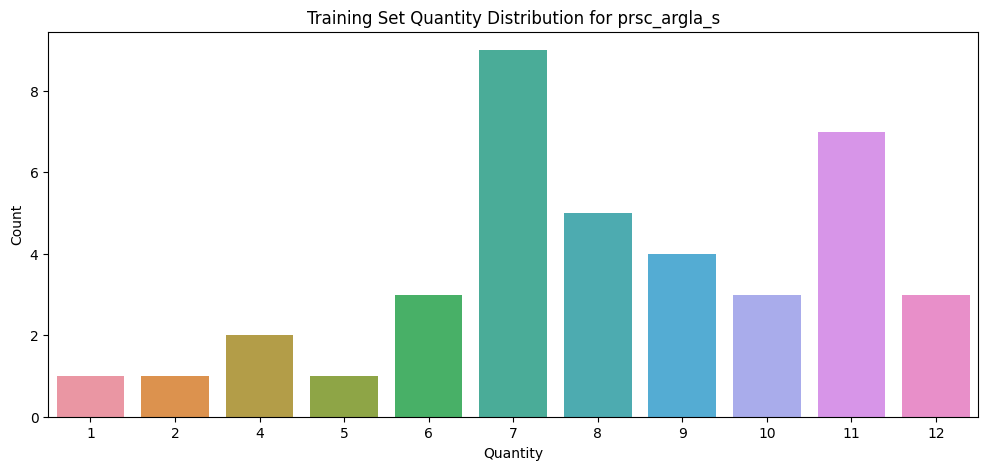

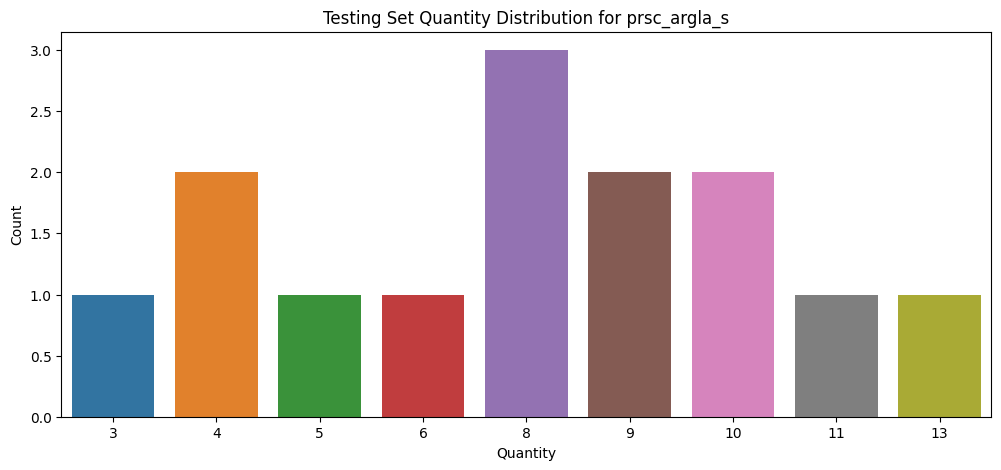

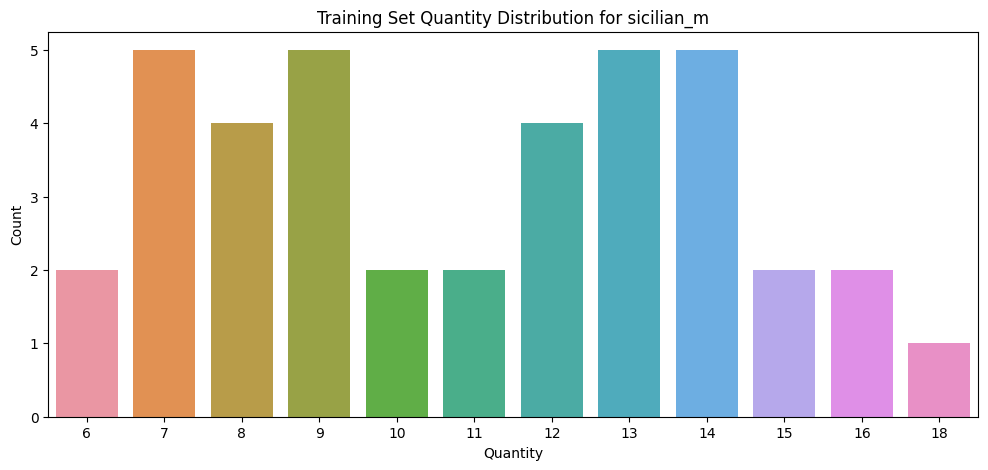

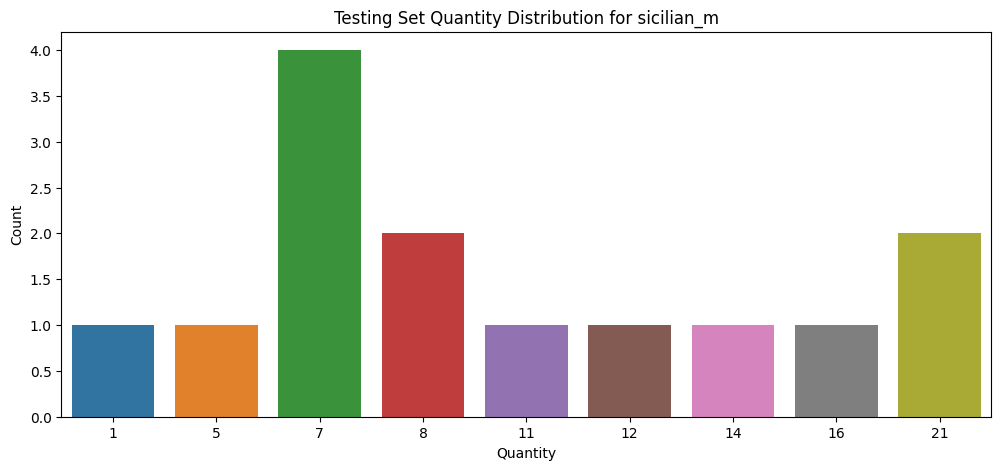

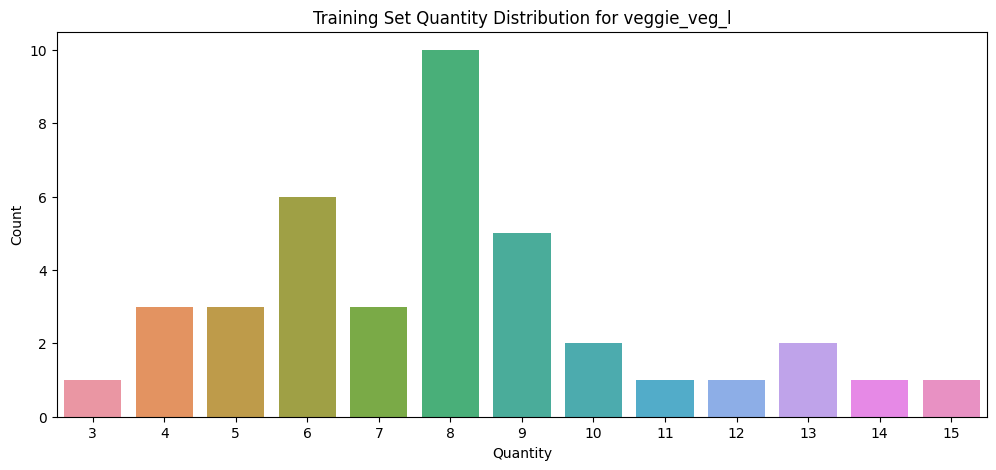

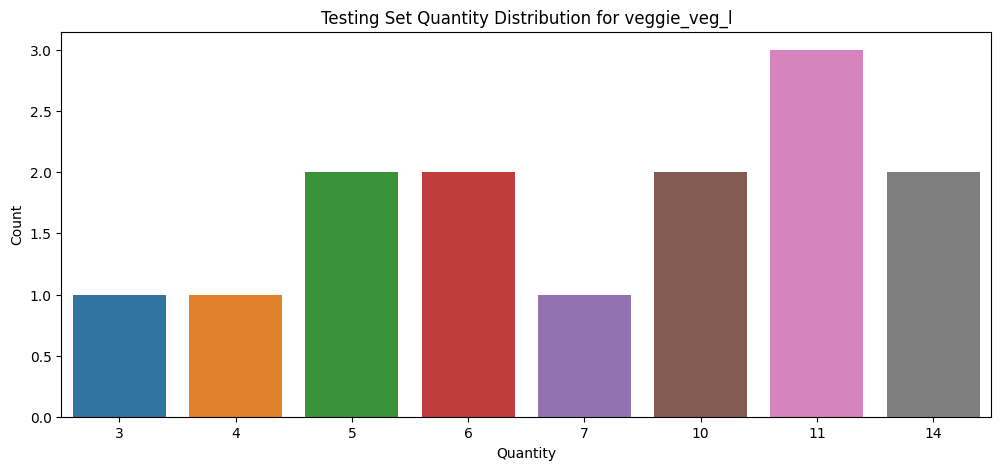

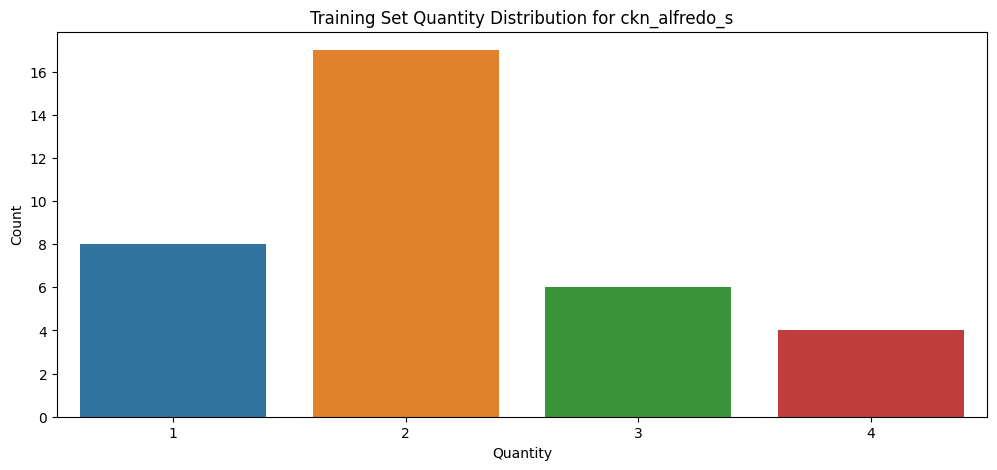

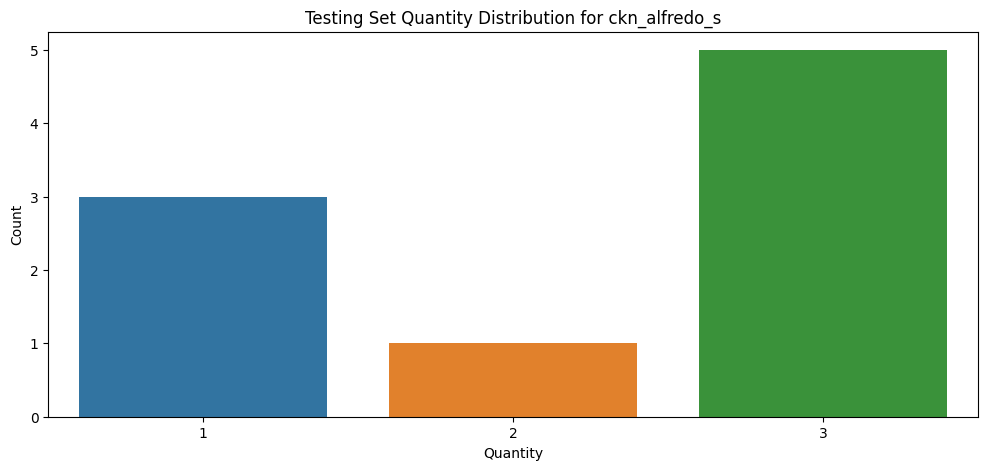

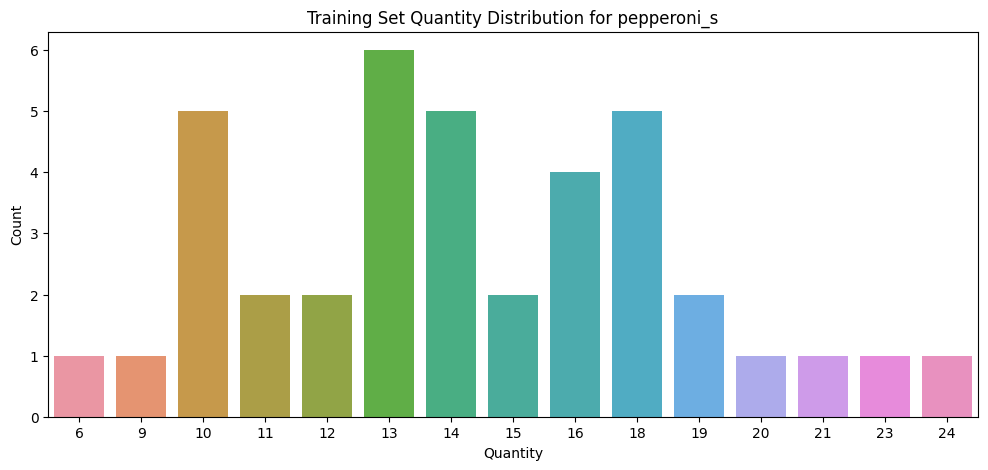

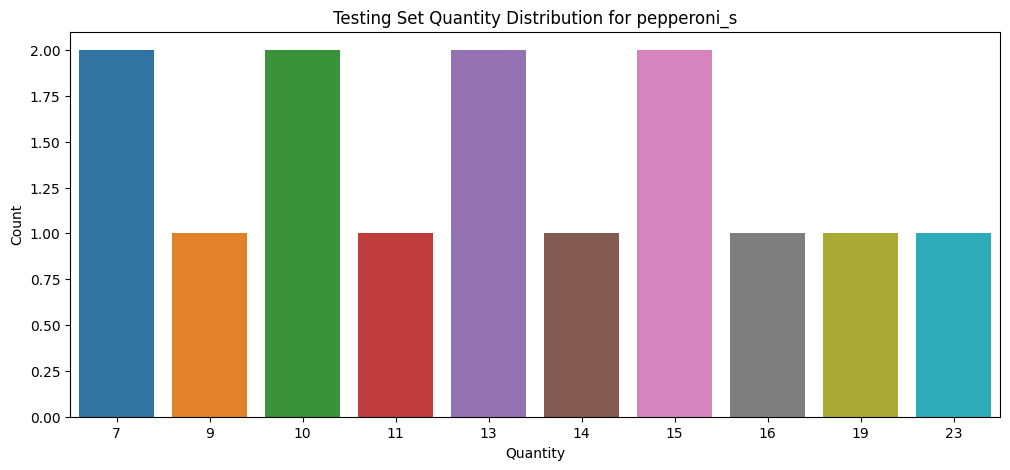

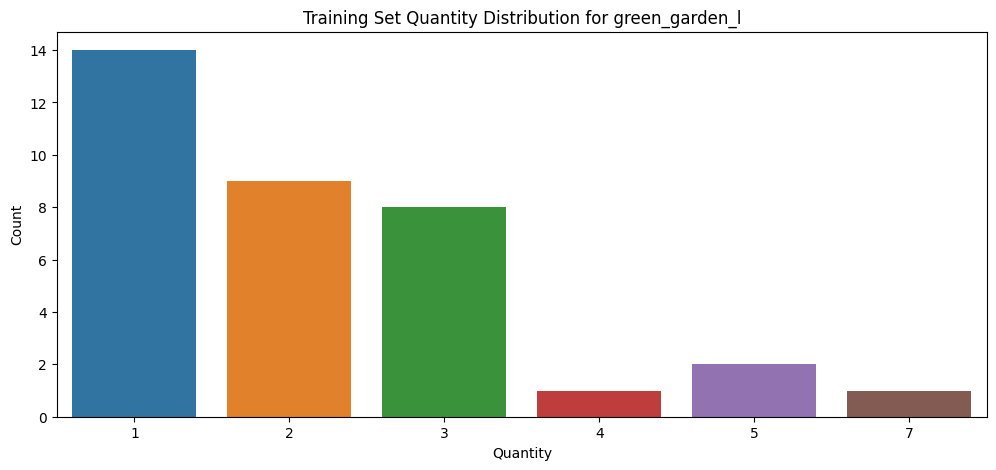

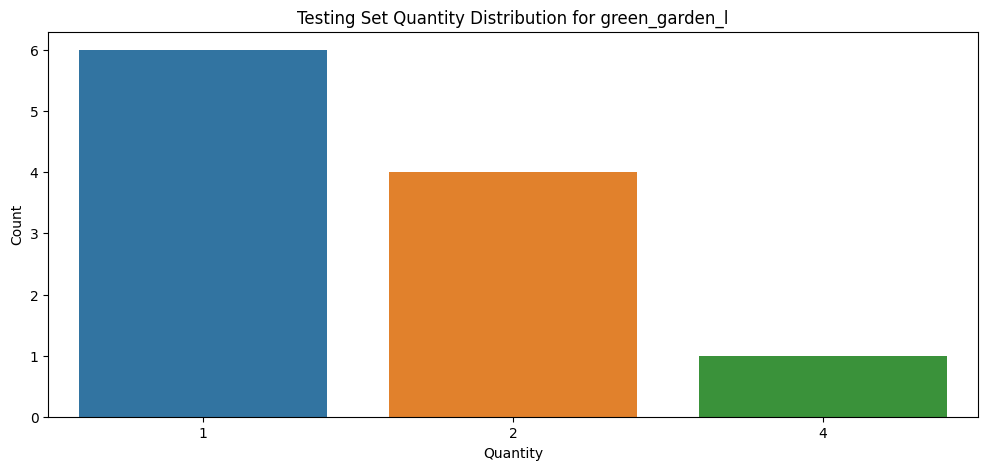

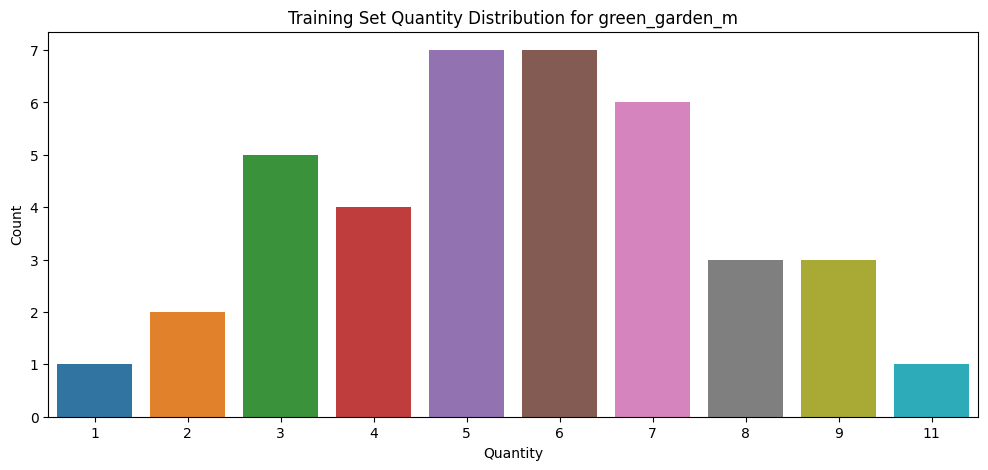

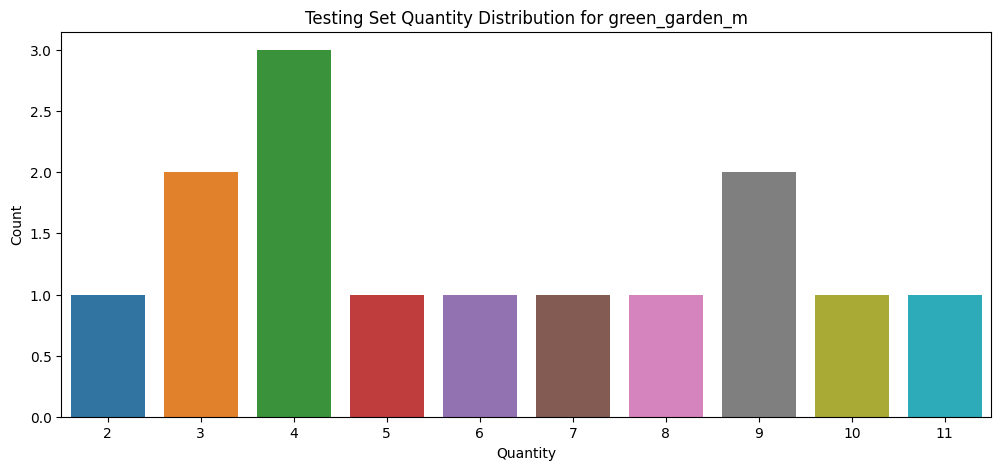

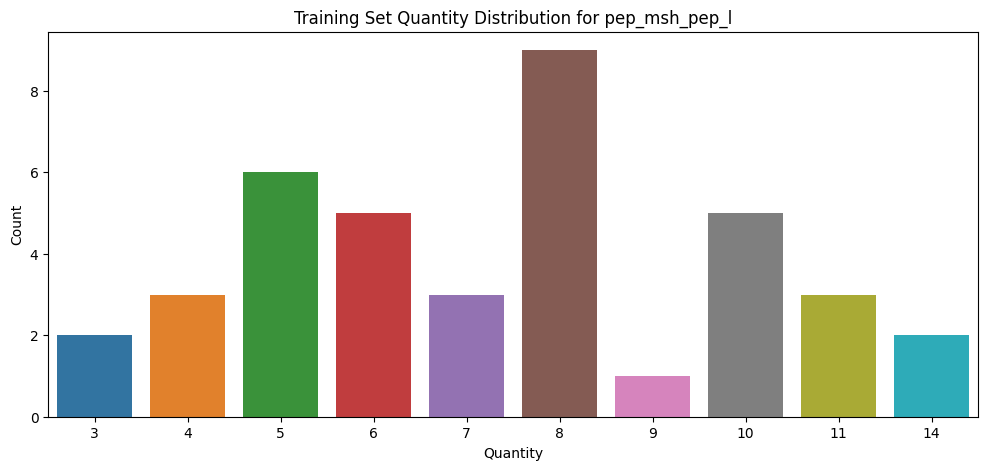

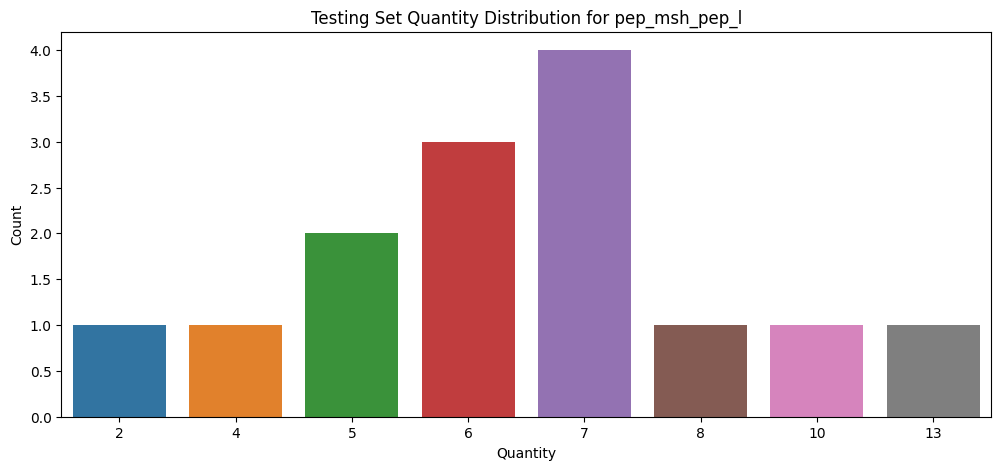

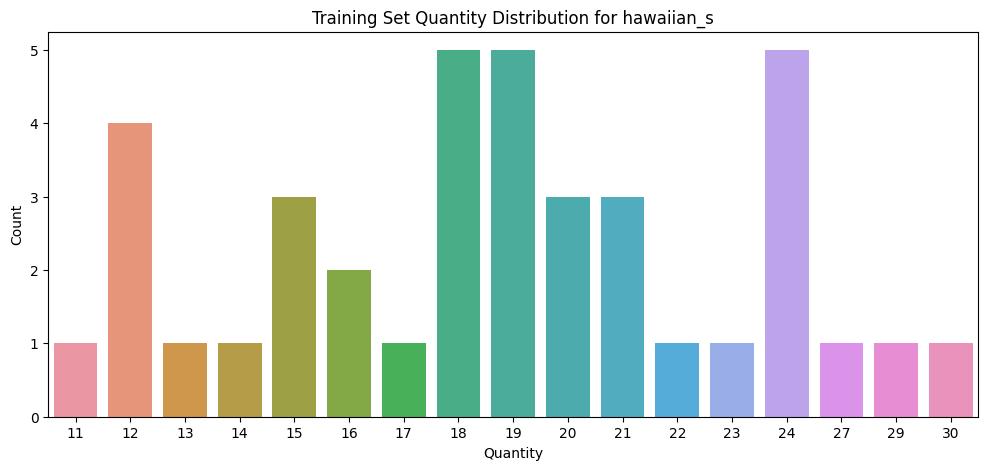

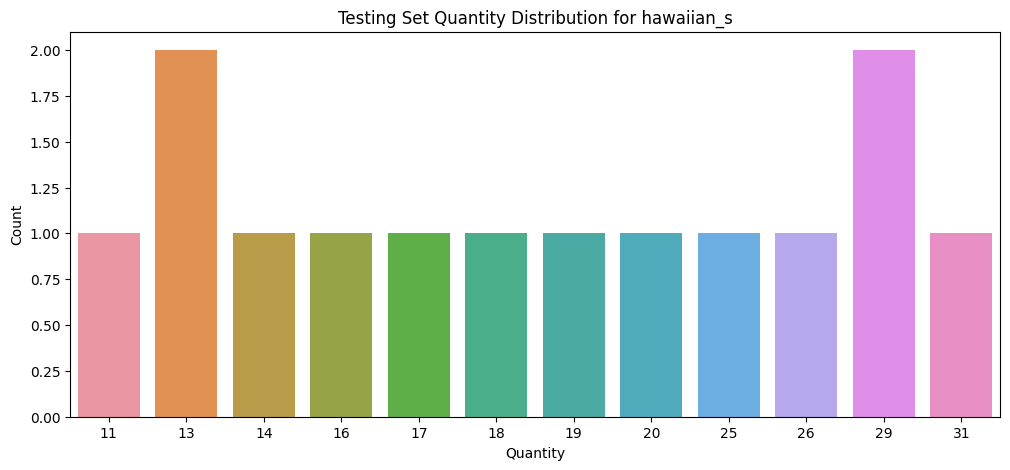

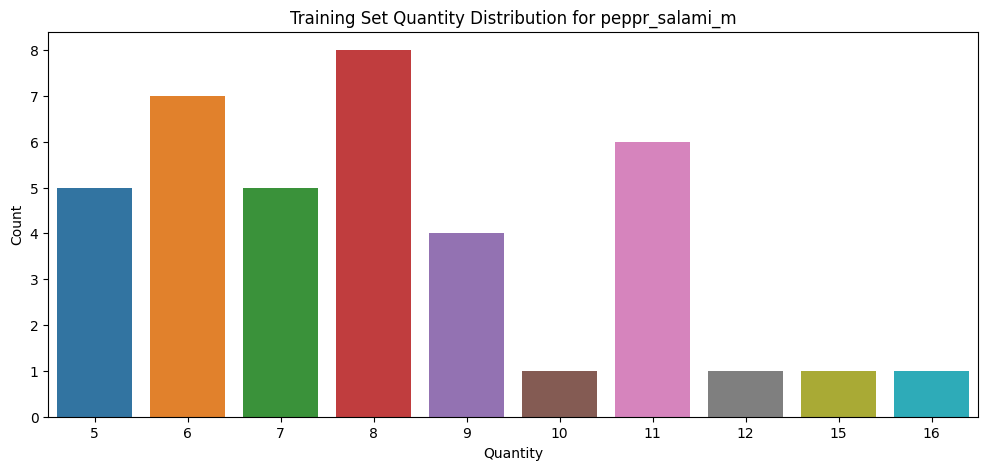

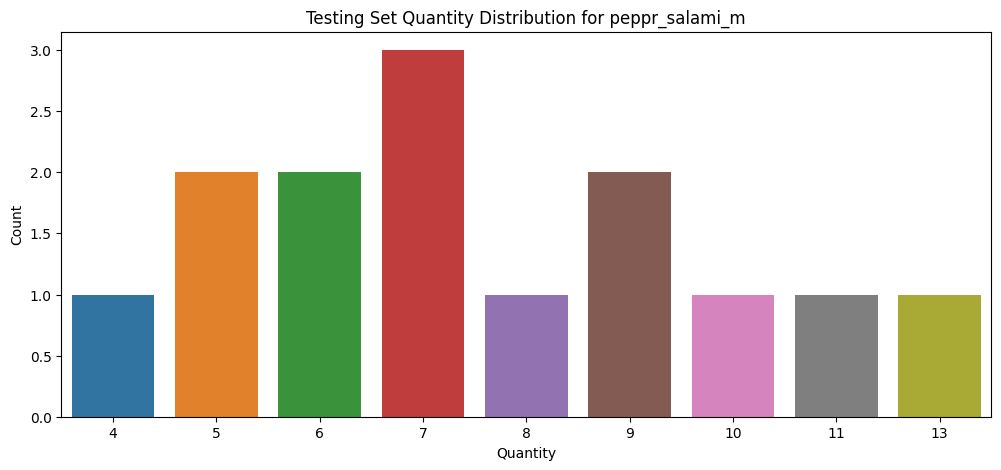

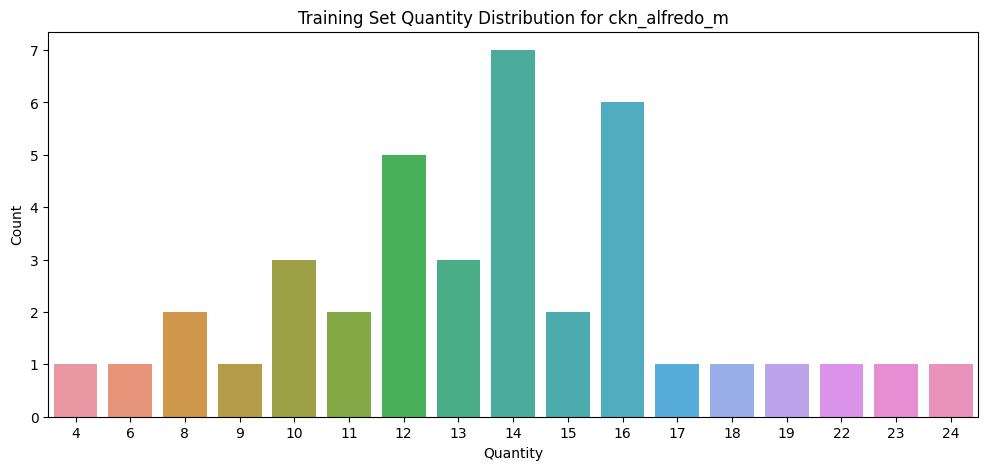

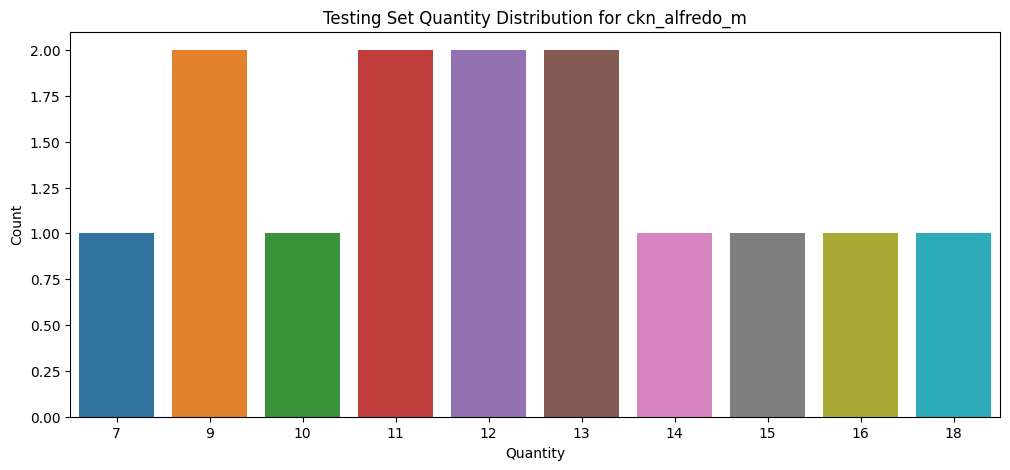

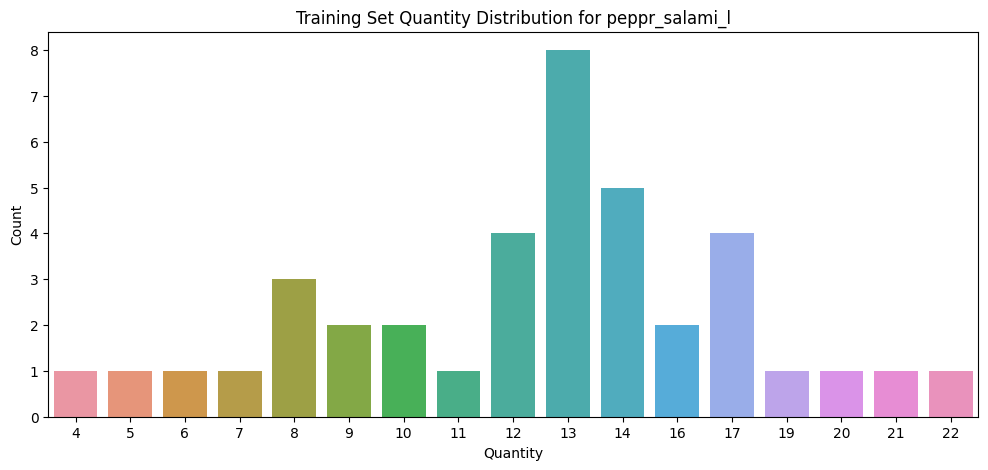

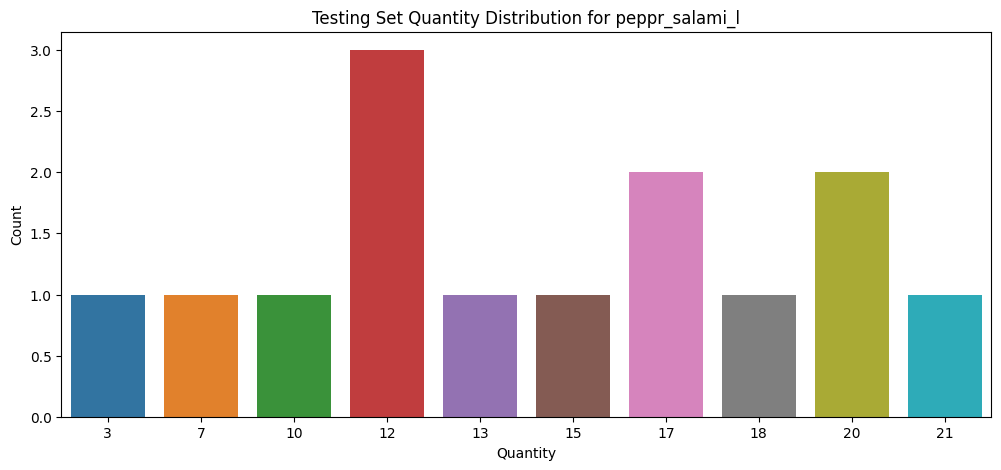

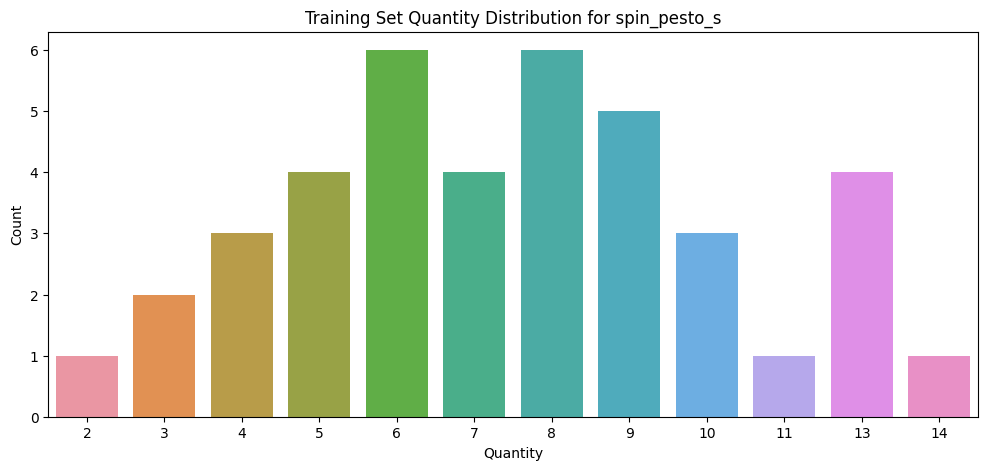

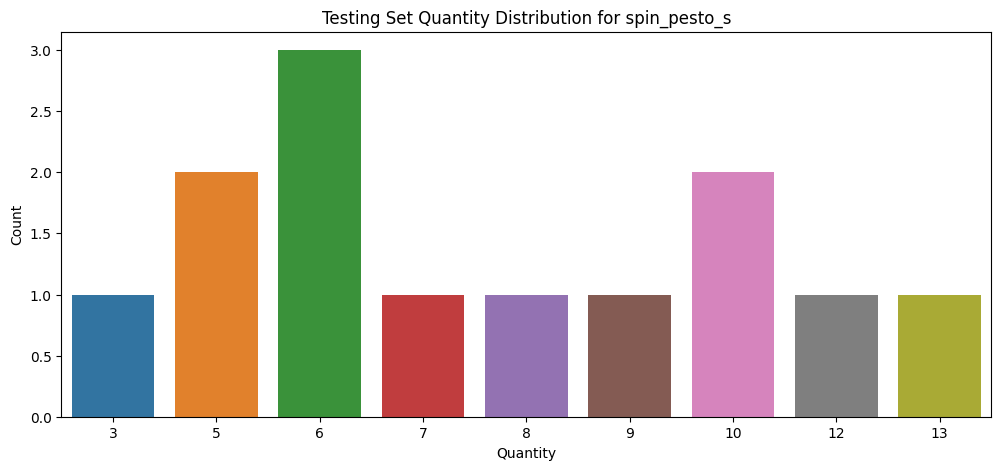

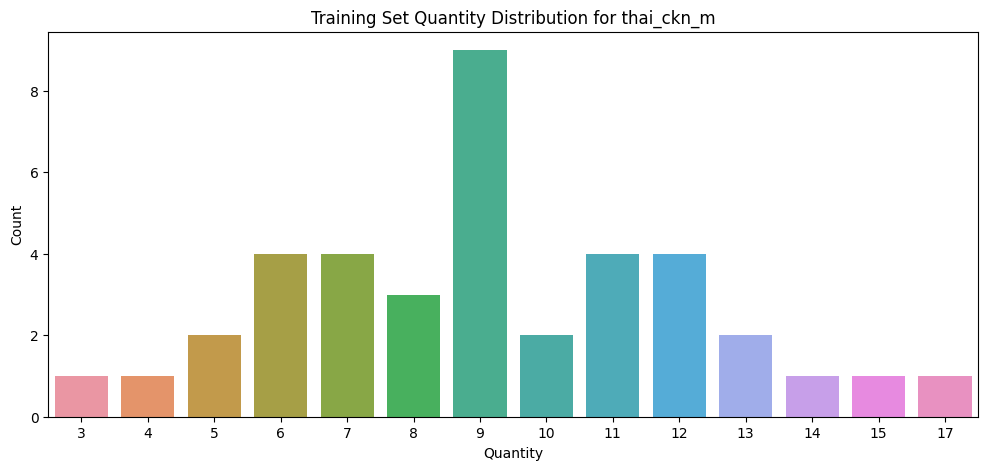

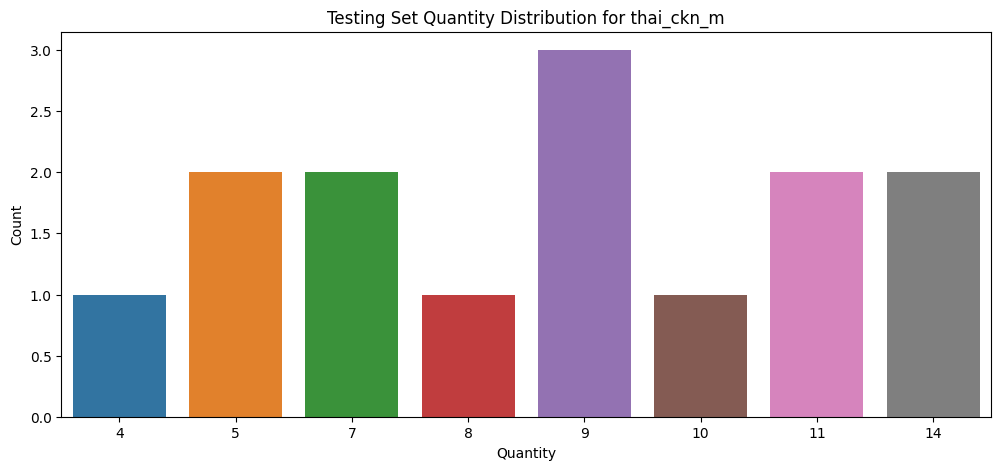

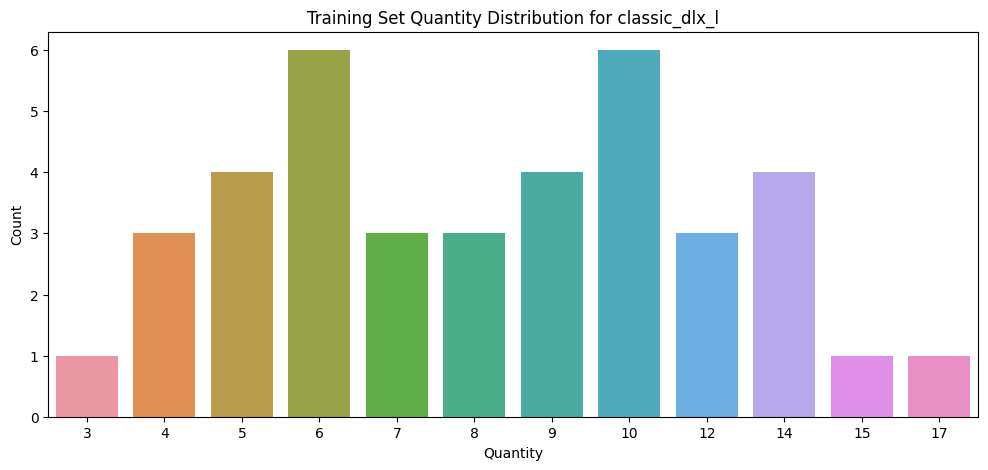

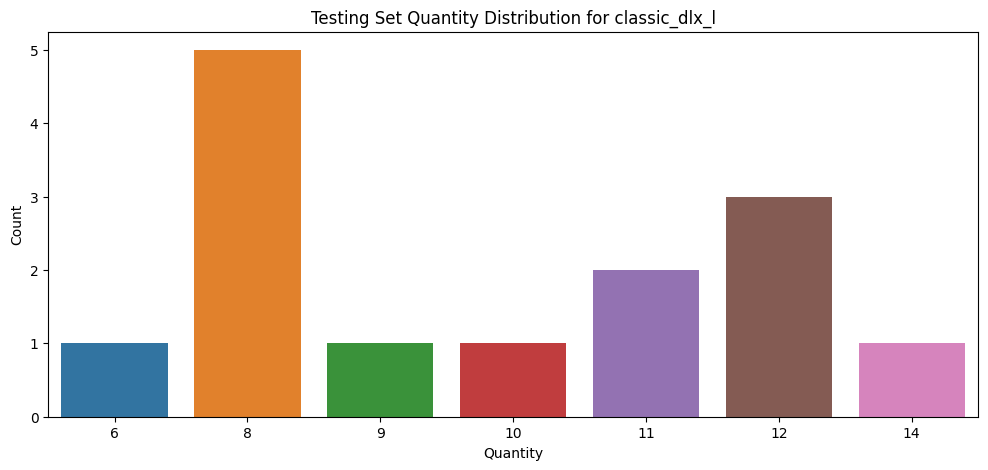

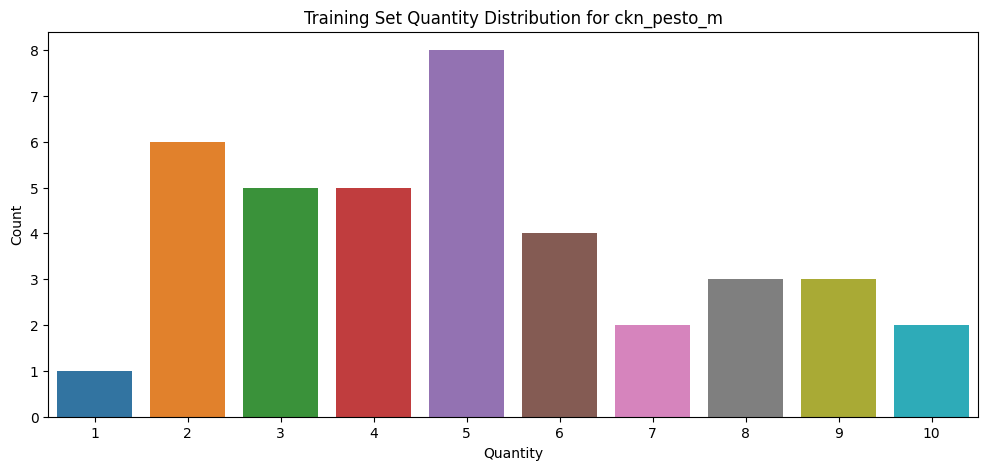

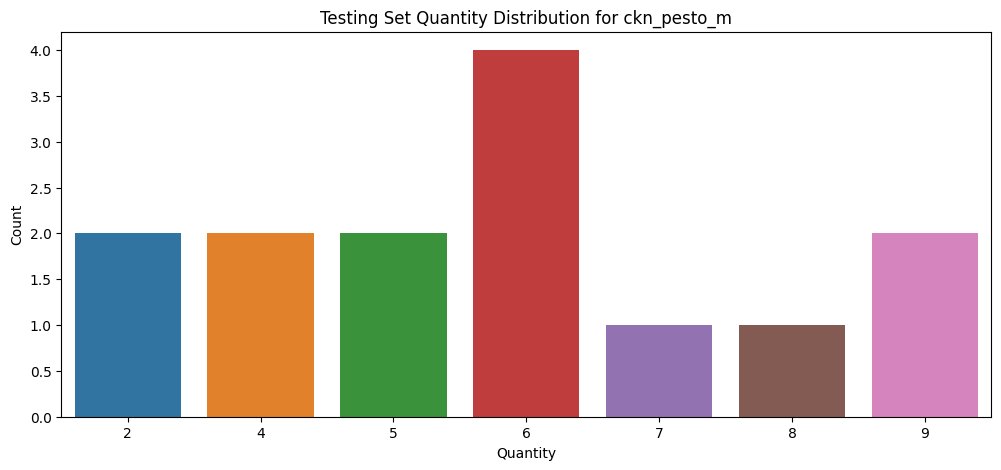

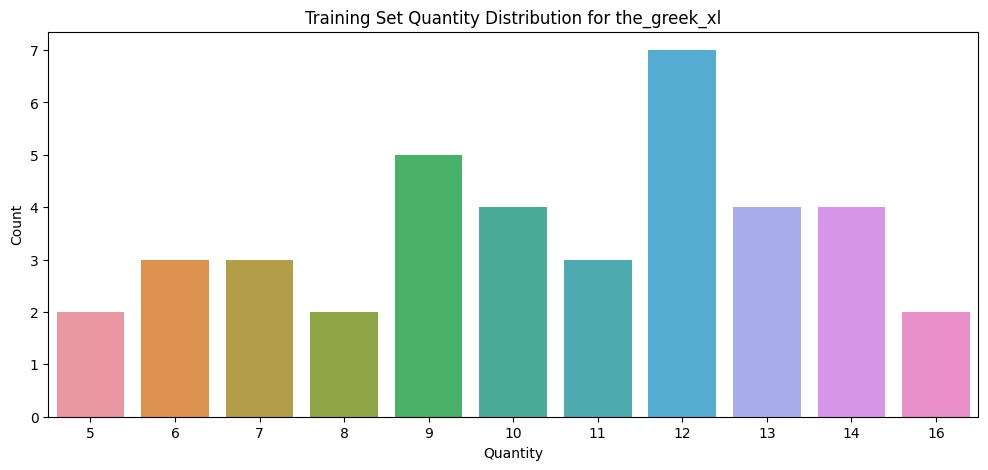

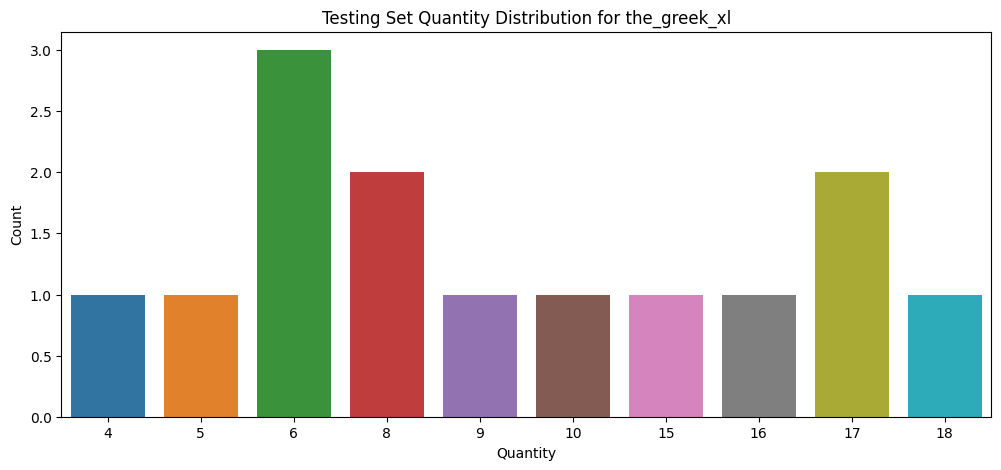

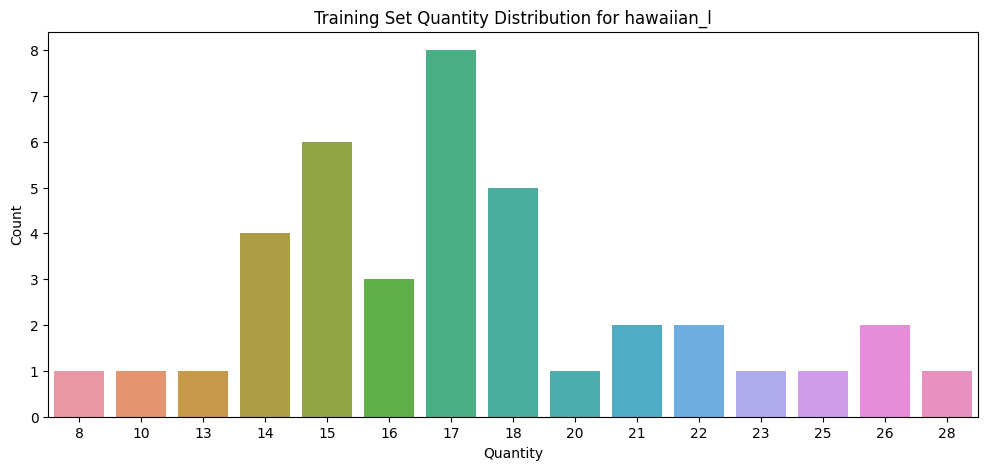

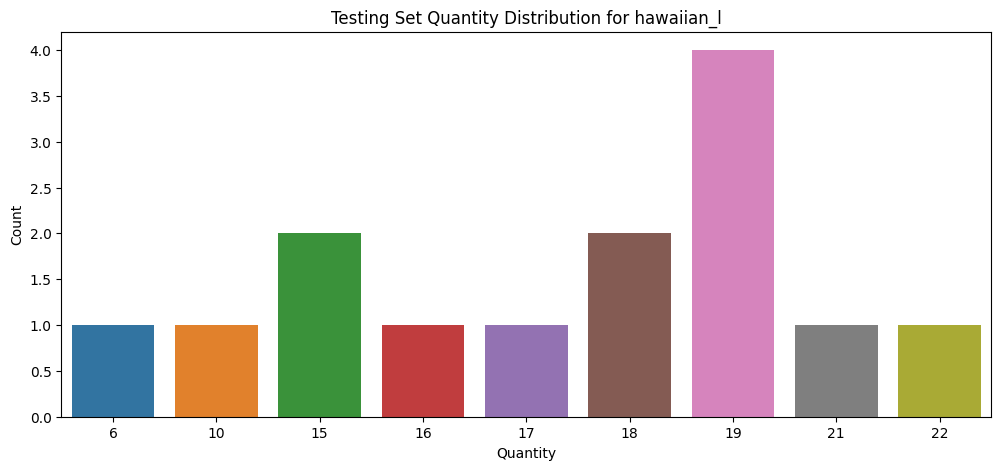

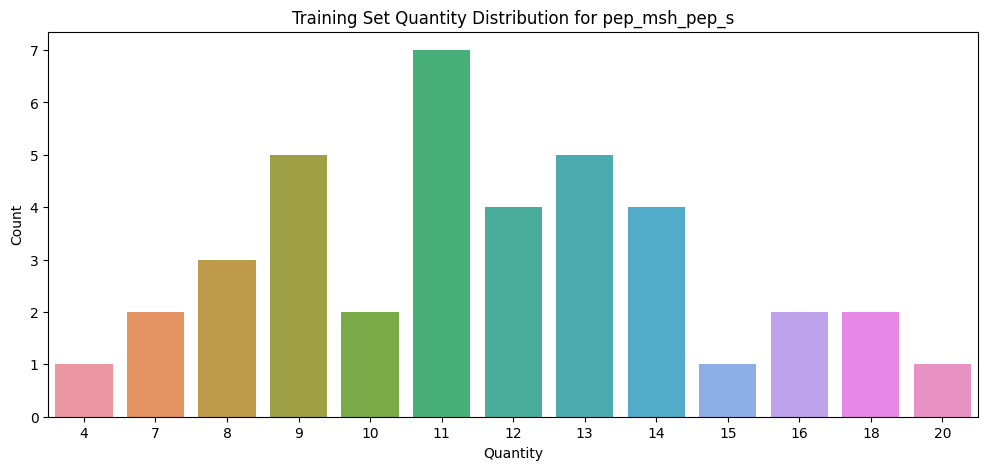

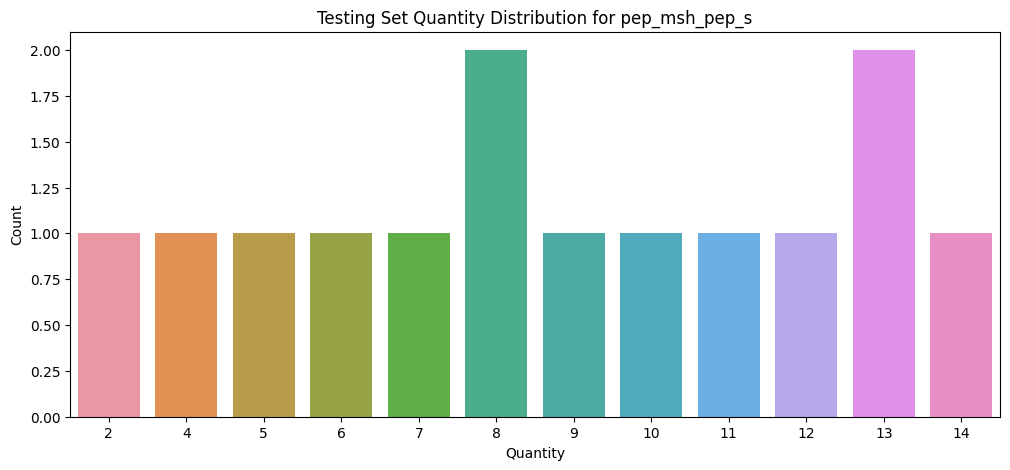

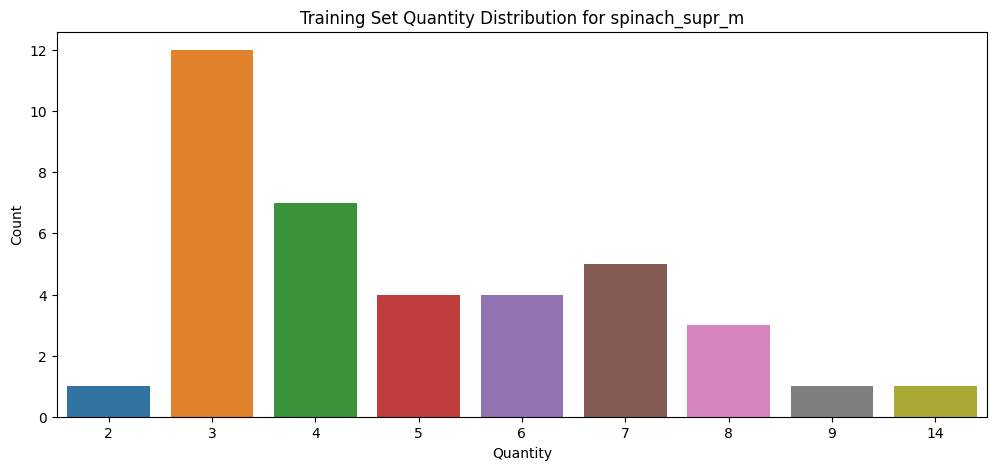

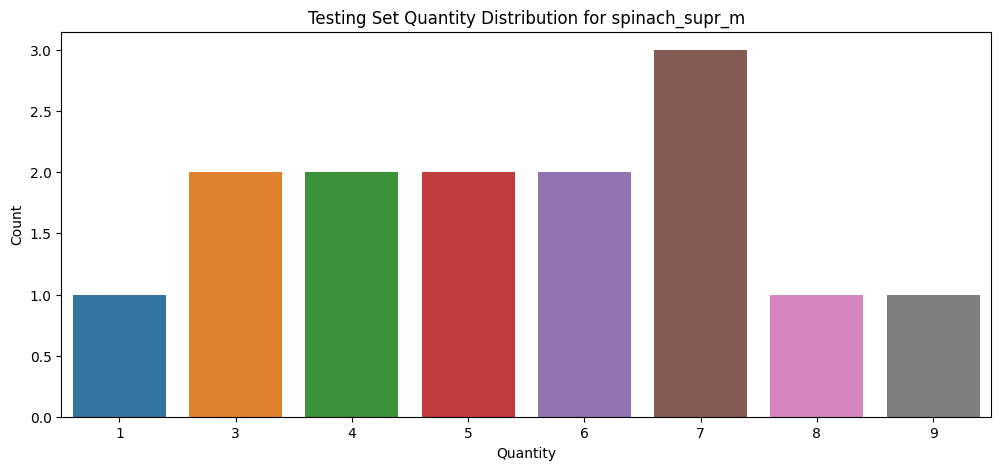

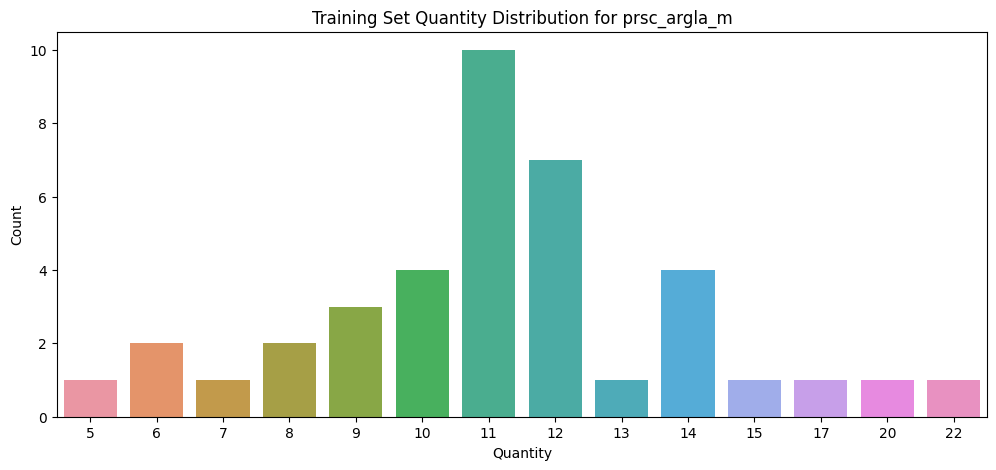

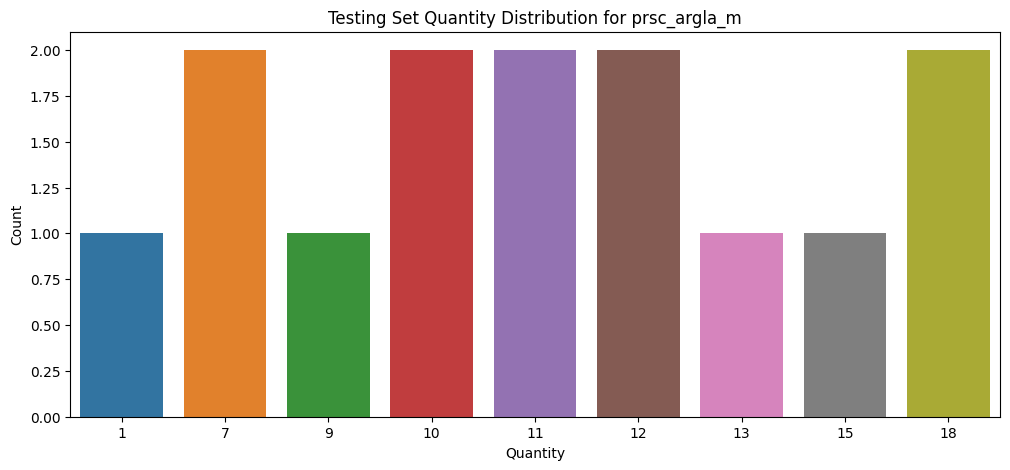

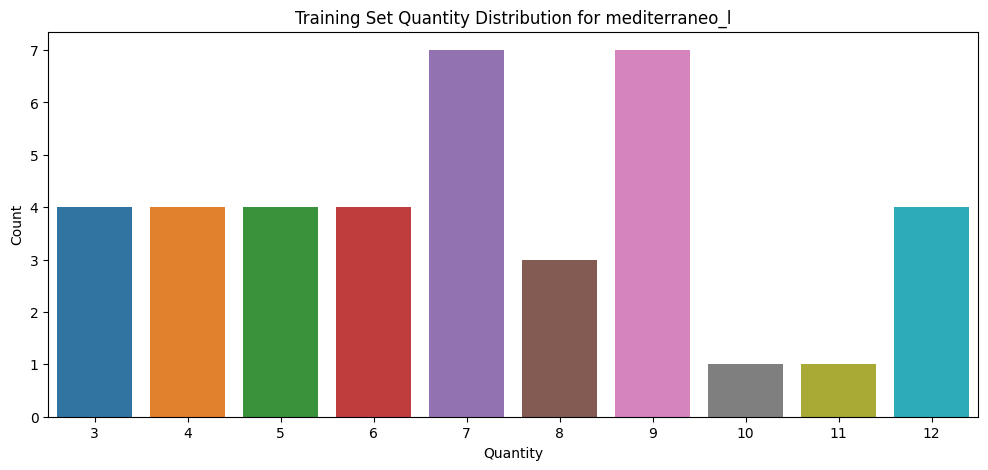

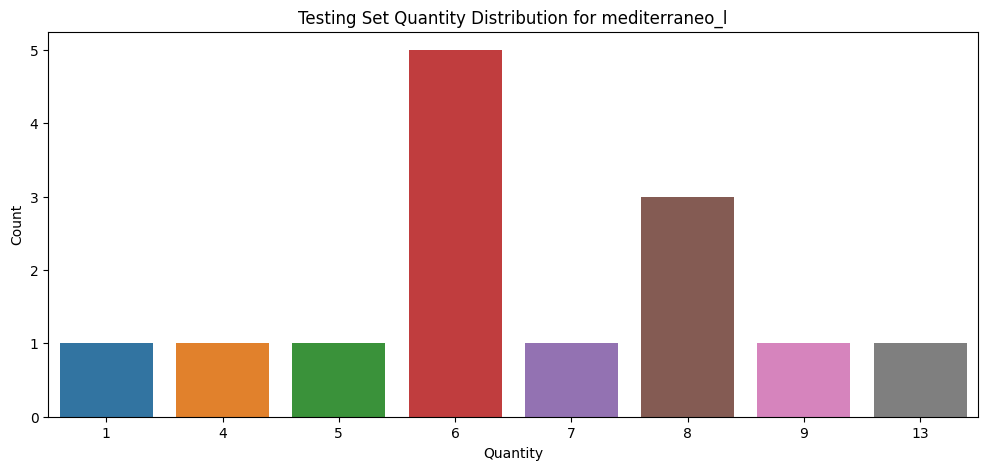

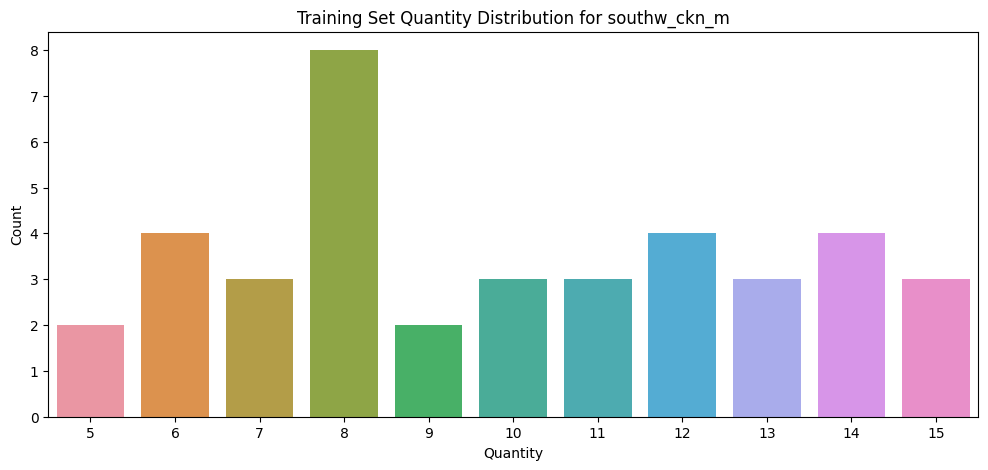

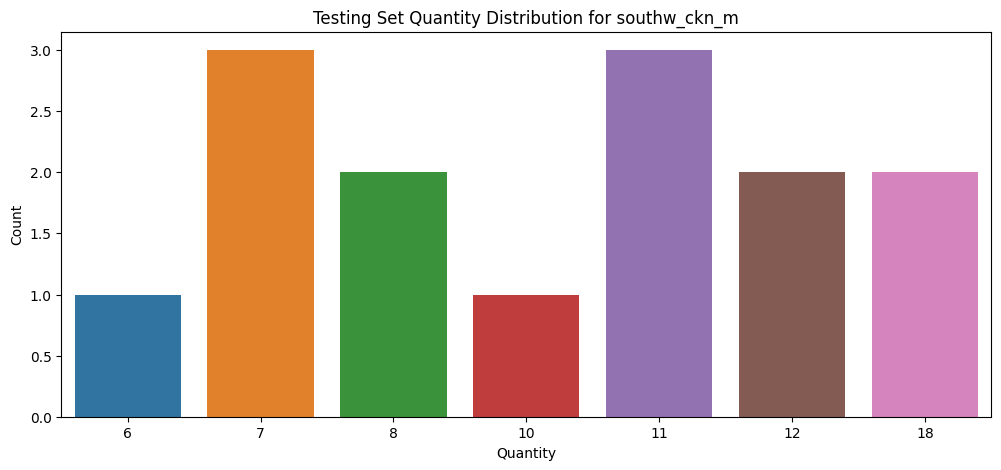

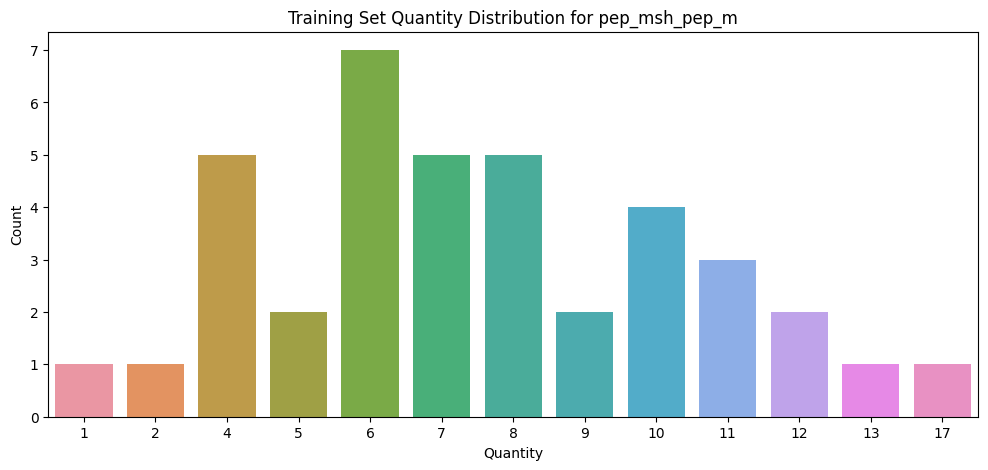

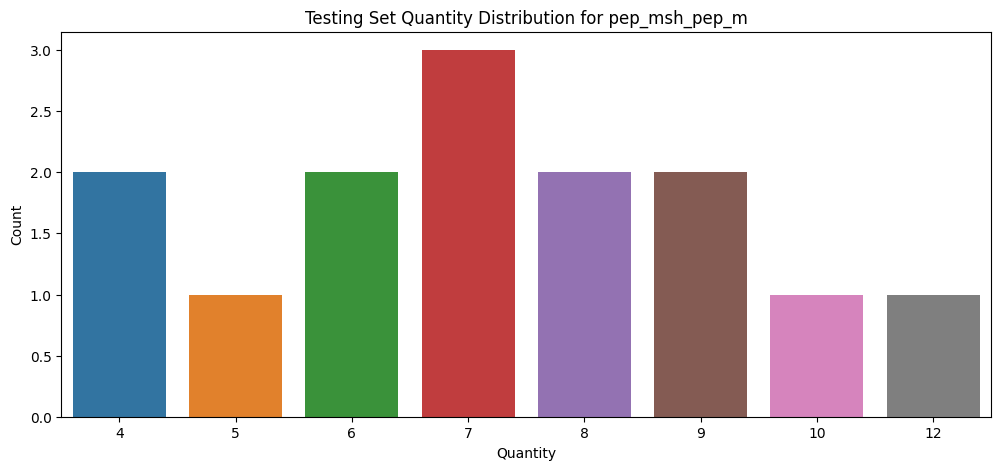

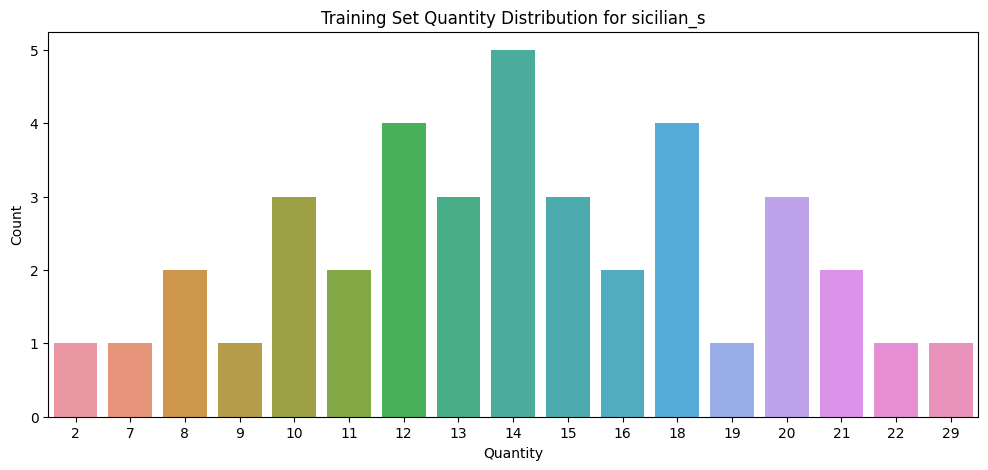

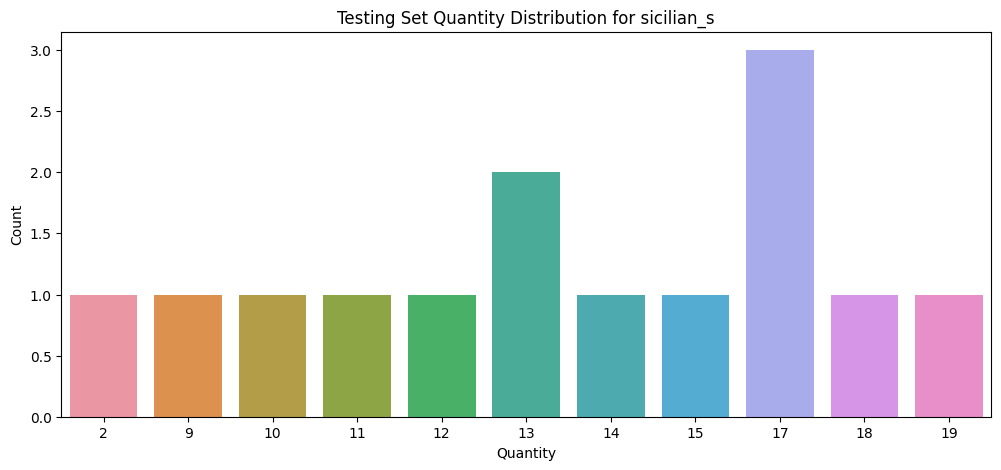

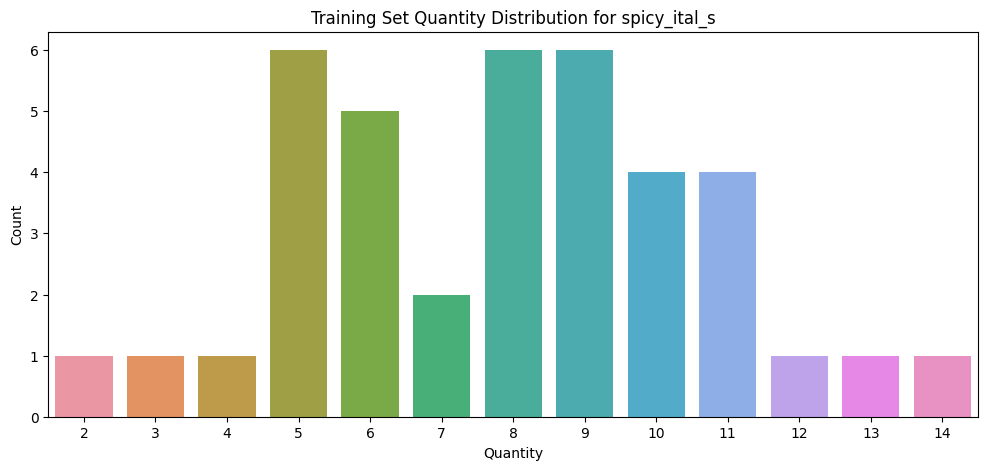

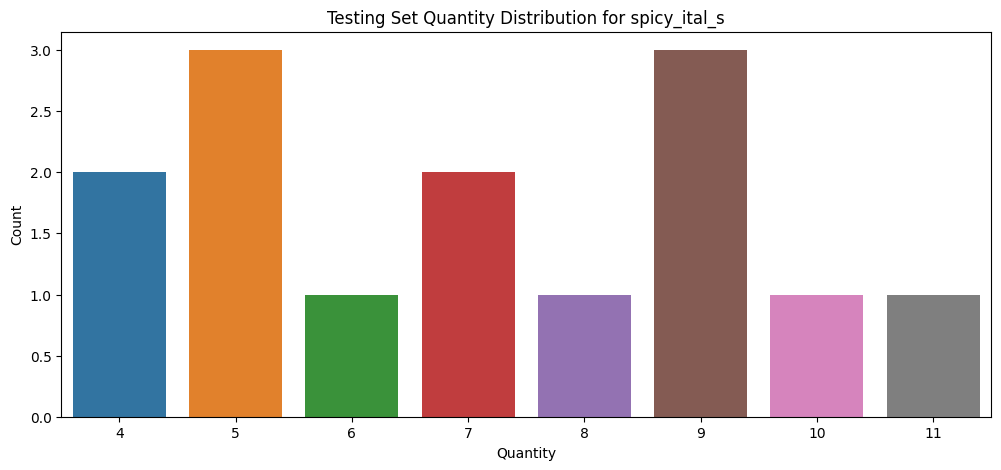

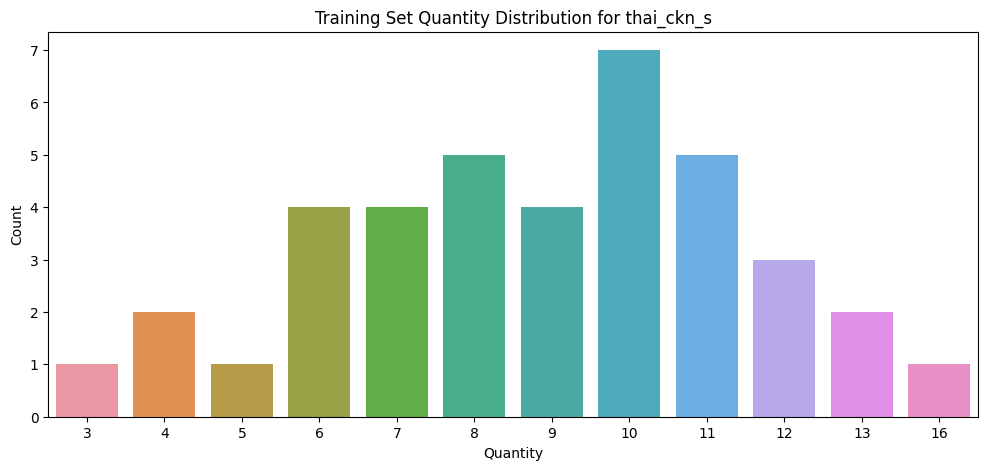

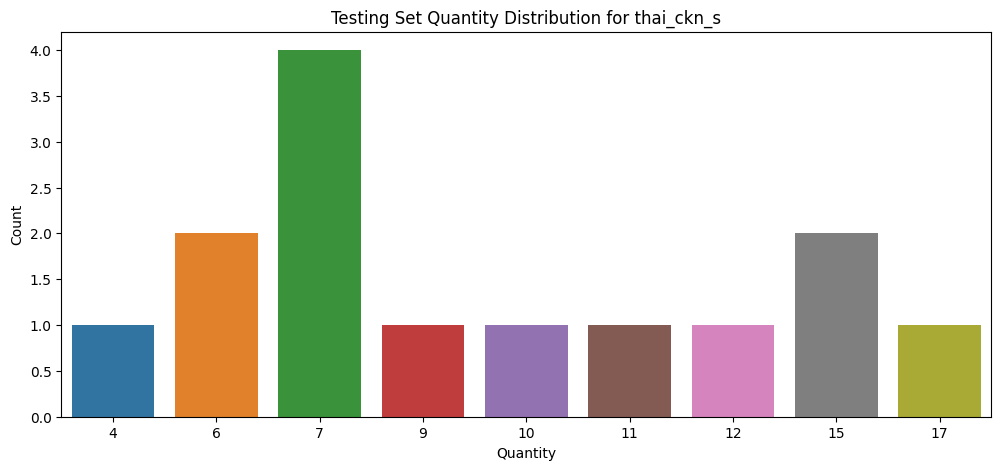

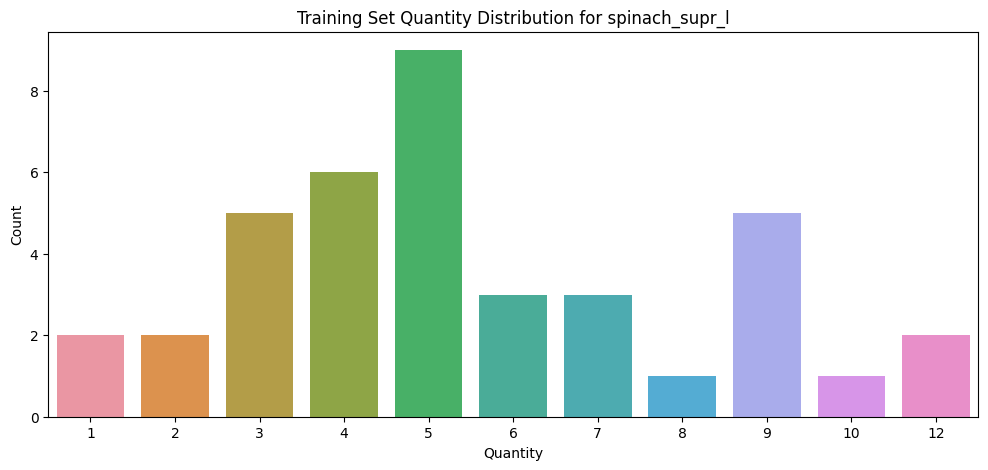

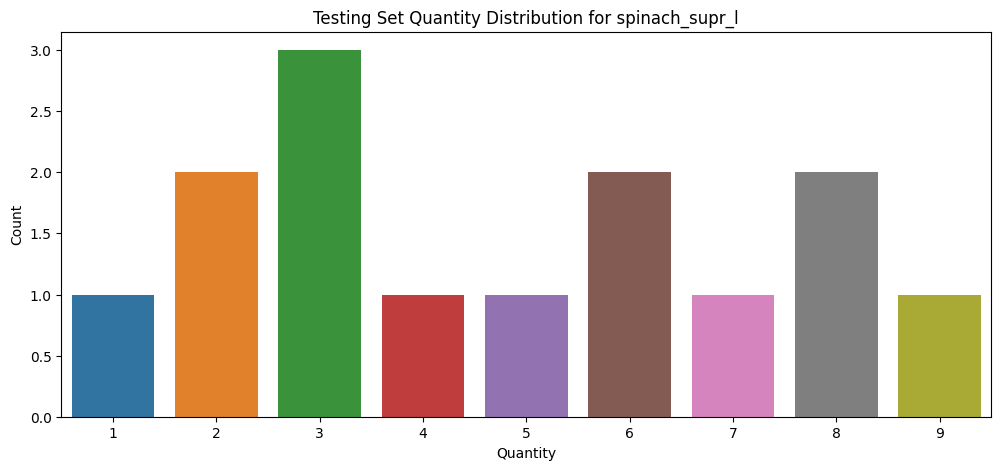

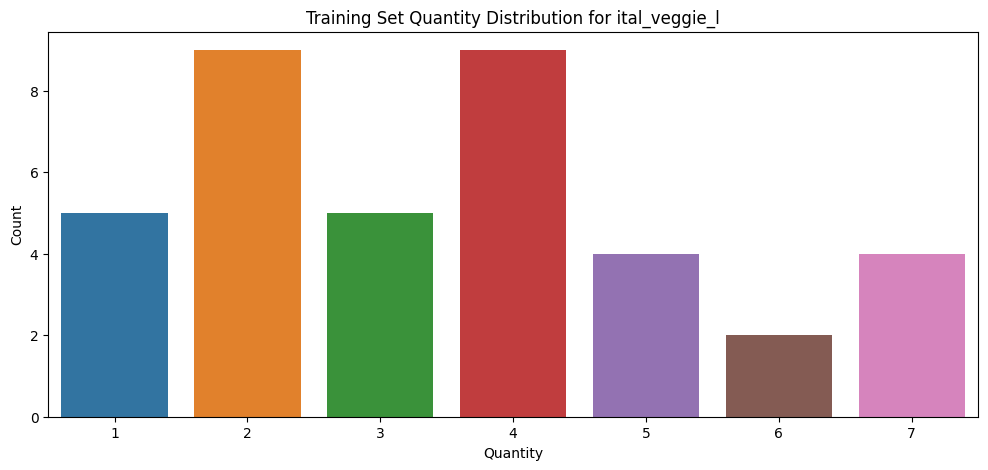

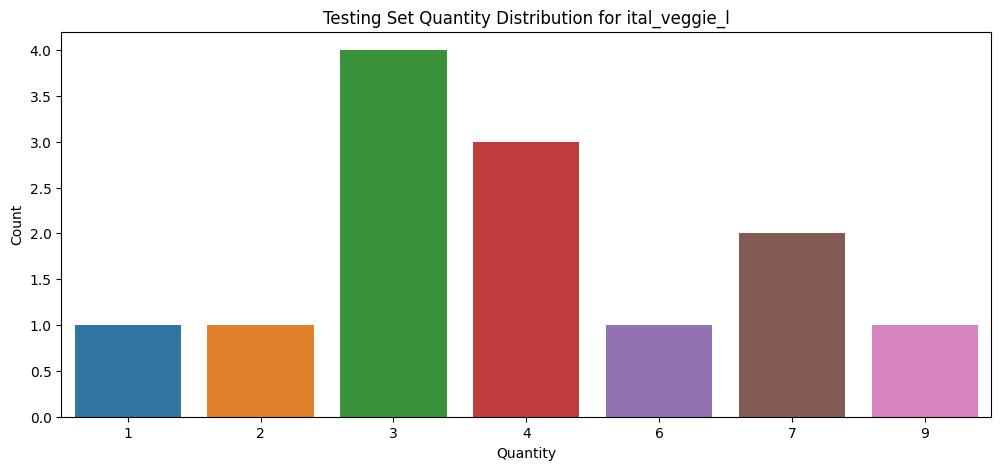

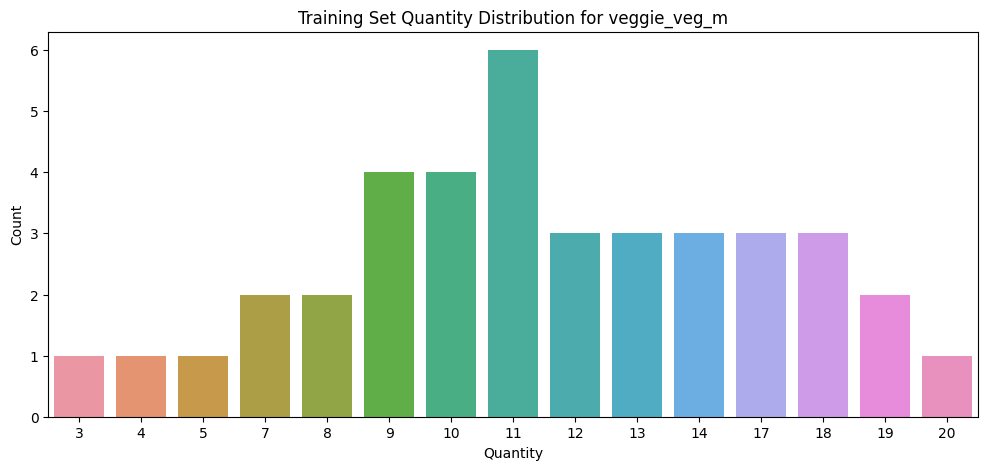

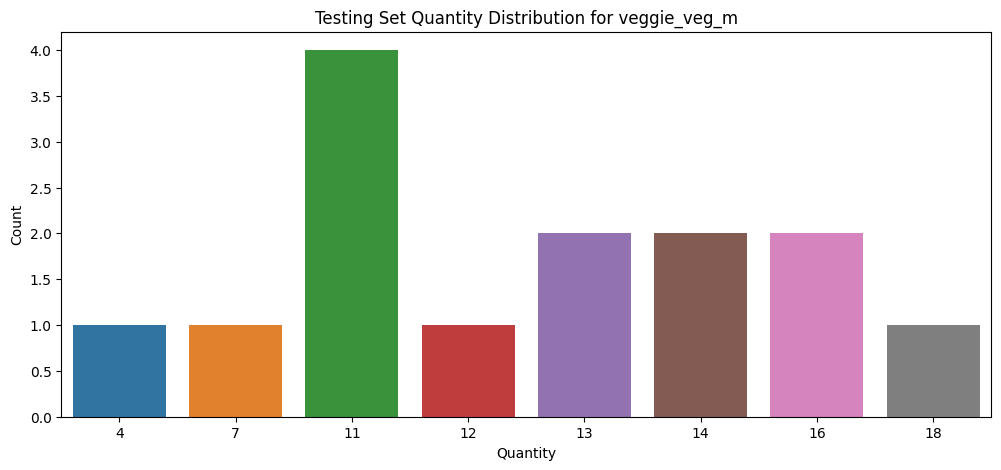

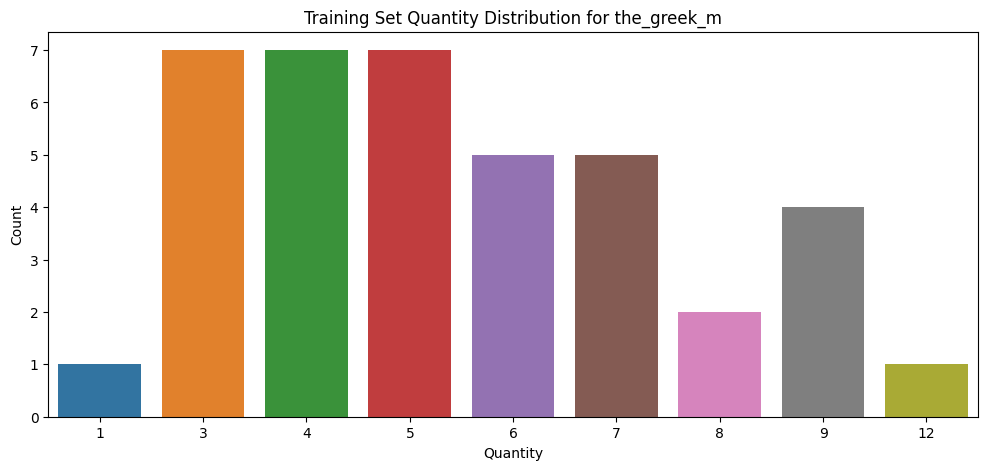

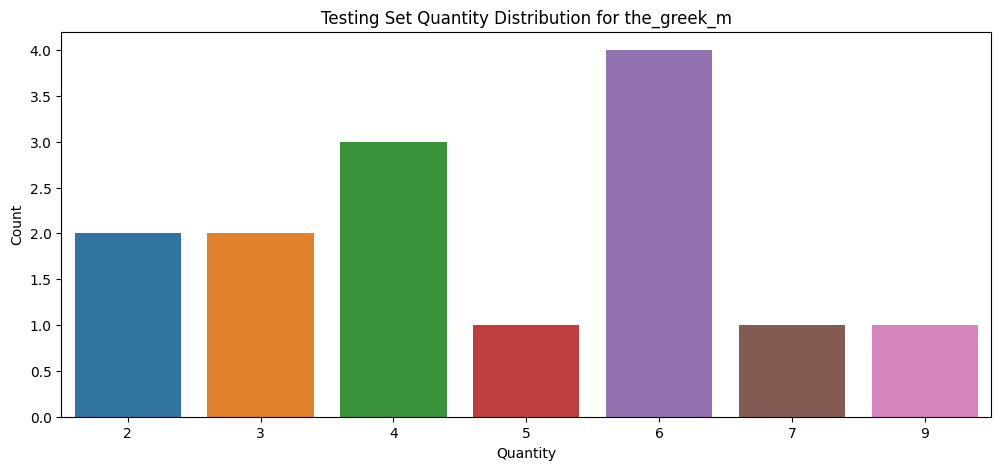

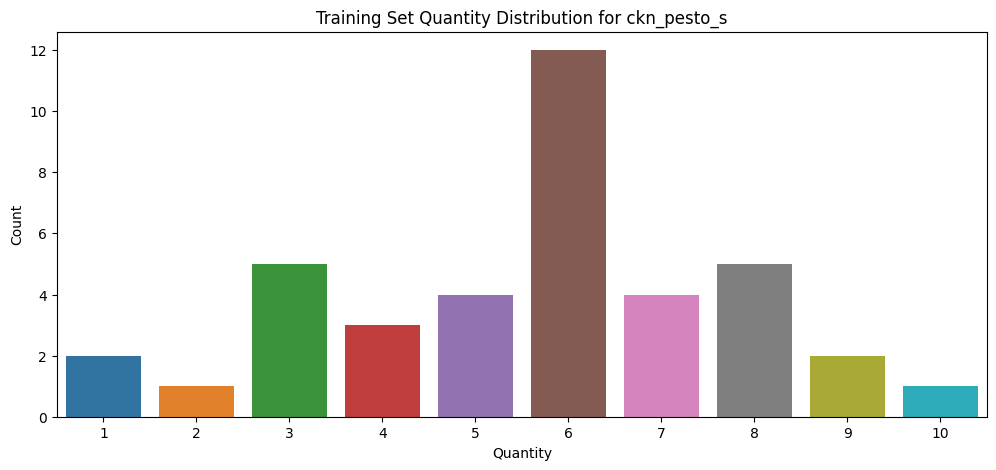

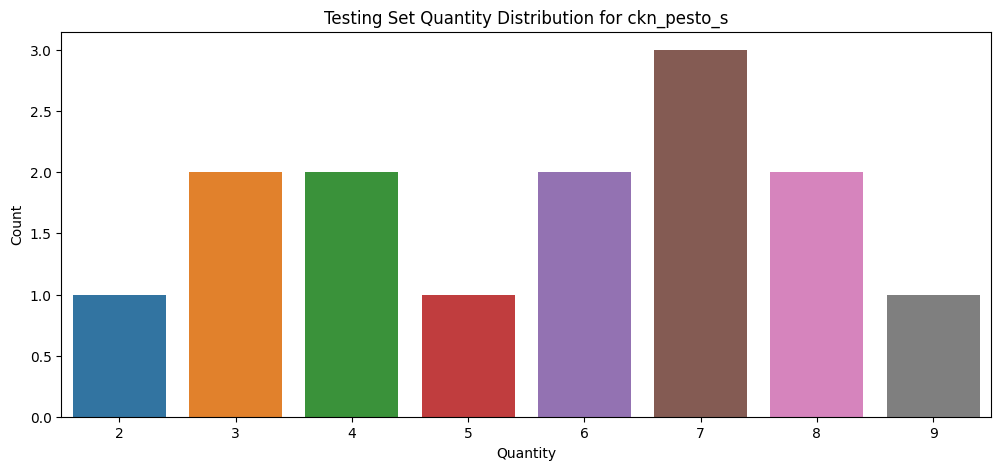

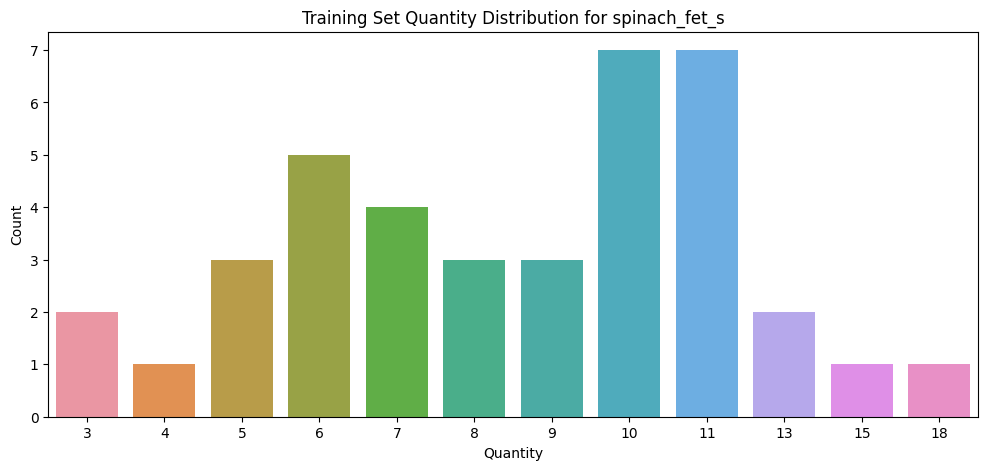

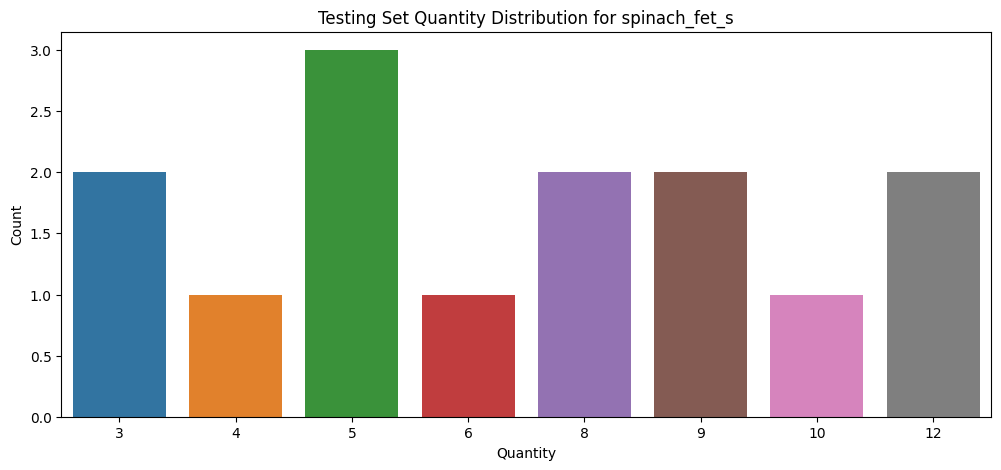

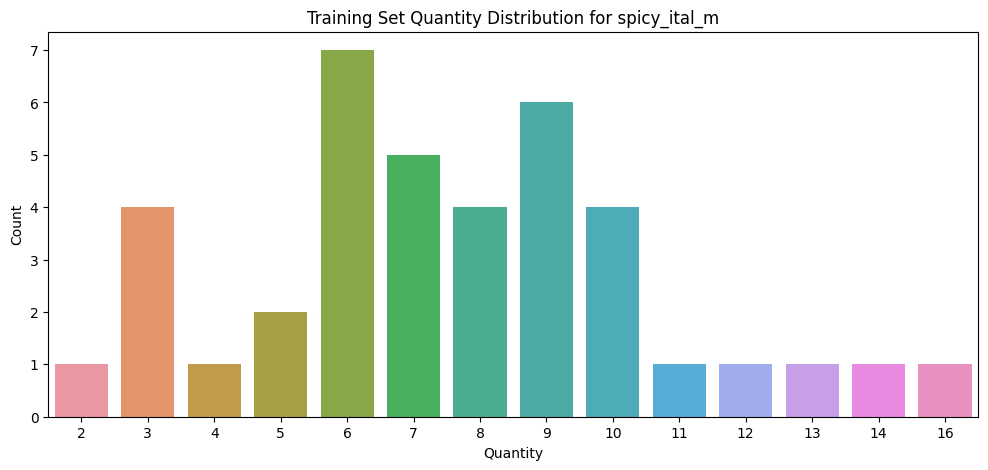

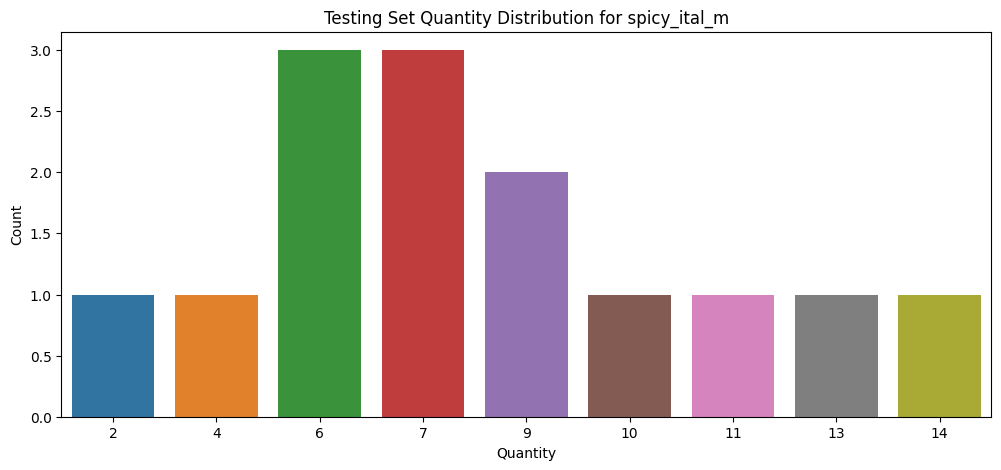

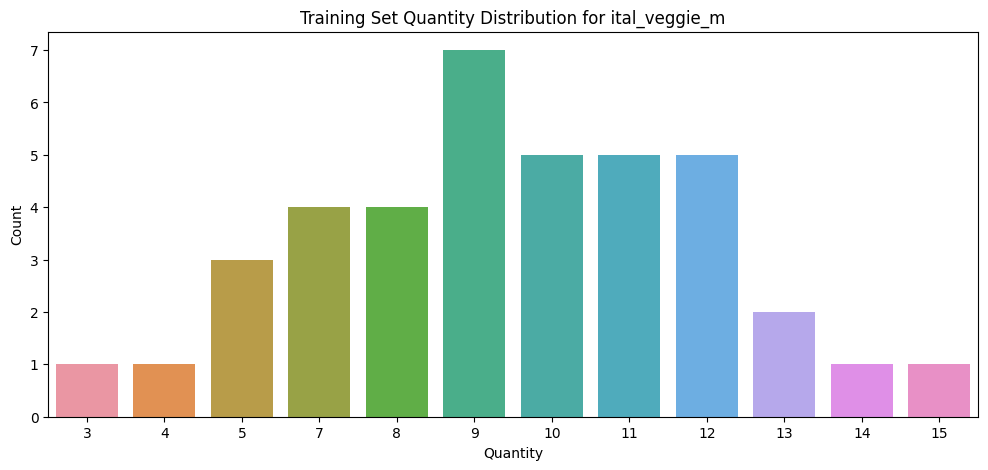

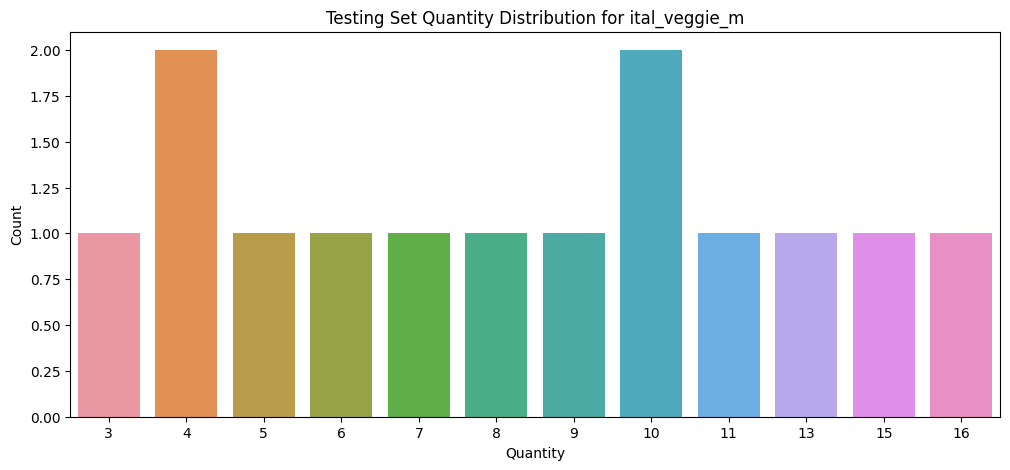

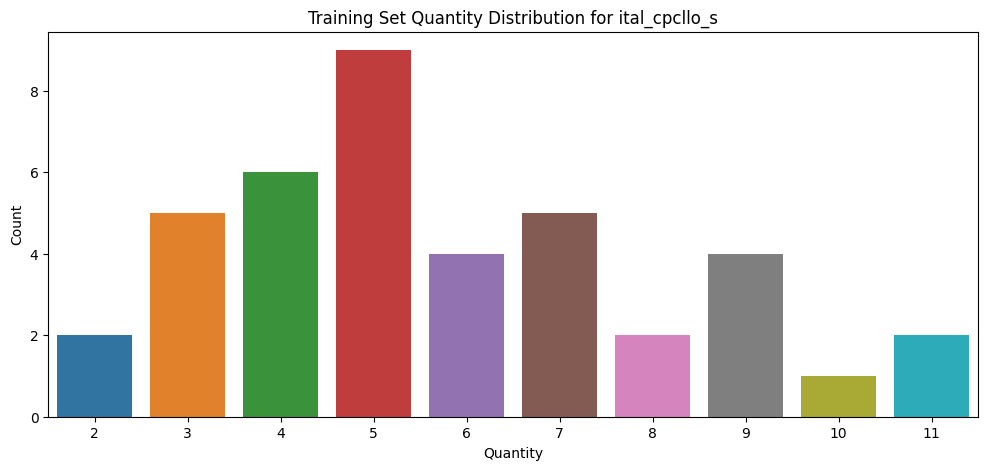

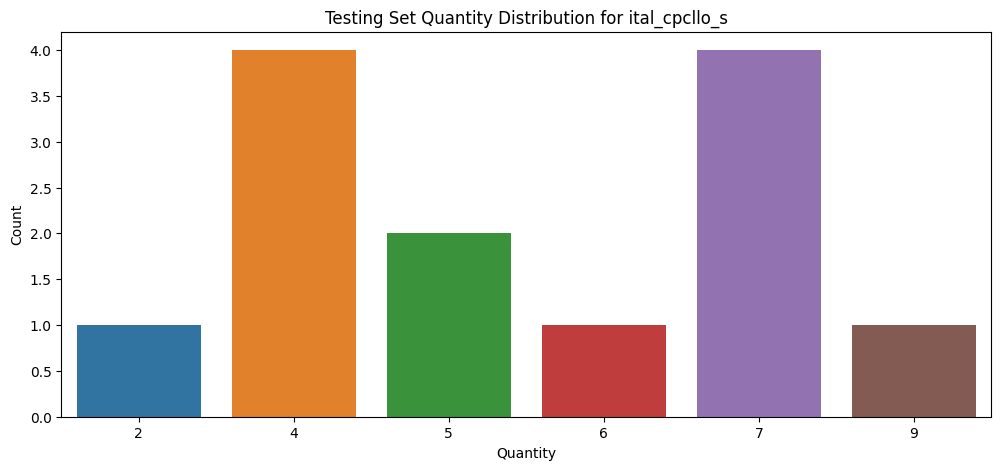

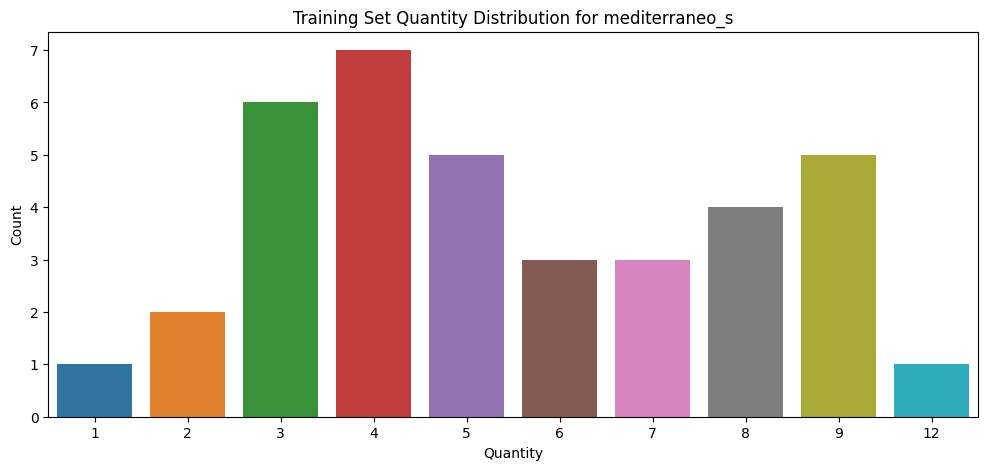

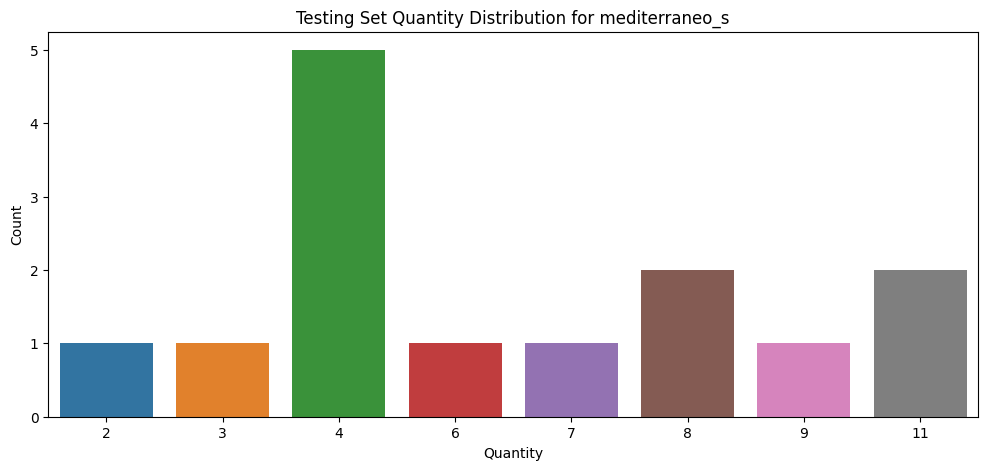

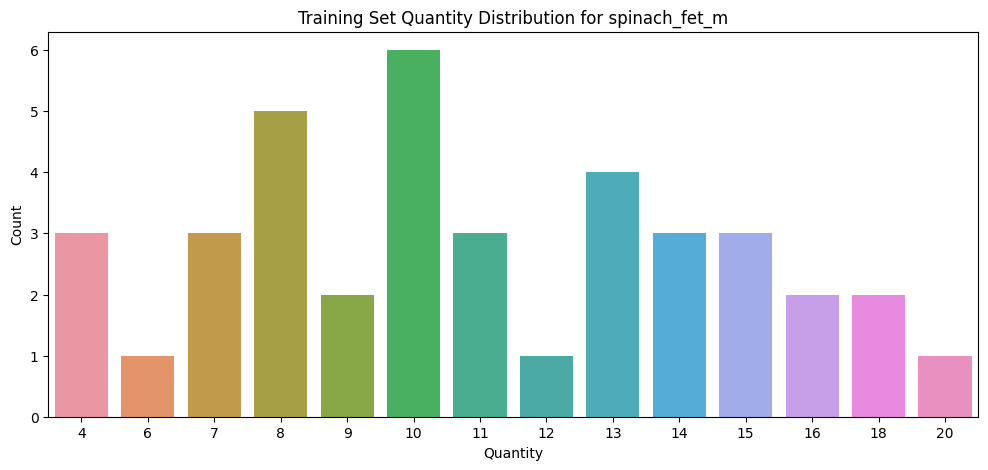

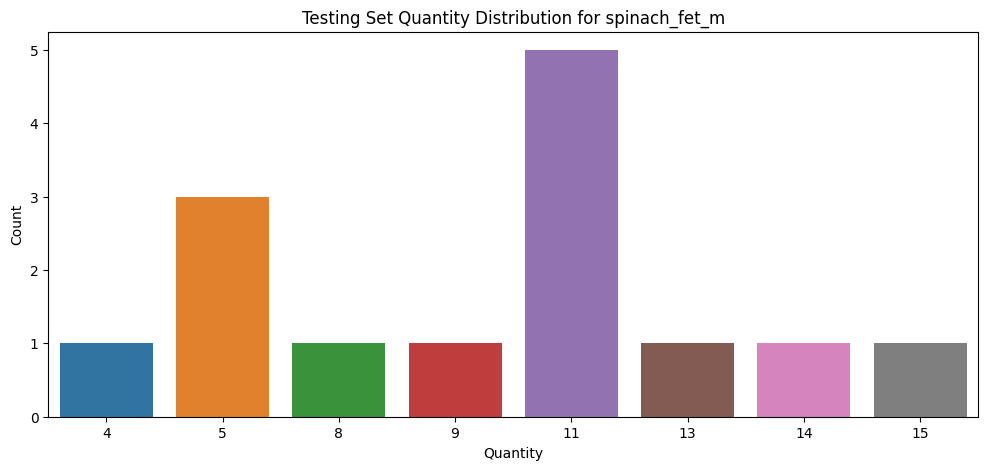

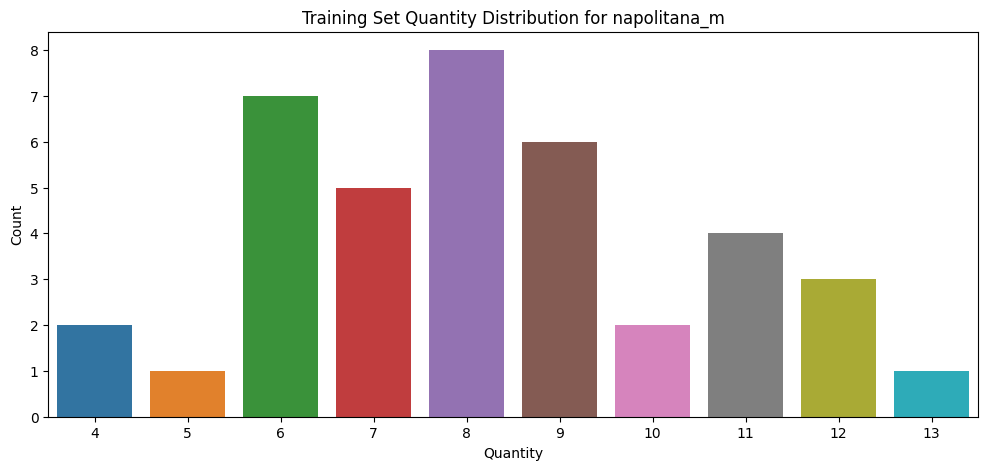

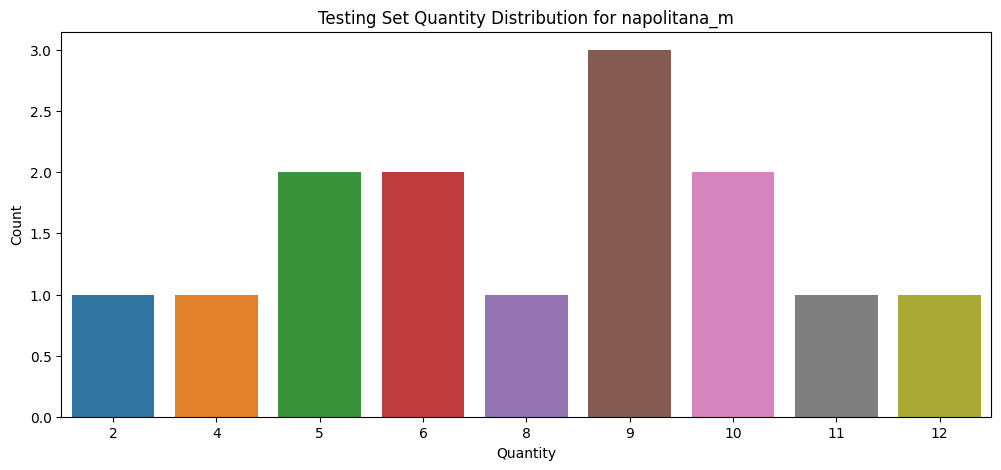

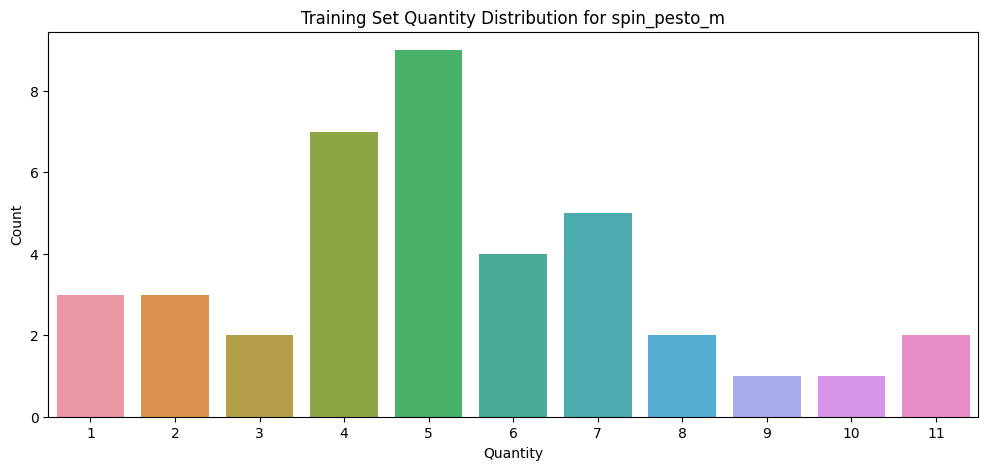

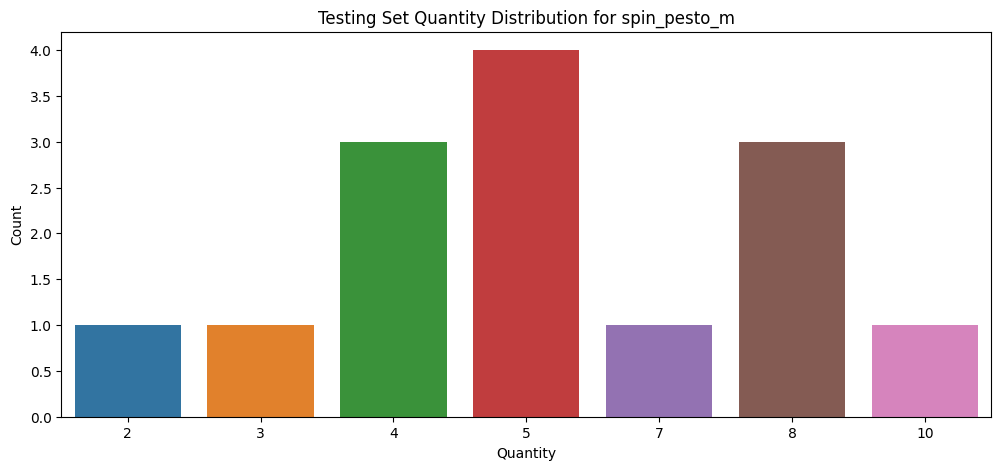

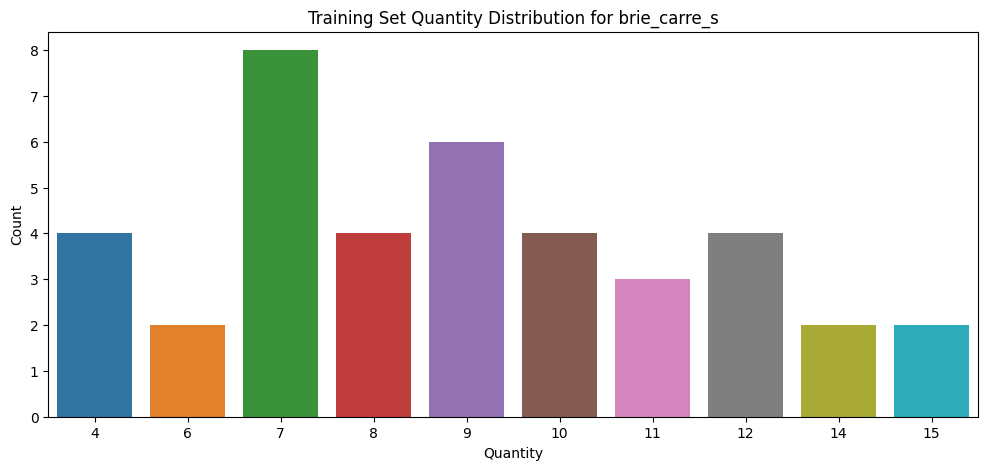

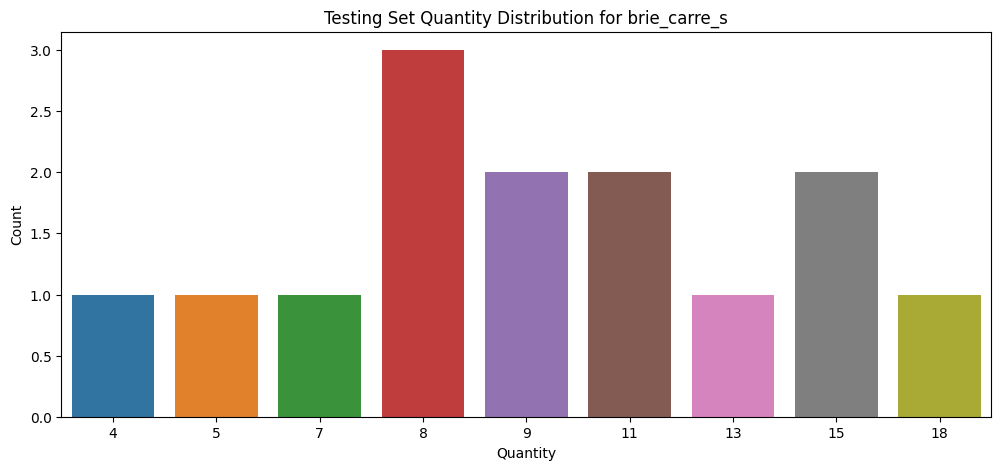

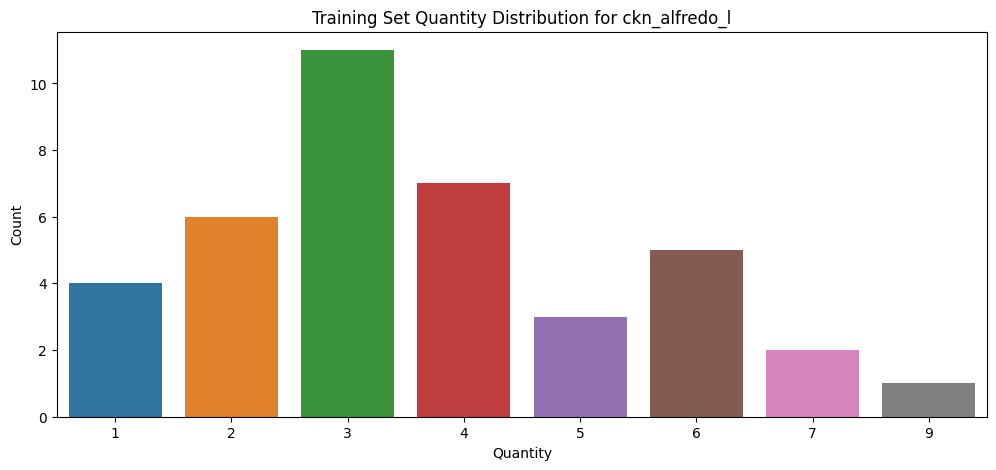

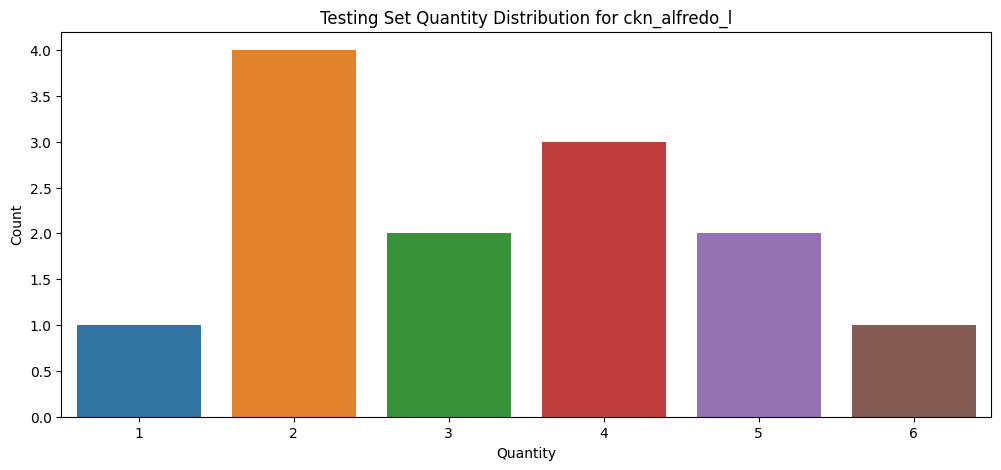

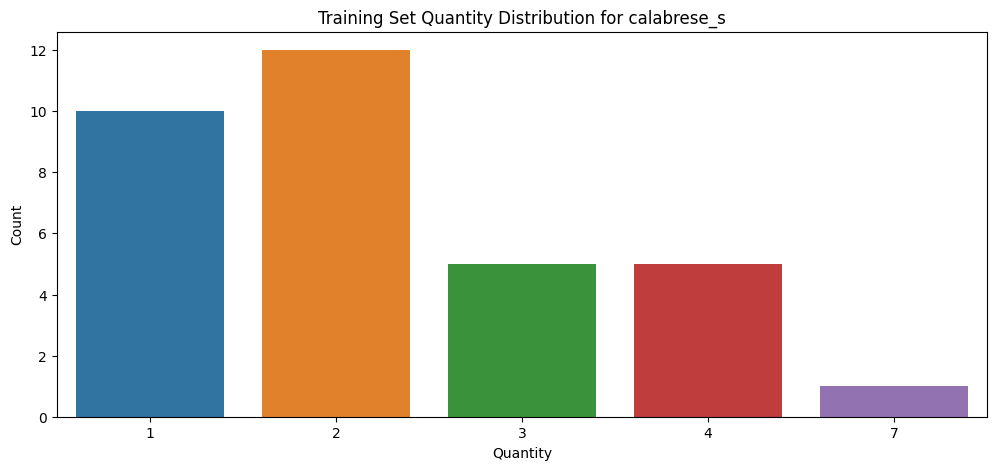

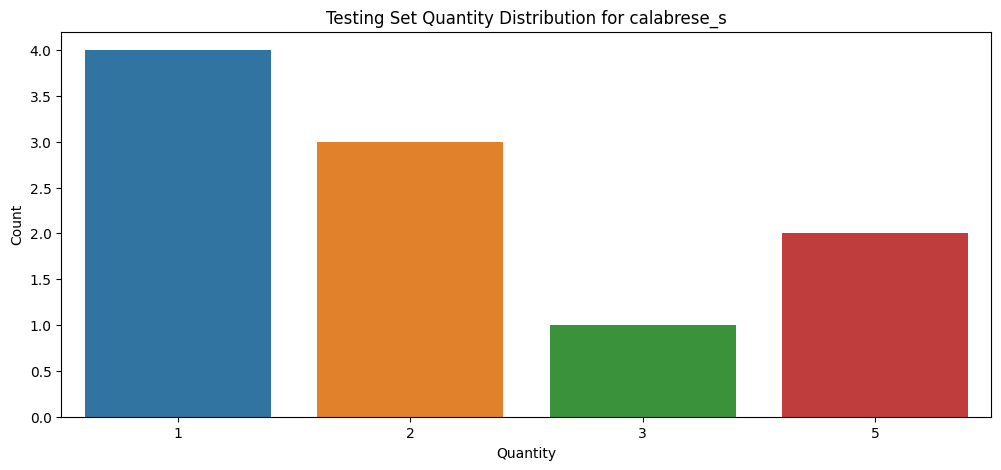

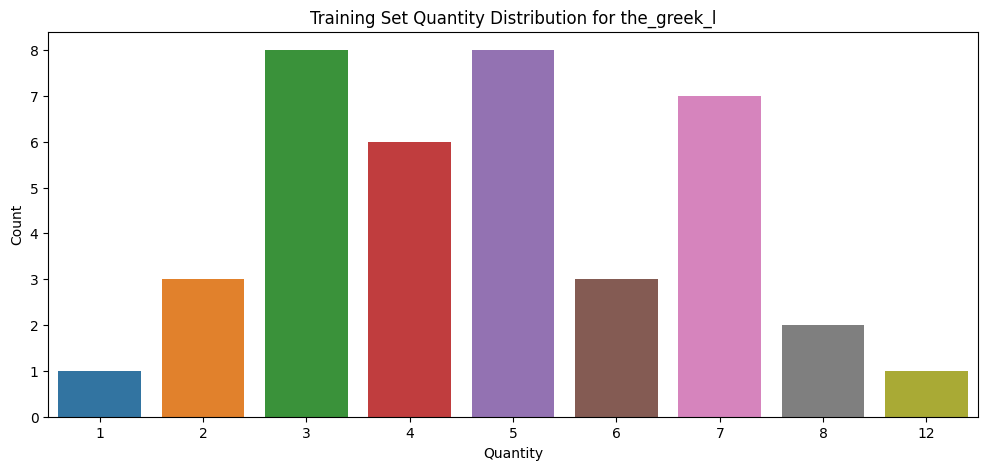

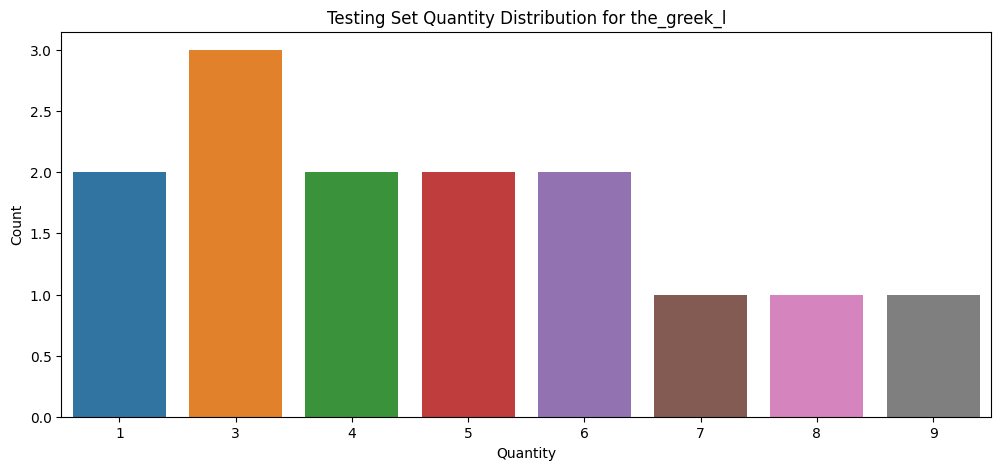

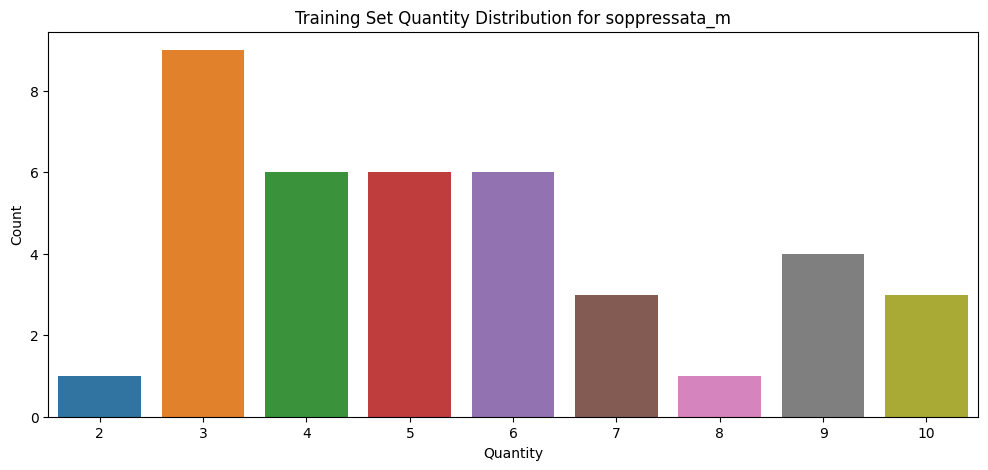

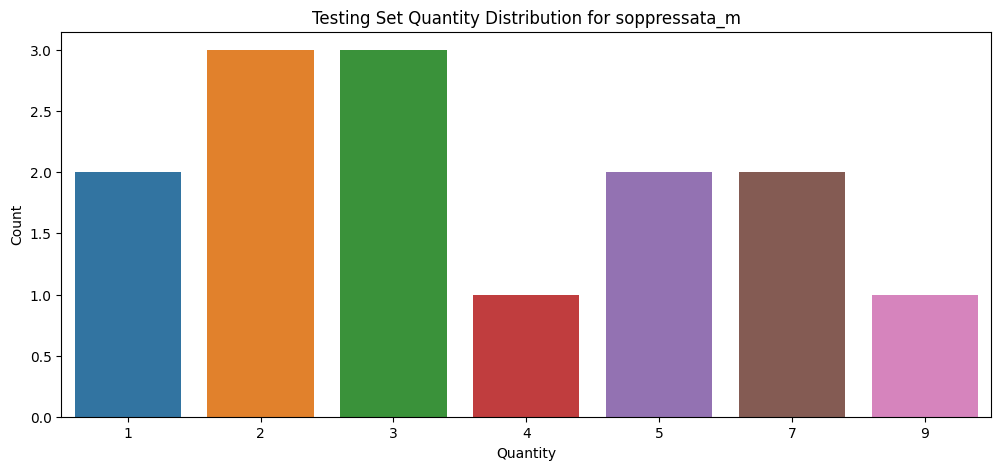

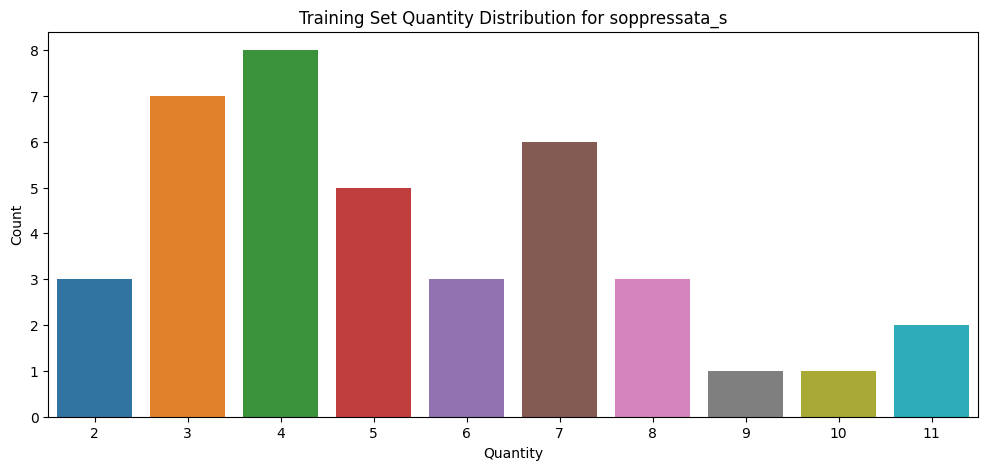

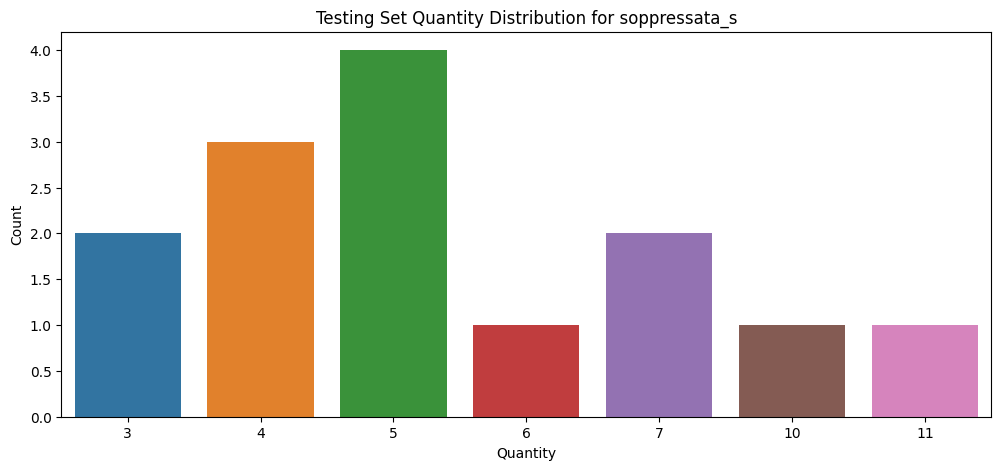

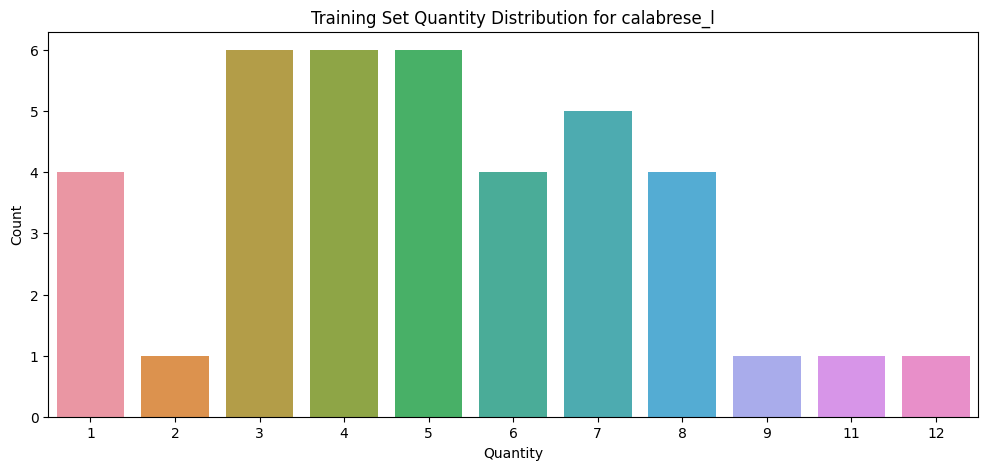

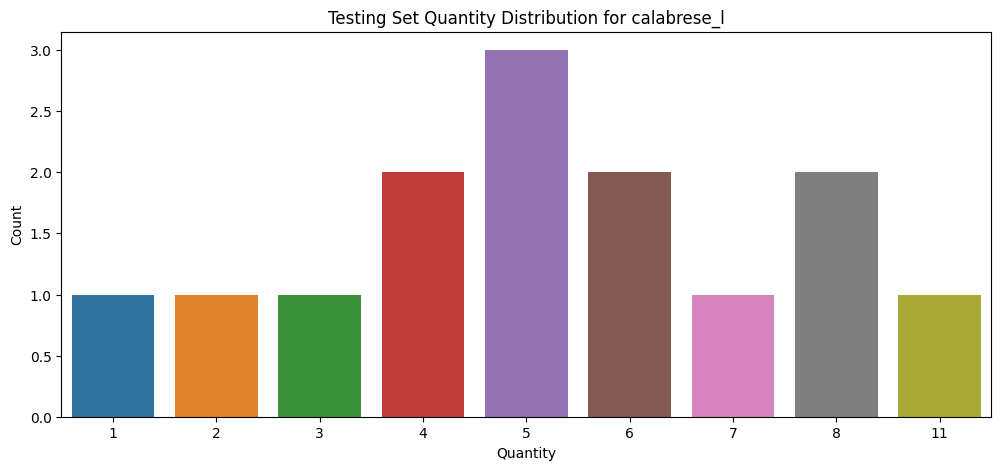

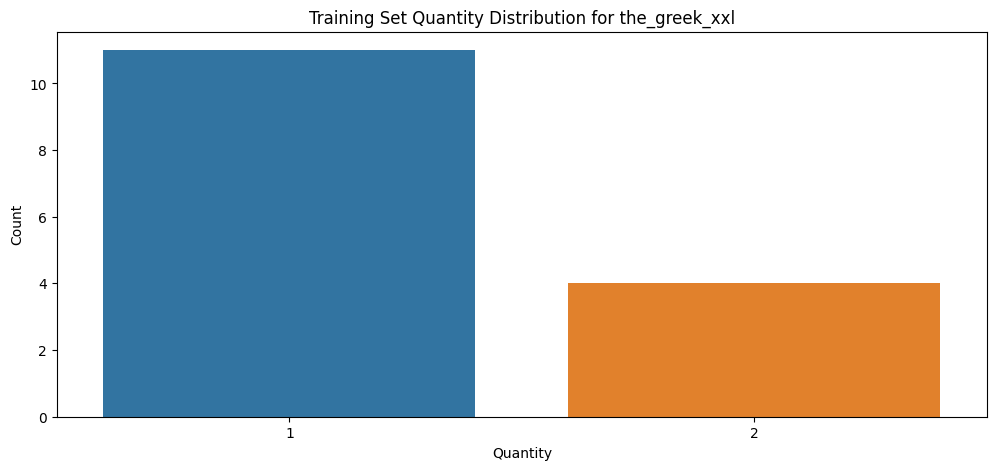

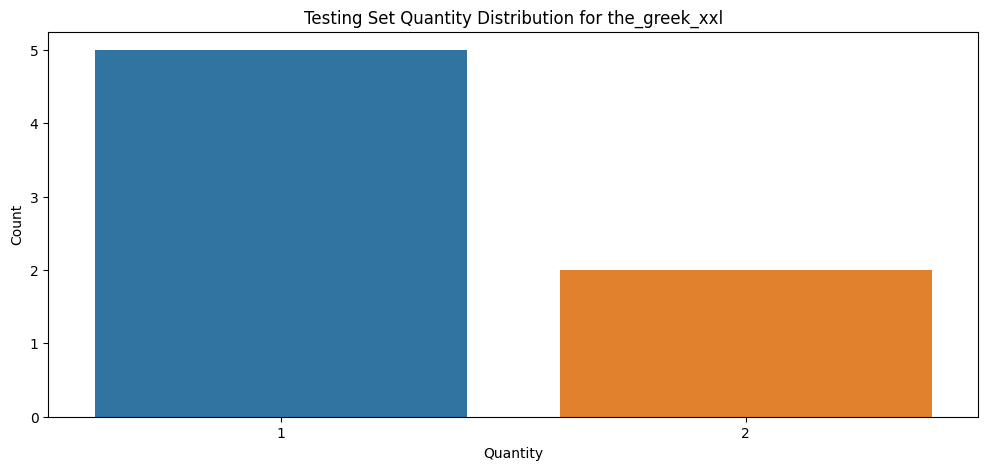

In [48]:
# checking foe class imbalance in quantity
import matplotlib.pyplot as plt
import seaborn as sns

def check_class_imbalance(train_data, test_data):
    for pizza_id, (train_X, train_y) in train_data.items():
        # Plotting for training set
        plt.figure(figsize=(12, 5))
        sns.countplot(x=train_y)
        plt.title(f'Training Set Quantity Distribution for {pizza_id}')
        plt.xlabel('Quantity')
        plt.ylabel('Count')
        plt.show()
        
        # Plotting for testing set
        plt.figure(figsize=(12, 5))
        sns.countplot(x=test_data[pizza_id][1])
        plt.title(f'Testing Set Quantity Distribution for {pizza_id}')
        plt.xlabel('Quantity')
        plt.ylabel('Count')
        plt.show()

# Run the function to check for class imbalance
check_class_imbalance(train_data, test_data)



## Model training

In [35]:
train_X.columns

Index(['weeks', 'pizza_id', 'order_id', 'pizza_name_id', 'unit_price',
       'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'pizza_name', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [40]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

# Assuming `grouped_pizza_dfs` is your dictionary of DataFrames for different pizza types
train_data = {}
test_data = {}

def split_train_test(df):
    X = df.drop(columns=['quantity'])  # All columns except 'quantity'
    y = df['quantity']                  # Target variable
    
    # Drop non-numeric columns
    X = X.select_dtypes(include=['number'])  # Keep only numeric columns
    
    train_X = X[X['month'] <= 9].copy()
    train_y = y[X['month'] <= 9].copy()
    test_X = X[X['month'] > 9].copy()
    test_y = y[X['month'] > 9].copy()
    
    return (train_X, train_y), (test_X, test_y)

# Dictionary to store MAPE results
results = {}

# Train and test model for each pizza type
for pizza_id, grouped_df in grouped_pizza_dfs.items():
    (train_X, train_y), (test_X, test_y) = split_train_test(grouped_df)
    train_data[pizza_id] = (train_X, train_y)
    test_data[pizza_id] = (test_X, test_y)

    # Set up the DMatrix for XGBoost
    dtrain = xgb.DMatrix(train_X, label=train_y)
    dtest = xgb.DMatrix(test_X, label=test_y)

    # Set model parameters (remove n_estimators)
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'max_depth': 6,
        'learning_rate': 0.1,
        'seed': 42
    }

    # Train the model with num_boost_round instead of n_estimators
    num_boost_round = 100
    model_xgb = xgb.train(params, dtrain, num_boost_round=num_boost_round)

    # Make predictions
    predictions = model_xgb.predict(dtest)

    

    # Calculate MAPE
    mape = mean_absolute_percentage_error(test_y, predictions)
    results[pizza_id] = mape

    # Print results for each pizza type
    print(f"MAPE for '{pizza_id}': {mape:.2f}")

# Optionally, display overall results
print("\nOverall MAPE Results:")
for pizza_id, mape in results.items():
    print(f"{pizza_id}: {mape:.2f}")


MAPE for 'hawaiian_m': 0.11
MAPE for 'classic_dlx_m': 0.02
MAPE for 'five_cheese_l': 0.09
MAPE for 'ital_supr_l': 0.02
MAPE for 'mexicana_m': 0.16
MAPE for 'thai_ckn_l': 0.10
MAPE for 'ital_supr_m': 0.05
MAPE for 'prsc_argla_l': 0.04
MAPE for 'bbq_ckn_s': 0.04
MAPE for 'the_greek_s': 0.03
MAPE for 'spinach_supr_s': 0.11
MAPE for 'classic_dlx_s': 0.02
MAPE for 'green_garden_s': 0.04
MAPE for 'ital_cpcllo_l': 0.16
MAPE for 'ital_supr_s': 0.00
MAPE for 'mexicana_s': 0.01
MAPE for 'spicy_ital_l': 0.11
MAPE for 'spin_pesto_l': 0.00
MAPE for 'veggie_veg_s': 0.37
MAPE for 'mexicana_l': 0.06
MAPE for 'southw_ckn_l': 0.03
MAPE for 'bbq_ckn_l': 0.06
MAPE for 'cali_ckn_l': 0.09
MAPE for 'cali_ckn_m': 0.05
MAPE for 'pepperoni_l': 0.01
MAPE for 'cali_ckn_s': 0.05
MAPE for 'ckn_pesto_l': 0.16
MAPE for 'big_meat_s': 0.06
MAPE for 'soppressata_l': 0.18
MAPE for 'four_cheese_l': 0.07
MAPE for 'napolitana_s': 0.01
MAPE for 'calabrese_m': 0.11
MAPE for 'four_cheese_m': 0.05
MAPE for 'ital_veggie_s': 0.04

In [39]:
train_X.columns

Index(['pizza_id', 'order_id', 'unit_price', 'total_price', 'year', 'month',
       'day', 'day_of_week'],
      dtype='object')

In [42]:
# Assuming `grouped_pizza_dfs` is your dictionary of DataFrames for different pizza types

def count_models(grouped_data):
    # Count the number of unique pizza types (models)
    model_count = len(grouped_data)
    return model_count

# Get the count of models created
total_models = count_models(grouped_pizza_dfs)

# Print the total number of models created
print(f"Total models created: {total_models}")


Total models created: 91


In [41]:
# import pandas as pd
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_percentage_error

# # Function to preprocess the DataFrame
# def preprocess_data(df):
#     # Drop or convert datetime columns
#     if 'weeks' in df.columns:
#         df['weeks'] = pd.to_datetime(df['weeks'])  # Ensure it's in datetime format
#         # Optionally extract features (e.g., week number, month)
#         df['week_number'] = df['weeks'].dt.isocalendar().week
#         df['month'] = df['weeks'].dt.month
#         df.drop(columns=['weeks'], inplace=True)  # Drop original datetime column

#     # Convert categorical columns to category type
#     categorical_cols = ['pizza_name_id', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']
#     for col in categorical_cols:
#         df[col] = df[col].astype('category')
    
#     return df

# # Function to calculate MAPE
# def calculate_mape(y_true, y_pred):
#     return mean_absolute_percentage_error(y_true, y_pred) * 100

# # Dictionary to hold the trained models
# pizza_models = {}
# pizza_predictions = {}

# # Iterate through each pizza type to train the model
# for pizza_id, (train_X, train_y) in train_data.items():
#     # Preprocess training data
#     train_X = preprocess_data(train_X)

#     # Convert data to DMatrix with categorical support
#     dtrain = xgb.DMatrix(train_X, label=train_y, enable_categorical=True)

#     # Set up the parameters for the model
#     params = {
#         'objective': 'reg:squarederror',
#         'max_depth': 5,
#         'eta': 0.1
#     }

#     # Train the model
#     model_xgb = xgb.train(params, dtrain, num_boost_round=100)

#     # Save the model
#     pizza_models[pizza_id] = model_xgb

#     # Preprocess test data
#     test_X, test_y = test_data[pizza_id]
#     test_X = preprocess_data(test_X)
#     dtest = xgb.DMatrix(test_X, enable_categorical=True)

#     # Make predictions
#     predictions = model_xgb.predict(dtest)
#     pizza_predictions[pizza_id] = predictions
    
#     # Calculate MAPE on test set
#     mape = calculate_mape(test_y, predictions)
#     print(f"MAPE for '{pizza_id}': {mape:.2f}%")

# # Now you have a trained model for each pizza type in pizza_models


In [51]:
## ARIMA Model
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")


def train_arima(train_X, train_y):
    model = ARIMA(train_y, order=(1, 1, 1))  # Example order
    model_fit = model.fit()
    return model_fit

def evaluate_arima(model, test_X, test_y):
    predictions = model.forecast(steps=len(test_y))
    mape = mean_absolute_percentage_error(test_y, predictions)
    return mape

# Example usage
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    
    model_arima = train_arima(train_X, train_y)
    mape = evaluate_arima(model_arima, test_X, test_y)
    print(f"ARIMA MAPE for '{pizza_id}': {mape:.2f}%")


ARIMA MAPE for 'hawaiian_m': 0.56%
ARIMA MAPE for 'classic_dlx_m': 0.16%
ARIMA MAPE for 'five_cheese_l': 0.31%
ARIMA MAPE for 'ital_supr_l': 0.38%
ARIMA MAPE for 'mexicana_m': 0.36%
ARIMA MAPE for 'thai_ckn_l': 0.30%
ARIMA MAPE for 'ital_supr_m': 0.35%
ARIMA MAPE for 'prsc_argla_l': 0.39%
ARIMA MAPE for 'bbq_ckn_s': 0.28%
ARIMA MAPE for 'the_greek_s': 0.57%
ARIMA MAPE for 'spinach_supr_s': 1.23%
ARIMA MAPE for 'classic_dlx_s': 0.24%
ARIMA MAPE for 'green_garden_s': 0.36%
ARIMA MAPE for 'ital_cpcllo_l': 0.58%
ARIMA MAPE for 'ital_supr_s': 0.85%
ARIMA MAPE for 'mexicana_s': 0.43%
ARIMA MAPE for 'spicy_ital_l': 0.32%
ARIMA MAPE for 'spin_pesto_l': 0.49%
ARIMA MAPE for 'veggie_veg_s': 0.27%
ARIMA MAPE for 'mexicana_l': 0.32%
ARIMA MAPE for 'southw_ckn_l': 0.31%
ARIMA MAPE for 'bbq_ckn_l': 0.32%
ARIMA MAPE for 'cali_ckn_l': 0.37%
ARIMA MAPE for 'cali_ckn_m': 0.39%
ARIMA MAPE for 'pepperoni_l': 0.31%
ARIMA MAPE for 'cali_ckn_s': 0.44%
ARIMA MAPE for 'ckn_pesto_l': 0.78%
ARIMA MAPE for 'big_m

In [53]:
## SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")


def train_sarima(train_X, train_y):
    model = SARIMAX(train_y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example order
    model_fit = model.fit()
    return model_fit

def evaluate_sarima(model, test_X, test_y):
    predictions = model.forecast(steps=len(test_y))
    mape = mean_absolute_percentage_error(test_y, predictions)
    return mape

# Example usage
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    
    model_sarima = train_sarima(train_X, train_y)
    mape = evaluate_sarima(model_sarima, test_X, test_y)
    print(f"SARIMA MAPE for '{pizza_id}': {mape:.2f}%")


SARIMA MAPE for 'hawaiian_m': 0.33%
SARIMA MAPE for 'classic_dlx_m': 0.21%
SARIMA MAPE for 'five_cheese_l': 0.43%
SARIMA MAPE for 'ital_supr_l': 0.40%
SARIMA MAPE for 'mexicana_m': 0.54%
SARIMA MAPE for 'thai_ckn_l': 0.40%
SARIMA MAPE for 'ital_supr_m': 0.53%
SARIMA MAPE for 'prsc_argla_l': 0.59%
SARIMA MAPE for 'bbq_ckn_s': 0.44%
SARIMA MAPE for 'the_greek_s': 0.58%
SARIMA MAPE for 'spinach_supr_s': 1.78%
SARIMA MAPE for 'classic_dlx_s': 0.31%
SARIMA MAPE for 'green_garden_s': 0.38%
SARIMA MAPE for 'ital_cpcllo_l': 0.57%
SARIMA MAPE for 'ital_supr_s': 0.77%
SARIMA MAPE for 'mexicana_s': 0.79%
SARIMA MAPE for 'spicy_ital_l': 0.44%
SARIMA MAPE for 'spin_pesto_l': 0.49%
SARIMA MAPE for 'veggie_veg_s': 0.34%
SARIMA MAPE for 'mexicana_l': 0.26%
SARIMA MAPE for 'southw_ckn_l': 0.33%
SARIMA MAPE for 'bbq_ckn_l': 0.37%
SARIMA MAPE for 'cali_ckn_l': 0.42%
SARIMA MAPE for 'cali_ckn_m': 0.40%
SARIMA MAPE for 'pepperoni_l': 0.46%
SARIMA MAPE for 'cali_ckn_s': 0.76%
SARIMA MAPE for 'ckn_pesto_l': 

In [55]:
## Prophet Model
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")


# def train_prophet(train_X, train_y):
#     df = pd.DataFrame({'ds': train_X.index, 'y': train_y})
#     model = Prophet()
#     model.fit(df)
#     return model

def train_prophet(train_X, train_y):
    # Ensure the index is datetime
    train_X.index = pd.to_datetime(train_X.index, errors='coerce')
    
    if train_X.index.isnull().any():
        raise ValueError("Invalid dates found in the index!")

    df = pd.DataFrame({'ds': train_X.index, 'y': train_y})
    model = Prophet()
    model.fit(df)
    return model


def evaluate_prophet(model, test_X, test_y):
    future = model.make_future_dataframe(periods=len(test_y))
    forecast = model.predict(future)
    predictions = forecast['yhat'][-len(test_y):]
    mape = mean_absolute_percentage_error(test_y, predictions)
    return mape


# Example usage
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    
    model_prophet = train_prophet(train_X, train_y)
    mape = evaluate_prophet(model_prophet, test_X, test_y)
    print(f"Prophet MAPE for '{pizza_id}': {mape:.2f}%")


13:22:47 - cmdstanpy - INFO - Chain [1] start processing
13:22:48 - cmdstanpy - INFO - Chain [1] done processing
13:22:49 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'hawaiian_m': 2795039566659.49%


13:22:49 - cmdstanpy - INFO - Chain [1] done processing
13:22:49 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'classic_dlx_m': 926926592446.34%


13:22:49 - cmdstanpy - INFO - Chain [1] done processing
13:22:50 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'five_cheese_l': 1525617054811.51%


13:22:50 - cmdstanpy - INFO - Chain [1] done processing
13:22:50 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ital_supr_l': 948390249676.99%


13:22:50 - cmdstanpy - INFO - Chain [1] done processing
13:22:51 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'mexicana_m': 781937879620.29%


13:22:51 - cmdstanpy - INFO - Chain [1] done processing
13:22:51 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'thai_ckn_l': 1719495195831.27%


13:22:51 - cmdstanpy - INFO - Chain [1] done processing
13:22:51 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ital_supr_m': 599031800924.41%


13:22:52 - cmdstanpy - INFO - Chain [1] done processing
13:22:52 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'prsc_argla_l': 1178465715705.21%


13:22:52 - cmdstanpy - INFO - Chain [1] done processing
13:22:52 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'bbq_ckn_s': 551997102878.63%


13:22:53 - cmdstanpy - INFO - Chain [1] done processing
13:22:53 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'the_greek_s': 5812234220129.61%


13:22:53 - cmdstanpy - INFO - Chain [1] done processing
13:22:53 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spinach_supr_s': 1869053969613.67%


13:22:54 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'classic_dlx_s': 2868144632606.94%


13:22:54 - cmdstanpy - INFO - Chain [1] start processing
13:22:54 - cmdstanpy - INFO - Chain [1] done processing
13:22:55 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'green_garden_s': 1759752754943.12%


13:22:55 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'ital_cpcllo_l': 1974997496198.42%


13:22:55 - cmdstanpy - INFO - Chain [1] start processing
13:22:56 - cmdstanpy - INFO - Chain [1] done processing
13:22:56 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ital_supr_s': 1660992226027.84%


13:22:56 - cmdstanpy - INFO - Chain [1] done processing
13:22:57 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'mexicana_s': 5421532424542.22%


13:22:57 - cmdstanpy - INFO - Chain [1] done processing
13:22:57 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spicy_ital_l': 3124240840447.91%


13:22:57 - cmdstanpy - INFO - Chain [1] done processing
13:22:58 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spin_pesto_l': 2379711404024.53%


13:22:58 - cmdstanpy - INFO - Chain [1] done processing
13:22:58 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'veggie_veg_s': 5484521691285.91%


13:22:59 - cmdstanpy - INFO - Chain [1] done processing
13:22:59 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'mexicana_l': 133384001241.76%


13:22:59 - cmdstanpy - INFO - Chain [1] done processing
13:22:59 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'southw_ckn_l': 1897420501347.14%


13:22:59 - cmdstanpy - INFO - Chain [1] done processing
13:23:00 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'bbq_ckn_l': 5893703794437.83%


13:23:00 - cmdstanpy - INFO - Chain [1] done processing
13:23:00 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'cali_ckn_l': 1216671197451.02%


13:23:00 - cmdstanpy - INFO - Chain [1] done processing
13:23:00 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'cali_ckn_m': 1036695506043.78%


13:23:01 - cmdstanpy - INFO - Chain [1] done processing
13:23:01 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'pepperoni_l': 1751008879252.36%


13:23:01 - cmdstanpy - INFO - Chain [1] done processing
13:23:01 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'cali_ckn_s': 2191610542729.05%


13:23:02 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'ckn_pesto_l': 3295125286380.58%


13:23:02 - cmdstanpy - INFO - Chain [1] start processing
13:23:02 - cmdstanpy - INFO - Chain [1] done processing
13:23:03 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'big_meat_s': 2596345882428.31%


13:23:03 - cmdstanpy - INFO - Chain [1] done processing
13:23:03 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'soppressata_l': 4351834876714.60%


13:23:03 - cmdstanpy - INFO - Chain [1] done processing
13:23:04 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'four_cheese_l': 2279994712698.92%


13:23:04 - cmdstanpy - INFO - Chain [1] done processing
13:23:04 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'napolitana_s': 5531907189787.11%


13:23:04 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'calabrese_m': 4768451904817.91%


13:23:05 - cmdstanpy - INFO - Chain [1] start processing
13:23:05 - cmdstanpy - INFO - Chain [1] done processing
13:23:05 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'four_cheese_m': 1519865443376.45%


13:23:06 - cmdstanpy - INFO - Chain [1] done processing
13:23:06 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ital_veggie_s': 1926132219812.49%


13:23:06 - cmdstanpy - INFO - Chain [1] done processing
13:23:06 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'mediterraneo_m': 444558194973.89%


13:23:06 - cmdstanpy - INFO - Chain [1] done processing
13:23:07 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'peppr_salami_s': 7383766462496.59%


13:23:07 - cmdstanpy - INFO - Chain [1] done processing
13:23:07 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spinach_fet_l': 404095144299.95%


13:23:07 - cmdstanpy - INFO - Chain [1] done processing
13:23:08 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'napolitana_l': 5317786137361.58%


13:23:08 - cmdstanpy - INFO - Chain [1] done processing
13:23:08 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'sicilian_l': 929364449498.52%


13:23:08 - cmdstanpy - INFO - Chain [1] done processing
13:23:09 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ital_cpcllo_m': 4570767557191.39%


13:23:09 - cmdstanpy - INFO - Chain [1] done processing
13:23:09 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'southw_ckn_s': 12906581243598.84%


13:23:09 - cmdstanpy - INFO - Chain [1] done processing
13:23:10 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'bbq_ckn_m': 57787206701.62%


13:23:10 - cmdstanpy - INFO - Chain [1] done processing
13:23:10 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'pepperoni_m': 3960303979973.98%


13:23:10 - cmdstanpy - INFO - Chain [1] done processing
13:23:11 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'prsc_argla_s': 2745478838011.11%


13:23:11 - cmdstanpy - INFO - Chain [1] done processing
13:23:11 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'sicilian_m': 2157927586709.28%


13:23:12 - cmdstanpy - INFO - Chain [1] done processing
13:23:12 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'veggie_veg_l': 6433436302919.91%


13:23:12 - cmdstanpy - INFO - Chain [1] done processing
13:23:13 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ckn_alfredo_s': 4918699909923.93%


13:23:13 - cmdstanpy - INFO - Chain [1] done processing
13:23:13 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'pepperoni_s': 1289531944404.33%


13:23:13 - cmdstanpy - INFO - Chain [1] done processing
13:23:14 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'green_garden_l': 1378054806468.36%


13:23:14 - cmdstanpy - INFO - Chain [1] done processing
13:23:14 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'green_garden_m': 5913622477801.77%


13:23:14 - cmdstanpy - INFO - Chain [1] done processing
13:23:14 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'pep_msh_pep_l': 1337393454271.06%


13:23:15 - cmdstanpy - INFO - Chain [1] done processing
13:23:15 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'hawaiian_s': 1469116404589.89%


13:23:15 - cmdstanpy - INFO - Chain [1] done processing
13:23:15 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'peppr_salami_m': 2544135859870.35%


13:23:16 - cmdstanpy - INFO - Chain [1] done processing
13:23:16 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ckn_alfredo_m': 1626916100132.21%


13:23:16 - cmdstanpy - INFO - Chain [1] done processing
13:23:16 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'peppr_salami_l': 3099527650146.73%


13:23:17 - cmdstanpy - INFO - Chain [1] done processing
13:23:17 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spin_pesto_s': 6189724669569.89%


13:23:17 - cmdstanpy - INFO - Chain [1] done processing
13:23:17 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'thai_ckn_m': 288654943860.77%


13:23:17 - cmdstanpy - INFO - Chain [1] done processing
13:23:18 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'classic_dlx_l': 2065157017445.04%


13:23:18 - cmdstanpy - INFO - Chain [1] done processing
13:23:18 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ckn_pesto_m': 575114425568.72%


13:23:18 - cmdstanpy - INFO - Chain [1] done processing
13:23:19 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'the_greek_xl': 2338622743528.95%


13:23:19 - cmdstanpy - INFO - Chain [1] done processing
13:23:19 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'hawaiian_l': 605190962925.36%


13:23:20 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'pep_msh_pep_s': 1673992572924.85%


13:23:20 - cmdstanpy - INFO - Chain [1] start processing
13:23:20 - cmdstanpy - INFO - Chain [1] done processing
13:23:21 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spinach_supr_m': 2251902466811.90%


13:23:21 - cmdstanpy - INFO - Chain [1] done processing
13:23:21 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'prsc_argla_m': 5279821778252.39%


13:23:21 - cmdstanpy - INFO - Chain [1] done processing
13:23:21 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'mediterraneo_l': 1369453760691.10%


13:23:22 - cmdstanpy - INFO - Chain [1] done processing
13:23:22 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'southw_ckn_m': 3092923051224.41%


13:23:22 - cmdstanpy - INFO - Chain [1] done processing
13:23:22 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'pep_msh_pep_m': 3904800330697.61%


13:23:22 - cmdstanpy - INFO - Chain [1] done processing
13:23:23 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'sicilian_s': 4771078756124.51%


13:23:23 - cmdstanpy - INFO - Chain [1] done processing
13:23:23 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spicy_ital_s': 2545609266227.25%


13:23:23 - cmdstanpy - INFO - Chain [1] done processing
13:23:23 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'thai_ckn_s': 5096342160549.40%


13:23:24 - cmdstanpy - INFO - Chain [1] done processing
13:23:24 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spinach_supr_l': 658509316956.53%


13:23:24 - cmdstanpy - INFO - Chain [1] done processing
13:23:25 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ital_veggie_l': 6602632566408.43%


13:23:25 - cmdstanpy - INFO - Chain [1] done processing
13:23:25 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'veggie_veg_m': 4143926143650.19%


13:23:26 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'the_greek_m': 2689974888844.58%


13:23:26 - cmdstanpy - INFO - Chain [1] start processing
13:23:26 - cmdstanpy - INFO - Chain [1] done processing
13:23:26 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ckn_pesto_s': 20312875093.76%


13:23:27 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'spinach_fet_s': 7450078359106.11%


13:23:27 - cmdstanpy - INFO - Chain [1] start processing
13:23:27 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'spicy_ital_m': 2907497468312.54%


13:23:28 - cmdstanpy - INFO - Chain [1] start processing
13:23:28 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'ital_veggie_m': 1624543935915.95%


13:23:29 - cmdstanpy - INFO - Chain [1] start processing
13:23:29 - cmdstanpy - INFO - Chain [1] done processing
13:23:30 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ital_cpcllo_s': 9410830617682.03%


13:23:30 - cmdstanpy - INFO - Chain [1] done processing
13:23:30 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'mediterraneo_s': 10374781264414.64%


13:23:30 - cmdstanpy - INFO - Chain [1] done processing
13:23:31 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spinach_fet_m': 3170154898941.50%


13:23:31 - cmdstanpy - INFO - Chain [1] done processing
13:23:31 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'napolitana_m': 7655784836436.47%


13:23:31 - cmdstanpy - INFO - Chain [1] done processing
13:23:31 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'spin_pesto_m': 982384768506.84%


13:23:32 - cmdstanpy - INFO - Chain [1] done processing
13:23:32 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'brie_carre_s': 1593589587639.30%


13:23:32 - cmdstanpy - INFO - Chain [1] done processing
13:23:32 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'ckn_alfredo_l': 3462751281871.80%


13:23:33 - cmdstanpy - INFO - Chain [1] done processing
13:23:33 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'calabrese_s': 2939650348709.63%


13:23:33 - cmdstanpy - INFO - Chain [1] done processing
13:23:33 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'the_greek_l': 14248057130299.94%


13:23:33 - cmdstanpy - INFO - Chain [1] done processing
13:23:34 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'soppressata_m': 9503210572999.61%


13:23:34 - cmdstanpy - INFO - Chain [1] done processing
13:23:34 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'soppressata_s': 3443508777200.53%


13:23:34 - cmdstanpy - INFO - Chain [1] done processing
13:23:34 - cmdstanpy - INFO - Chain [1] start processing


Prophet MAPE for 'calabrese_l': 1376277752402.76%


13:23:34 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE for 'the_greek_xxl': 2275758403507.16%


In [56]:
## LSTM Model
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

def prepare_data_lstm(train_X, train_y):
    X = train_X.values.reshape((train_X.shape[0], train_X.shape[1], 1))
    return X, train_y.values

def train_lstm(train_X, train_y):
    X, y = prepare_data_lstm(train_X, train_y)
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, verbose=0)
    return model

def evaluate_lstm(model, test_X, test_y):
    X_test = test_X.values.reshape((test_X.shape[0], test_X.shape[1], 1))
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(test_y, predictions)
    return mape

# Example usage
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    
    model_lstm = train_lstm(train_X, train_y)
    mape = evaluate_lstm(model_lstm, test_X, test_y)
    print(f"LSTM MAPE for '{pizza_id}': {mape:.2f}%")


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [57]:
def prepare_data_lstm(train_X, train_y):
    # If train_X contains timestamps, convert them to a numerical format
    if isinstance(train_X.index, pd.DatetimeIndex):
        train_X = train_X.copy()  # Avoid modifying the original DataFrame
        train_X['timestamp'] = train_X.index.astype(np.int64) // 10**9  # Convert to seconds
        train_X = train_X[['timestamp']]  # Keep only the numerical column

    # Reshape the input data for LSTM
    X = train_X.values.reshape((train_X.shape[0], train_X.shape[1], 1))
    return X, train_y.values


In [58]:
print("Train_X types:", train_X.dtypes)
print("Train_Y shape:", train_y.shape)


Train_X types: weeks                datetime64[ns]
pizza_id                      int64
order_id                      int64
pizza_name_id                object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
year                          int32
month                         int32
day                           int32
day_of_week                   int32
dtype: object
Train_Y shape: (39,)


In [59]:
# LSTM
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    
    model_lstm = train_lstm(train_X, train_y)
    mape = evaluate_lstm(model_lstm, test_X, test_y)
    print(f"LSTM MAPE for '{pizza_id}': {mape:.2f}%")


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [60]:
num=train_X.select_dtypes(include=['float64', 'int64'])
num

pizza_id  order_id  unit_price  total_price
0       3448         2       35.95        71.90
1       5902         1       35.95        35.95
2       6366         1       35.95        35.95
3       7491         1       35.95        35.95
4       9845         1       35.95        35.95
5      10283         2       35.95        71.90
6      14030         1       35.95        35.95
7      15331         1       35.95        35.95
8      41183         1       35.95        35.95
9      19442         1       35.95        35.95
10     20498         1       35.95        35.95
11     22904         2       35.95        71.90
12     17115         1       35.95        35.95
13     32200         1       35.95        35.95
14     35954         2       35.95        71.90

In [61]:
train_X

weeks  pizza_id  order_id  pizza_name_id  unit_price  total_price  \
0  2015-01-26      3448         2  the_greek_xxl       35.95        71.90   
1  2015-02-09      5902         1  the_greek_xxl       35.95        35.95   
2  2015-02-16      6366         1  the_greek_xxl       35.95        35.95   
3  2015-02-23      7491         1  the_greek_xxl       35.95        35.95   
4  2015-03-09      9845         1  the_greek_xxl       35.95        35.95   
5  2015-03-16     10283         2  the_greek_xxl       35.95        71.90   
6  2015-04-13     14030         1  the_greek_xxl       35.95        35.95   
7  2015-04-20     15331         1  the_greek_xxl       35.95        35.95   
8  2015-05-11     41183         1  the_greek_xxl       35.95        35.95   
9  2015-05-18     19442         1  the_greek_xxl       35.95        35.95   
10 2015-05-25     20498         1  the_greek_xxl       35.95        35.95   
11 2015-06-15     22904         2  the_greek_xxl       35.95        71.90   
12 2015-06-29     17115         1  the_greek_xxl       35.95        35.95   
13 2015-08-24     32200         1  the_greek_xxl       35.95        35.95   
14 2015-09-21     35954         2  the_greek_xxl       35.95        71.90   

   pizza_size pizza_category  \
0         XXL        Classic   
1         XXL        Classic   
2         XXL        Classic   
3         XXL        Classic   
4         XXL        Classic   
5         XXL        Classic   
6         XXL        Classic   
7         XXL        Classic   
8         XXL        Classic   
9         XXL        Classic   
10        XXL        Classic   
11        XXL        Classic   
12        XXL        Classic   
13        XXL        Classic   
14        XXL        Classic   

                                    pizza_ingredients       pizza_name  year  \
0   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
1   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
2   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
3   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
4   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
5   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
6   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
7   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
8   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
9   Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
10  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
11  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
12  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
13  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   
14  Kalamata Olives, Feta Cheese, Tomatoes, Garlic...  The Greek Pizza  2015   

    month  day  day_of_week  
0       1   26            0  
1       2   13            4  
2       2   16            0  
3       2   25            2  
4       3   14            5  
5       3   17            1  
6       4   13            0  
7       4   23            3  
8       5   11            0  
9       5   23            5  
10      5   31            6  
11      6   18            3  
12      7    5            6  
13      8   25            1  
14      9   22            1

In [32]:
## Regression Model
from sklearn.linear_model import LinearRegression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

def preprocess_data(train_X):
    # Convert date columns to numeric if necessary
    if 'date_column' in train_X.columns:  # Replace 'date_column' with your actual column name
        train_X['date_column'] = pd.to_datetime(train_X['date_column']).astype(int) / 10**9  # Convert to timestamp in seconds

    # Optionally drop non-numeric columns
    train_X = train_X.select_dtypes(include=['float64', 'int64'])

    return train_X

def train_regression(train_X, train_y):
    train_X = preprocess_data(train_X)
    model = LinearRegression()
    model.fit(train_X, train_y)
    return model

def evaluate_regression(model, test_X, test_y):
    test_X = preprocess_data(test_X)  # Ensure test data is also preprocessed
    predictions = model.predict(test_X)
    mape = mean_absolute_percentage_error(test_y, predictions)
    return mape

# Example usage
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    
    model_reg = train_regression(train_X, train_y)
    mape = evaluate_regression(model_reg, test_X, test_y)
    print(f"Regression MAPE for '{pizza_id}': {mape:.2f}%")



Regression MAPE for 'hawaiian_m': 0.00%
Regression MAPE for 'classic_dlx_m': 0.00%
Regression MAPE for 'five_cheese_l': 0.00%
Regression MAPE for 'ital_supr_l': 0.00%
Regression MAPE for 'mexicana_m': 0.00%
Regression MAPE for 'thai_ckn_l': 0.00%
Regression MAPE for 'ital_supr_m': 0.00%
Regression MAPE for 'prsc_argla_l': 0.00%
Regression MAPE for 'bbq_ckn_s': 0.00%
Regression MAPE for 'the_greek_s': 0.00%
Regression MAPE for 'spinach_supr_s': 0.00%
Regression MAPE for 'classic_dlx_s': 0.00%
Regression MAPE for 'green_garden_s': 0.00%
Regression MAPE for 'ital_cpcllo_l': 0.00%
Regression MAPE for 'ital_supr_s': 0.00%
Regression MAPE for 'mexicana_s': 0.00%
Regression MAPE for 'spicy_ital_l': 0.00%
Regression MAPE for 'spin_pesto_l': 0.00%
Regression MAPE for 'veggie_veg_s': 0.00%
Regression MAPE for 'mexicana_l': 0.00%
Regression MAPE for 'southw_ckn_l': 0.00%
Regression MAPE for 'bbq_ckn_l': 0.00%
Regression MAPE for 'cali_ckn_l': 0.00%
Regression MAPE for 'cali_ckn_m': 0.00%
Regressi

In [67]:
# Example usage
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    
    model_reg = train_regression(train_X, train_y)
    mape = evaluate_regression(model_reg, test_X, test_y)
    print(f"Regression MAPE for '{pizza_id}': {mape:.2f}%")


Regression MAPE for 'hawaiian_m': 0.00%
Regression MAPE for 'classic_dlx_m': 0.00%
Regression MAPE for 'five_cheese_l': 0.00%
Regression MAPE for 'ital_supr_l': 0.00%
Regression MAPE for 'mexicana_m': 0.00%
Regression MAPE for 'thai_ckn_l': 0.00%
Regression MAPE for 'ital_supr_m': 0.00%
Regression MAPE for 'prsc_argla_l': 0.00%
Regression MAPE for 'bbq_ckn_s': 0.00%
Regression MAPE for 'the_greek_s': 0.00%
Regression MAPE for 'spinach_supr_s': 0.00%
Regression MAPE for 'classic_dlx_s': 0.00%
Regression MAPE for 'green_garden_s': 0.00%
Regression MAPE for 'ital_cpcllo_l': 0.00%
Regression MAPE for 'ital_supr_s': 0.00%
Regression MAPE for 'mexicana_s': 0.00%
Regression MAPE for 'spicy_ital_l': 0.00%
Regression MAPE for 'spin_pesto_l': 0.00%
Regression MAPE for 'veggie_veg_s': 0.00%
Regression MAPE for 'mexicana_l': 0.00%
Regression MAPE for 'southw_ckn_l': 0.00%
Regression MAPE for 'bbq_ckn_l': 0.00%
Regression MAPE for 'cali_ckn_l': 0.00%
Regression MAPE for 'cali_ckn_m': 0.00%
Regressi

In [68]:
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    print(f"Unique train quantities for '{pizza_id}': {train_y.unique()}")
    print(f"Unique test quantities for '{pizza_id}': {test_y.unique()}")


Unique train quantities for 'hawaiian_m': [ 3  7  8  4 11 12 10  9  6 15  5 16 14 13]
Unique test quantities for 'hawaiian_m': [ 7 10  9  8  2 13 14 11  3]
Unique train quantities for 'classic_dlx_m': [18 28 19 25 26 22 23 20 24 17 12 33 27 16 21 29 30 15]
Unique test quantities for 'classic_dlx_m': [26 20 22 17 24 23 33 19 12]
Unique train quantities for 'five_cheese_l': [24 33 29 38 26 22 23 31 28 30 15 34 25 32 43 20 12]
Unique test quantities for 'five_cheese_l': [29 19 27 23 21 42 26 32 24 20 17 11]
Unique train quantities for 'ital_supr_l': [12  9 14 15 18 17 10 16  8 13 20 24 23 11  7]
Unique test quantities for 'ital_supr_l': [14 18  8 10  9 21 13 17  7]
Unique train quantities for 'mexicana_m': [ 4 10 11 12 14  7  8 13  6  9  5  3  2]
Unique test quantities for 'mexicana_m': [ 9  8 10  5 11 19  7  4]
Unique train quantities for 'thai_ckn_l': [16 32 26 25 34 30 28 24 29 31 33 35 27 20 22 41 21 37]
Unique test quantities for 'thai_ckn_l': [27 19 32 22 28 25 34 18 30 29  9]
Uniqu

In [69]:
model = train_regression(train_X, train_y)
predictions = model.predict(preprocess_data(test_X))
print(f"Predictions for '{pizza_id}': {predictions}")
print(f"Actual values for '{pizza_id}': {test_y.values}")


Predictions for 'the_greek_xxl': [2. 1. 1. 1. 2. 1. 1.]
Actual values for 'the_greek_xxl': [2 1 1 1 2 1 1]


In [34]:
print(f"Train set size for '{pizza_id}': {train_X.shape[0]}")
print(f"Test set size for '{pizza_id}': {test_X.shape[0]}")


Train set size for 'the_greek_xxl': 15
Test set size for 'the_greek_xxl': 7


In [71]:
for pizza_id in train_data.keys():
    train_X, train_y = train_data[pizza_id]
    test_X, test_y = test_data[pizza_id]
    
    # Train the model
    model = train_regression(train_X, train_y)
    
    # Get predictions
    predictions = model.predict(preprocess_data(test_X))
    
    # Print unique values, predictions, and actual values
    print(f"Unique train quantities for '{pizza_id}': {train_y.unique()}")
    print(f"Unique test quantities for '{pizza_id}': {test_y.unique()}")
    print(f"Predictions for '{pizza_id}': {predictions}")
    print(f"Actual values for '{pizza_id}': {test_y.values}")
    
    # Evaluate and print MAPE
    mape = evaluate_regression(model, test_X, test_y)
    print(f"Regression MAPE for '{pizza_id}': {mape:.2f}%")


Unique train quantities for 'hawaiian_m': [ 3  7  8  4 11 12 10  9  6 15  5 16 14 13]
Unique test quantities for 'hawaiian_m': [ 7 10  9  8  2 13 14 11  3]
Predictions for 'hawaiian_m': [ 7. 10.  9.  8.  2. 13. 14.  9. 11. 10. 10.  7.  8.  3.]
Actual values for 'hawaiian_m': [ 7 10  9  8  2 13 14  9 11 10 10  7  8  3]
Regression MAPE for 'hawaiian_m': 0.00%
Unique train quantities for 'classic_dlx_m': [18 28 19 25 26 22 23 20 24 17 12 33 27 16 21 29 30 15]
Unique test quantities for 'classic_dlx_m': [26 20 22 17 24 23 33 19 12]
Predictions for 'classic_dlx_m': [26. 20. 22. 17. 24. 20. 23. 23. 33. 23. 19. 20. 23. 12.]
Actual values for 'classic_dlx_m': [26 20 22 17 24 20 23 23 33 23 19 20 23 12]
Regression MAPE for 'classic_dlx_m': 0.00%
Unique train quantities for 'five_cheese_l': [24 33 29 38 26 22 23 31 28 30 15 34 25 32 43 20 12]
Unique test quantities for 'five_cheese_l': [29 19 27 23 21 42 26 32 24 20 17 11]
Predictions for 'five_cheese_l': [29. 19. 27. 23. 21. 42. 26. 26. 32. 24.

## Sales Forecasting

In [46]:
import pandas as pd
import numpy as np
import xgboost as xgb

# Create a DataFrame for the date range from 1-1-2016 to 7-1-2016
date_range = pd.date_range(start='2016-01-01', end='2016-01-07', freq='D')

# Generate features for each date
forecast_data = pd.DataFrame({
    'year': date_range.year,
    'month': date_range.month,
    'day': date_range.day,
    'day_of_week': date_range.dayofweek  # 0=Monday, 6=Sunday
})

# Assuming average prices (these should be based on your actual data)
average_unit_price = 10.0  # Example average unit price
average_total_price = 15.0  # Example average total price

# Add average prices to forecast data
forecast_data['unit_price'] = average_unit_price
forecast_data['total_price'] = average_total_price

# Prepare to store predictions for each pizza type
predictions = {}

# Get unique pizza types and assign numeric values
pizza_ids = list(train_data.keys())
pizza_id_to_numeric = {pizza_id: idx for idx, pizza_id in enumerate(pizza_ids)}

# Predict sales for each pizza type using the trained models
for pizza_id in pizza_ids:
    # Prepare input data for the specific pizza_id
    forecast_data['pizza_id'] = pizza_id_to_numeric[pizza_id]  # Convert to numeric
    forecast_data['order_id'] = np.arange(1, len(forecast_data) + 1)  # Dummy order IDs

    # Reorder columns to match the training feature order
    feature_order = ['pizza_id', 'order_id', 'unit_price', 'total_price', 'year', 'month', 'day', 'day_of_week']
    forecast_data = forecast_data[feature_order]
    
    # Set up the DMatrix for XGBoost
    dforecast = xgb.DMatrix(forecast_data)
    
    # Make predictions
    sales_forecast = model.predict(dforecast)
    
    # Store the results
    predictions[pizza_id] = sales_forecast

# Convert predictions to a DataFrame for easier reading
forecast_results = pd.DataFrame(predictions, index=date_range)

# Display the forecast results
print(f"Sales Forecast from 1-1-2016 to 7-1-2016:\n{forecast_results}")


Sales Forecast from 1-1-2016 to 7-1-2016:
            hawaiian_m  classic_dlx_m  five_cheese_l  ital_supr_l  mexicana_m  \
2016-01-01    1.000143       1.000143       1.000143     1.000143    1.000143   
2016-01-02    1.999511       1.999511       1.999511     1.999511    1.999511   
2016-01-03    1.999511       1.999511       1.999511     1.999511    1.999511   
2016-01-04    1.999511       1.999511       1.999511     1.999511    1.999511   
2016-01-05    1.999511       1.999511       1.999511     1.999511    1.999511   
2016-01-06    1.999511       1.999511       1.999511     1.999511    1.999511   
2016-01-07    1.999511       1.999511       1.999511     1.999511    1.999511   

            thai_ckn_l  ital_supr_m  prsc_argla_l  bbq_ckn_s  the_greek_s  \
2016-01-01    1.000143     1.000143      1.000143   1.000143     1.000143   
2016-01-02    1.999511     1.999511      1.999511   1.999511     1.999511   
2016-01-03    1.999511     1.999511      1.999511   1.999511     1.999511   
2

In [47]:
import pandas as pd
import numpy as np
import xgboost as xgb

# Create a DataFrame for the date range from 1-1-2016 to 7-1-2016
date_range = pd.date_range(start='2016-01-01', end='2016-01-07', freq='D')

# Generate features for each date
forecast_data = pd.DataFrame({
    'year': date_range.year,
    'month': date_range.month,
    'day': date_range.day,
    'day_of_week': date_range.dayofweek  # 0=Monday, 6=Sunday
})

# Assuming average prices (these should be based on your actual data)
average_unit_price = 10.0  # Example average unit price
average_total_price = 15.0  # Example average total price

# Add average prices to forecast data
forecast_data['unit_price'] = average_unit_price
forecast_data['total_price'] = average_total_price

# Prepare to store predictions for each pizza type
predictions = {}

# Get unique pizza types and assign numeric values
pizza_ids = list(train_data.keys())
pizza_id_to_numeric = {pizza_id: idx for idx, pizza_id in enumerate(pizza_ids)}

# Predict sales for each pizza type using the trained models
for pizza_id in pizza_ids:
    # Prepare input data for the specific pizza_id
    forecast_data['pizza_id'] = pizza_id_to_numeric[pizza_id]  # Convert to numeric
    forecast_data['order_id'] = np.arange(1, len(forecast_data) + 1)  # Dummy order IDs

    # Reorder columns to match the training feature order
    feature_order = ['pizza_id', 'order_id', 'unit_price', 'total_price', 'year', 'month', 'day', 'day_of_week']
    forecast_data = forecast_data[feature_order]
    
    # Set up the DMatrix for XGBoost
    dforecast = xgb.DMatrix(forecast_data)
    
    # Make predictions
    sales_forecast = model.predict(dforecast)
    
    # Round the predictions to get whole numbers
    rounded_forecast = np.round(sales_forecast).astype(int)

    # Store the rounded results
    predictions[pizza_id] = rounded_forecast

# Convert predictions to a DataFrame for easier reading
forecast_results = pd.DataFrame(predictions, index=date_range)

# Display the forecast results
print(f"Sales Forecast from 1-1-2016 to 7-1-2016:\n{forecast_results}")


Sales Forecast from 1-1-2016 to 7-1-2016:
            hawaiian_m  classic_dlx_m  five_cheese_l  ital_supr_l  mexicana_m  \
2016-01-01           1              1              1            1           1   
2016-01-02           2              2              2            2           2   
2016-01-03           2              2              2            2           2   
2016-01-04           2              2              2            2           2   
2016-01-05           2              2              2            2           2   
2016-01-06           2              2              2            2           2   
2016-01-07           2              2              2            2           2   

            thai_ckn_l  ital_supr_m  prsc_argla_l  bbq_ckn_s  the_greek_s  \
2016-01-01           1            1             1          1            1   
2016-01-02           2            2             2          2            2   
2016-01-03           2            2             2          2            2   
2

#### Ingredient calculation

In [48]:
pizza_ingredients_df=pd.read_excel("H:\IIT-M GUVI\Projects capstone\Project5\Pizza_ingredients.xlsx")
pizza_ingredients_df.head()

pizza_name_id                  pizza_name  pizza_ingredients  \
0     bbq_ckn_l  The Barbecue Chicken Pizza  Barbecued Chicken   
1     bbq_ckn_l  The Barbecue Chicken Pizza        Red Peppers   
2     bbq_ckn_l  The Barbecue Chicken Pizza      Green Peppers   
3     bbq_ckn_l  The Barbecue Chicken Pizza           Tomatoes   
4     bbq_ckn_l  The Barbecue Chicken Pizza         Red Onions   

   Items_Qty_In_Grams  
0                40.0  
1                15.0  
2                20.0  
3                30.0  
4                60.0

In [49]:

# Let's assume `forecast_results` is the DataFrame we created earlier with predicted sales
# Initialize a dictionary to store ingredient totals
ingredient_totals = {}

# Iterate over each pizza type and its predicted sales
for pizza_id in forecast_results.columns:
    # Get the total predicted sales for the pizza type over the forecast period
    total_sales = forecast_results[pizza_id].sum()

    # Get the ingredient data for the pizza type
    ingredient_data = pizza_ingredients_df[pizza_ingredients_df['pizza_name_id'] == pizza_id]

    # Calculate required quantities for each ingredient based on predicted sales
    for index, row in ingredient_data.iterrows():
        ingredient_qty = row['Items_Qty_In_Grams'] * total_sales
        ingredient_name = row['pizza_name']  # You might want to extract the ingredient name more specifically
        
        if ingredient_name in ingredient_totals:
            ingredient_totals[ingredient_name] += ingredient_qty
        else:
            ingredient_totals[ingredient_name] = ingredient_qty

# Convert the ingredient totals to a DataFrame for easier viewing
purchase_order = pd.DataFrame(list(ingredient_totals.items()), columns=['Ingredient', 'Total Quantity (grams)'])

# Display the purchase order
print("Purchase Order:")
print(purchase_order)


Purchase Order:
                                    Ingredient  Total Quantity (grams)
0                           The Hawaiian Pizza                     NaN
1                     The Classic Deluxe Pizza                  8580.0
2                        The Five Cheese Pizza                  2145.0
3                    The Italian Supreme Pizza                 10920.0
4                           The Mexicana Pizza                  7280.0
5                       The Thai Chicken Pizza                  7020.0
6             The Prosciutto and Arugula Pizza                  2080.0
7                   The Barbecue Chicken Pizza                  5005.0
8                              The Greek Pizza                 17940.0
9                    The Spinach Supreme Pizza                  7215.0
10                      The Green Garden Pizza                  4810.0
11                 The Italian Capocollo Pizza                  7410.0
12                     The Spicy Italian Pizza               

In [50]:
# Let's assume `forecast_results` is the DataFrame we created earlier with predicted sales
# Initialize a list to store detailed ingredient requirements
detailed_requirements = []

# Iterate over each pizza type and its predicted sales
for pizza_id in forecast_results.columns:
    # Get the total predicted sales for the pizza type over the forecast period
    total_sales = forecast_results[pizza_id].sum()

    # Get the ingredient data for the pizza type
    ingredient_data = pizza_ingredients_df[pizza_ingredients_df['pizza_name_id'] == pizza_id]

    # Calculate required quantities for each ingredient based on predicted sales
    for index, row in ingredient_data.iterrows():
        ingredient_qty = row['Items_Qty_In_Grams'] * total_sales
        
        # Append details to the list
        detailed_requirements.append({
            'Pizza Name': row['pizza_name'],
            'Ingredient': row['pizza_ingredients'],
            'Quantity Required (grams)': ingredient_qty
        })

# Convert the detailed requirements to a DataFrame for easier viewing
detailed_requirements_df = pd.DataFrame(detailed_requirements)

# Display the detailed ingredient requirements
print("Detailed Ingredient Requirements:")
print(detailed_requirements_df)

Detailed Ingredient Requirements:
                   Pizza Name         Ingredient  Quantity Required (grams)
0          The Hawaiian Pizza         Sliced Ham                        NaN
1          The Hawaiian Pizza          Pineapple                      390.0
2          The Hawaiian Pizza  Mozzarella Cheese                      260.0
3    The Classic Deluxe Pizza          Pepperoni                      520.0
4    The Classic Deluxe Pizza          Mushrooms                      520.0
..                        ...                ...                        ...
513           The Greek Pizza        Feta Cheese                     1040.0
514           The Greek Pizza           Tomatoes                      650.0
515           The Greek Pizza             Garlic                      325.0
516           The Greek Pizza   Beef Chuck Roast                     2600.0
517           The Greek Pizza         Red Onions                     1300.0

[518 rows x 3 columns]


In [52]:
purchase_order.to_excel("H:\IIT-M GUVI\Projects capstone\Project5\Purchase_order.xlsx")
detailed_requirements_df.to_excel("H:\IIT-M GUVI\Projects capstone\Project5\Pizza_ingredients_reuirements.xlsx")